# 機械学習フロー

Kaggleの Home Credit Default Risk コンペティションを題材に、機械学習の実践的な流れを学びます。特に適切な 検証 を行い、高い 汎化性能 のあるモデルを完成させることを目指します。


Home Credit Default Risk | Kaggle

## 【問題1】クロスバリデーション
事前学習期間では検証データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。


事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。


sklearn.model_selection.KFold — scikit-learn 0.21.3 documentation

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#欠損値をもたない特徴量を抽出
total = df.isnull().sum()[df.isnull().sum()>0].sort_values()
missing_df = pd.DataFrame(total, columns=['total'])
missing_df['missing_ratio'] = total / len(df)

missing_feature_list = list(missing_df.index)

df_v2 = df.drop(missing_feature_list, axis=1).dropna(how='any', axis=0)
df_v2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_c2 = pd.get_dummies(df_v2) #カテゴリカル変数をダミー変数化
X = df_c2.drop('TARGET', axis=1) 
y = df_c2.loc[:, 'TARGET']

In [6]:
X.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,...,0,0,0,0,0,0,0,0,0,0


元のデータセットをトレーニングデータセットとテストデータセットに分ける。この後行うクロスバリデーションでは、トレーニングデータセットをk個に分け、1つを性能評価用のテストサブセット、残りをトレーニングサブセットとする。これをk回繰り返すことで、k個のモデルを取得し、性能を推定する。

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) 

In [9]:
#決定木

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)

In [10]:
#交差検証のcross_val_score関数でモデルの正解率を算出

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10, n_jobs=1)

print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.91736039 0.91736039 0.91705689 0.91718337 0.91753024 0.91696657
 0.91674977 0.91727009 0.91705329 0.91740016]


前回の課題で求めた正解率は0.919であったのに対して、0.9167～0.9175の値を示した。

In [11]:
#交差検証法を使い,AUC値を算出

from sklearn.metrics import roc_curve, auc

kfold = KFold(n_splits=10, random_state=1).split(X_train.values, y_train.values)

for k, (train, test) in enumerate(kfold):
    probas = tree.fit(X_train.values[train], y_train.values[train]).predict_proba(X_train.values[test])
    fpr, tpr, thresholds = roc_curve(y_train.values[test], probas[:, 1], pos_label=1) #pos_label=1でクラス1を陽性クラスと指定
    roc_auc = auc(fpr, tpr)
    print('AUC=%0.2f'%roc_auc)

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUC=0.64
AUC=0.63
AUC=0.63
AUC=0.65
AUC=0.63
AUC=0.63
AUC=0.62
AUC=0.63
AUC=0.63
AUC=0.64


前回の課題で行ったtrain_test_split関数によるデータセットの分割によるAUCは0.65であったのに対して、k分割交差検証で求めた値は0.62～0.65の値を示した。

## 【問題2】グリッドサーチ
これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。


scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。


sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation


GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

今回チューニングする決定木のパラメータ

- max_depth　木の最大の深さ
- min_samples_leaf　葉を構成するのに必要な最小限のサンプル数
- min_samples_split　ノードを分割するために必要な最小サンプルサイズ

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 
              'min_samples_leaf': [1, 2, 3], 
             'min_samples_split': [2, 3, 4]}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid, 
                  scoring='roc_auc', 
                  cv=3)

gs = gs.fit(X_train, y_train)

In [13]:
print(gs.best_score_)
print(gs.best_params_)

0.6309919491965265
{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


ランダムサーチはあらかじめパラメータが従う分布を指定して、そこからランダムに取り出し、実際にそのパラメータでモデルの精度を出してみて、1番いいものをパラメータにする。

グリッドサーチではイテレーション回数は3^3=64回だった。今回は10回に設定する

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {'max_depth': [5, 10], 
              'min_samples_leaf': sp_randint(1, 5), 
             'min_samples_split': sp_randint(2, 5)}

clf = RandomizedSearchCV(estimator=tree,
                        param_distributions=param_dist,
                        scoring='roc_auc', 
                        cv=3, 
                        n_iter=10) 

clf = clf.fit(X_train, y_train)

In [15]:
print(clf.best_score_)
print(clf.best_params_)

0.631083676030506
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}


最良スコアはランダムサーチの方が少しだけ良い値を示した。よって、ランダムサーチの最良スコアとなるパラメータ値を採用してモデルの評価を行う。尚、モデルの評価にはトレーニングデータセットから独立したテストデータセットを使う。

In [32]:
clf2 = clf.best_estimator_
probas = clf2.fit(X_train, y_train).predict_proba(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC=%0.5f'%roc_auc)

AUC=0.64016


AUC=0.64016と、ホールドアウト法とあまり変わらない値になった。

## 【問題3】Kaggle Notebooksからの調査
KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

- 上位にランキングされている人の多くがLightGBMを使っている

## 【問題4】高い汎化性能のモデル作成
問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。


その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

### クラスの不均衡に対処する

目的変数TARGETのクラスの比率は、0が約92%、1が約8%と不均衡なデータセットになっている。この場合、全てのサンプルを0と予測するだけで92%の正解率を得てしまう。今回の性能指標が正解率ではなく、ROC曲線に基づいた曲線下面積(AUC)であるのもこのような理由からだと思われる。

今回の課題の趣旨が、「銀行を利用しない人々がローンを確実に利用できるように返済能力を予測すること」であることを考えると、返済能力が高いクライアント(0)を多少予測できなくても、返済能力が低いクライアント(1)を特定することを優先できると考える。

つまり、0: 陰性、1: 陽性　とした場合の適合率PRE(陽性クラスと予測したサンプルのうち、実際に陽性クラスだったものの割合)が重要だと考える。


クラスの不均衡の影響を受けるのは機械学習のモデルの評価だけではなく、モデルを適合させるときのアルゴリズムにも影響を与える。つまり、アルゴリズムが暗黙的に学習するモデルは、データセットの大多数を占めるクラスに基づいて予測を最適化するモデルである。

そこで、クラス比率が均等となるようなデータセットを作る。
多数派クラスのサンプル数を減らし、少数派クラスのサンプル数を増やす関数resampleという関数を用いる。この関数は、データセットから新しいサンプルを復元抽出する。

In [16]:
#元のデータのクラスラベルの比率

print('Label counts in y: ', np.bincount(y))

Label counts in y:  [282686  24825]


In [17]:
from sklearn.utils import resample

X_upsampled, y_upsampled = resample(X[y==0], 
                                   y[y==0], 
                                   replace=True, 
                                   n_samples=X.values[y==1].shape[0], 
                                   random_state=123)

In [18]:
X_bal = np.vstack((X[y==1], X_upsampled))
y_bal = np.hstack((y[y==1], y_upsampled))

In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=5, stratify=y_bal) 

In [20]:
#X_bal、y_balのクラスラベルの比率を確認

print('Label counts in y_bal: ', np.bincount(y_bal))
print('Label counts in y_train: ', np.bincount(y2_train))
print('Label counts in y_test: ', np.bincount(y2_test))

Label counts in y_bal:  [24825 24825]
Label counts in y_train:  [18619 18618]
Label counts in y_test:  [6206 6207]


307511行あったデータが49650個のデータに削減され、クラス比率はほぼ同じになった。

In [21]:
#重複している行の数をカウント

pd.DataFrame(X_bal).duplicated().value_counts()

False    48669
True       981
dtype: int64

resampleは復元抽出なので、重複してサンプルを取り出している。今回は981個重複の行があった。

#### ホールドアウト法によるスコアを算出

In [22]:
#決定木

#学習と推定
tree = DecisionTreeClassifier(max_depth=10) 
tree.fit(X2_train, y2_train)
y_pred = tree.predict(X2_test)

In [25]:
#指標値の計算

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix

print('Accuracy: %.3f' %accuracy_score(y2_test, y_pred))
print('Precision: %.3f' %precision_score(y_true=y2_test, y_pred=y_pred, pos_label=1)) #pos_label=1でクラス1が陽性クラスと指定
print('Recall: %3f' %recall_score(y_true=y2_test, y_pred=y_pred, pos_label=1))
print('F1: %3f' %f1_score(y_true=y2_test, y_pred=y_pred, pos_label=1))

Accuracy: 0.599
Precision: 0.603
Recall: 0.579829
F1: 0.591163


正解率は下がったが、ほかの指標値が上がったことが確認できる。

In [26]:
probas = tree.fit(X2_train, y2_train).predict_proba(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC=%0.2f'%roc_auc)

AUC=0.62


AUCは0.62と若干下がった。

### クロスバリデーションによるスコアを算出

In [27]:
#交差検証のcross_val_score関数でモデルの正解率を算出

scores = cross_val_score(estimator=tree, X=X2_train, y=y2_train, cv=10, n_jobs=1) #cv=10で分割数を指定

print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.60553169 0.60016112 0.58673469 0.6028464  0.59693878 0.59156821
 0.59049409 0.58259468 0.58716089 0.60408273]


In [28]:
#交差検証法を使い,AUC値を算出

kfold = KFold(n_splits=10, random_state=1).split(X2_train, y2_train) #n_splits=10で分割を指定

for k, (train, test) in enumerate(kfold):
    probas = tree.fit(X2_train[train], y2_train[train]).predict_proba(X2_train[test])
    fpr, tpr, thresholds = roc_curve(y2_train[test], probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print('AUC=%0.2f'%roc_auc)

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUC=0.62
AUC=0.61
AUC=0.61
AUC=0.63
AUC=0.61
AUC=0.62
AUC=0.62
AUC=0.62
AUC=0.61
AUC=0.63


## lightgbmを使ってみる

[LightGBM徹底入門](https://www.codexa.net/lightgbm-beginner/)

[LightGBMの基本的な使い方(2値分類編)](https://mathmatical22.xyz/2020/04/10/%E3%80%90%E5%88%9D%E5%AD%A6%E8%80%85%E5%90%91%E3%81%91%E3%80%91lightgbm-%E5%9F%BA%E6%9C%AC%E7%9A%84%E3%81%AA%E4%BD%BF%E3%81%84%E6%96%B9-2%E5%80%A4%E5%88%86%E9%A1%9E%E7%B7%A8/)

決定木を弱学習器として「バギング」によるアンサンブル学習の手法を「ランダムフォレスト」と呼びます。対して、勾配ブースティングは決定木を弱学習器として「ブースティング」の手法を用いてアンサンブル学習を行います。

#### 勾配ブースティング
前述した通り勾配ブースティングは複数の弱学習器（LightGBMの場合は決定木）を一つにまとめるアンサンブル学習の「ブースティング」を用いた手法です。

ブースティングは前の弱学習器の結果を、次の学習データに反映をさせます。では、どのように反映させるのでしょうか？ここにブースティングの工夫があります。

仮に最初に訓練を行う決定木を1号、次に訓練を行う決定木を2号としましょう。まずは決定木（1号）でモデル訓練を行い推測結果を評価します。決定木（1号）の推測結果と実際の値の「誤差」を訓練データとして、決定木（2号）の訓練を行います。N号の決定木はN-1号の決定木の誤差（Residuals）を学習するわけです。

このように勾配ブースティングはそれぞれの弱学習器の誤差を学習することに最大の特徴があります。XGBoostもLightGBMもこの「勾配ブースティング」を扱いやすくまとめたフレームワークです。

モデルの推測精度に影響が大きいハイパーパラメータ
- num_leaves 葉の数のことで決定木の複雑度を調整する。値が高すぎると過学習になり、低すぎると未学習になる。max_depthと一緒に調整するとよい。デフォルトは31。sklearnのmax_depthとの関係は
$num\_leaves=2^{max\_depth}$


- min_data_in_leaf 決定木のノード（葉）の最小データ数を指定する。値が高いと決定木が深く育つのを抑えるため過学習を防ぐが、未学習になる場合もある。訓練データのレコード数とnum_leavesに大きく影響される。


- max_depth 決定木の深さ。他のパラメータとのバランスを考えながら調整する。

その他の主なパラメータ

- num_iterations　木の数．他に num_iteration, n_iter, num_tree, num_trees, num_round, num_rounds, num_boost_round, n_estimators という名前で呼び出すことも可能．デフォルトは100．


- verbosity 学習途中の中継的な情報を表示するかしないか．デフォルトでは表示になっており，-1を指定すると表示しなくなる



In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y) 

In [105]:
X3_train = X_train.values
X3_test = X_test.values
y3_train = y_train.values
y3_test = y_test.values

#### Python API

In [51]:

lgb_train = lgb.Dataset(X3_train, y3_train)
lgb_eval = lgb.Dataset(X3_test, y3_test)

params = {'objective': 'binary', #二値分類問題
         'metric': 'auc', #AUCの最大化を目指す
         'max_depth': 9,
         'early_stopping_rounds': 20} #early_stopping回数指定

model = lgb.train(params, 
                  lgb_train, 
                  num_boost_round=100, 
                  valid_sets=lgb_eval,
                 verbose_eval=50) #50イテレーション毎に学習結果能力

# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = model.predict(X3_test)
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1) # 0.5より小さい場合0 ,そうでない場合1を返す








  0%|                                                                             | 0/7 [00:00<?, ?it/s]






feature_fraction, val_score: -inf:   0%|                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678344
[100]	valid_0's auc: 0.681183
Did not meet early stopping. Best iteration is:
[88]	valid_0's auc: 0.681245









feature_fraction, val_score: 0.681245:   0%|                                      | 0/7 [03:05<?, ?it/s]






feature_fraction, val_score: 0.681245:  14%|####1                        | 1/7 [03:05<18:32, 185.45s/it][I 2020-08-05 13:40:13,948] Trial 0 finished with value: 0.6812449365060477 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.6812449365060477.







feature_fraction, val_score: 0.681245:  14%|####1                        | 1/7 [03:05<18:32, 185.45s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.67849
[100]	valid_0's auc: 0.681042
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.681198









feature_fraction, val_score: 0.681245:  14%|####1                        | 1/7 [07:00<18:32, 185.45s/it]






feature_fraction, val_score: 0.681245:  29%|########2                    | 2/7 [07:00<16:40, 200.19s/it][I 2020-08-05 13:44:08,536] Trial 1 finished with value: 0.6811978743758824 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 0.6812449365060477.







feature_fraction, val_score: 0.681245:  29%|########2                    | 2/7 [07:00<16:40, 200.19s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679279
[100]	valid_0's auc: 0.681116
Did not meet early stopping. Best iteration is:
[95]	valid_0's auc: 0.681306









feature_fraction, val_score: 0.681306:  29%|########2                    | 2/7 [10:02<16:40, 200.19s/it]






feature_fraction, val_score: 0.681306:  43%|############4                | 3/7 [10:02<12:59, 194.76s/it][I 2020-08-05 13:47:10,629] Trial 2 finished with value: 0.6813060413502134 and parameters: {'feature_fraction': 0.6}. Best is trial 2 with value: 0.6813060413502134.







feature_fraction, val_score: 0.681306:  43%|############4                | 3/7 [10:02<12:59, 194.76s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678636
[100]	valid_0's auc: 0.681312
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.681364









feature_fraction, val_score: 0.681364:  43%|############4                | 3/7 [14:15<12:59, 194.76s/it]






feature_fraction, val_score: 0.681364:  57%|################5            | 4/7 [14:15<10:36, 212.22s/it][I 2020-08-05 13:51:23,572] Trial 3 finished with value: 0.6813638720691472 and parameters: {'feature_fraction': 0.5}. Best is trial 3 with value: 0.6813638720691472.







feature_fraction, val_score: 0.681364:  57%|################5            | 4/7 [14:15<10:36, 212.22s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677993
[100]	valid_0's auc: 0.679704
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.679824









feature_fraction, val_score: 0.681364:  57%|################5            | 4/7 [16:29<10:36, 212.22s/it]






feature_fraction, val_score: 0.681364:  71%|####################7        | 5/7 [16:29<06:17, 188.84s/it][I 2020-08-05 13:53:37,883] Trial 4 finished with value: 0.6798235306692691 and parameters: {'feature_fraction': 0.8}. Best is trial 3 with value: 0.6813638720691472.







feature_fraction, val_score: 0.681364:  71%|####################7        | 5/7 [16:29<06:17, 188.84s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677591
[100]	valid_0's auc: 0.681161
Did not meet early stopping. Best iteration is:
[86]	valid_0's auc: 0.681332









feature_fraction, val_score: 0.681364:  71%|####################7        | 5/7 [18:38<06:17, 188.84s/it]






feature_fraction, val_score: 0.681364:  86%|########################8    | 6/7 [18:38<02:50, 170.83s/it][I 2020-08-05 13:55:46,684] Trial 5 finished with value: 0.6813320040688895 and parameters: {'feature_fraction': 0.4}. Best is trial 3 with value: 0.6813638720691472.







feature_fraction, val_score: 0.681364:  86%|########################8    | 6/7 [18:38<02:50, 170.83s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677789
Early stopping, best iteration is:
[79]	valid_0's auc: 0.678974









feature_fraction, val_score: 0.681364:  86%|########################8    | 6/7 [21:57<02:50, 170.83s/it]






feature_fraction, val_score: 0.681364: 100%|#############################| 7/7 [21:57<00:00, 188.15s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






num_leaves, val_score: 0.681364:   0%|                                           | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.663462
[100]	valid_0's auc: 0.66946
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.66946









num_leaves, val_score: 0.681364:   0%|                                           | 0/20 [01:13<?, ?it/s]






num_leaves, val_score: 0.681364:   5%|#7                                 | 1/20 [01:13<23:10, 73.17s/it][I 2020-08-05 14:00:18,796] Trial 7 finished with value: 0.6694599290756986 and parameters: {'num_leaves': 3}. Best is trial 7 with value: 0.6694599290756986.







num_leaves, val_score: 0.681364:   5%|#7                                 | 1/20 [01:13<23:10, 73.17s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.674631
Early stopping, best iteration is:
[67]	valid_0's auc: 0.676635









num_leaves, val_score: 0.681364:   5%|#7                                 | 1/20 [08:19<23:10, 73.17s/it]






num_leaves, val_score: 0.681364:  10%|###4                              | 2/20 [08:19<53:42, 179.03s/it][I 2020-08-05 14:07:24,842] Trial 8 finished with value: 0.6766347219357489 and parameters: {'num_leaves': 457}. Best is trial 8 with value: 0.6766347219357489.







num_leaves, val_score: 0.681364:  10%|###4                              | 2/20 [08:19<53:42, 179.03s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.676355
Early stopping, best iteration is:
[77]	valid_0's auc: 0.677523









num_leaves, val_score: 0.681364:  10%|###4                              | 2/20 [11:34<53:42, 179.03s/it]






num_leaves, val_score: 0.681364:  15%|#####1                            | 3/20 [11:34<52:05, 183.86s/it][I 2020-08-05 14:10:39,955] Trial 9 finished with value: 0.677523412093039 and parameters: {'num_leaves': 127}. Best is trial 9 with value: 0.677523412093039.







num_leaves, val_score: 0.681364:  15%|#####1                            | 3/20 [11:34<52:05, 183.86s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.674631
Early stopping, best iteration is:
[67]	valid_0's auc: 0.676635









num_leaves, val_score: 0.681364:  15%|#####1                            | 3/20 [12:50<52:05, 183.86s/it]






num_leaves, val_score: 0.681364:  20%|######8                           | 4/20 [12:50<40:26, 151.65s/it][I 2020-08-05 14:11:56,457] Trial 10 finished with value: 0.6766347219357489 and parameters: {'num_leaves': 480}. Best is trial 9 with value: 0.677523412093039.







num_leaves, val_score: 0.681364:  20%|######8                           | 4/20 [12:51<40:26, 151.65s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.674329
Early stopping, best iteration is:
[79]	valid_0's auc: 0.676017









num_leaves, val_score: 0.681364:  20%|######8                           | 4/20 [14:14<40:26, 151.65s/it]






num_leaves, val_score: 0.681364:  25%|########5                         | 5/20 [14:14<32:48, 131.25s/it][I 2020-08-05 14:13:20,202] Trial 11 finished with value: 0.6760168014791531 and parameters: {'num_leaves': 277}. Best is trial 9 with value: 0.677523412093039.







num_leaves, val_score: 0.681364:  25%|########5                         | 5/20 [14:14<32:48, 131.25s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.675951
[100]	valid_0's auc: 0.676357
Did not meet early stopping. Best iteration is:
[83]	valid_0's auc: 0.67714









num_leaves, val_score: 0.681364:  25%|########5                         | 5/20 [15:32<32:48, 131.25s/it]






num_leaves, val_score: 0.681364:  30%|##########2                       | 6/20 [15:32<26:53, 115.27s/it][I 2020-08-05 14:14:38,152] Trial 12 finished with value: 0.6771402322793946 and parameters: {'num_leaves': 311}. Best is trial 9 with value: 0.677523412093039.







num_leaves, val_score: 0.681364:  30%|##########2                       | 6/20 [15:32<26:53, 115.27s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678636
[100]	valid_0's auc: 0.681312
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.681364









num_leaves, val_score: 0.681364:  30%|##########2                       | 6/20 [16:27<26:53, 115.27s/it]






num_leaves, val_score: 0.681364:  35%|############2                      | 7/20 [16:27<21:01, 97.06s/it][I 2020-08-05 14:15:32,653] Trial 13 finished with value: 0.6813638720691472 and parameters: {'num_leaves': 31}. Best is trial 13 with value: 0.6813638720691472.







num_leaves, val_score: 0.681364:  35%|############2                      | 7/20 [16:27<21:01, 97.06s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679557
[100]	valid_0's auc: 0.681816
Did not meet early stopping. Best iteration is:
[97]	valid_0's auc: 0.681982









num_leaves, val_score: 0.681982:  35%|############2                      | 7/20 [17:36<21:01, 97.06s/it]






num_leaves, val_score: 0.681982:  40%|##############                     | 8/20 [17:36<17:44, 88.67s/it][I 2020-08-05 14:16:41,758] Trial 14 finished with value: 0.6819815052417741 and parameters: {'num_leaves': 44}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  40%|##############                     | 8/20 [17:36<17:44, 88.67s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677541
Early stopping, best iteration is:
[77]	valid_0's auc: 0.679721









num_leaves, val_score: 0.681982:  40%|##############                     | 8/20 [18:55<17:44, 88.67s/it]






num_leaves, val_score: 0.681982:  45%|###############7                   | 9/20 [18:55<15:45, 85.97s/it][I 2020-08-05 14:18:01,425] Trial 15 finished with value: 0.679720790169905 and parameters: {'num_leaves': 148}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  45%|###############7                   | 9/20 [18:55<15:45, 85.97s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.675704
[100]	valid_0's auc: 0.677097
Did not meet early stopping. Best iteration is:
[87]	valid_0's auc: 0.677474









num_leaves, val_score: 0.681982:  45%|###############7                   | 9/20 [20:05<15:45, 85.97s/it]






num_leaves, val_score: 0.681982:  50%|#################                 | 10/20 [20:05<13:29, 80.98s/it][I 2020-08-05 14:19:10,783] Trial 16 finished with value: 0.6774739513697371 and parameters: {'num_leaves': 137}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  50%|#################                 | 10/20 [20:05<13:29, 80.98s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.674243
Early stopping, best iteration is:
[62]	valid_0's auc: 0.675972









num_leaves, val_score: 0.681982:  50%|#################                 | 10/20 [21:17<13:29, 80.98s/it]






num_leaves, val_score: 0.681982:  55%|##################7               | 11/20 [21:17<11:44, 78.32s/it][I 2020-08-05 14:20:22,937] Trial 17 finished with value: 0.6759723705053374 and parameters: {'num_leaves': 388}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  55%|##################7               | 11/20 [21:17<11:44, 78.32s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679213
[100]	valid_0's auc: 0.680875
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.68098









num_leaves, val_score: 0.681982:  55%|##################7               | 11/20 [22:16<11:44, 78.32s/it]






num_leaves, val_score: 0.681982:  60%|####################4             | 12/20 [22:16<09:41, 72.74s/it][I 2020-08-05 14:21:22,584] Trial 18 finished with value: 0.6809799786056436 and parameters: {'num_leaves': 60}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  60%|####################4             | 12/20 [22:16<09:41, 72.74s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.675639
Early stopping, best iteration is:
[63]	valid_0's auc: 0.677024









num_leaves, val_score: 0.681982:  60%|####################4             | 12/20 [23:12<09:41, 72.74s/it]






num_leaves, val_score: 0.681982:  65%|######################1           | 13/20 [23:12<07:52, 67.48s/it][I 2020-08-05 14:22:17,774] Trial 19 finished with value: 0.6770238229911956 and parameters: {'num_leaves': 176}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  65%|######################1           | 13/20 [23:12<07:52, 67.48s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.676623
Early stopping, best iteration is:
[70]	valid_0's auc: 0.67762









num_leaves, val_score: 0.681982:  65%|######################1           | 13/20 [24:11<07:52, 67.48s/it]






num_leaves, val_score: 0.681982:  70%|#######################7          | 14/20 [24:11<06:30, 65.04s/it][I 2020-08-05 14:23:17,127] Trial 20 finished with value: 0.6776202518708844 and parameters: {'num_leaves': 214}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  70%|#######################7          | 14/20 [24:11<06:30, 65.04s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.67624
[100]	valid_0's auc: 0.680197
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.680197









num_leaves, val_score: 0.681982:  70%|#######################7          | 14/20 [25:05<06:30, 65.04s/it]






num_leaves, val_score: 0.681982:  75%|#########################5        | 15/20 [25:05<05:08, 61.66s/it][I 2020-08-05 14:24:10,927] Trial 21 finished with value: 0.680196979308477 and parameters: {'num_leaves': 13}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  75%|#########################5        | 15/20 [25:05<05:08, 61.66s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678037
[100]	valid_0's auc: 0.681084
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.681361









num_leaves, val_score: 0.681982:  75%|#########################5        | 15/20 [26:16<05:08, 61.66s/it]






num_leaves, val_score: 0.681982:  80%|###########################2      | 16/20 [26:16<04:18, 64.58s/it][I 2020-08-05 14:25:22,490] Trial 22 finished with value: 0.6813609376686083 and parameters: {'num_leaves': 67}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  80%|###########################2      | 16/20 [26:17<04:18, 64.58s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677539
[100]	valid_0's auc: 0.67867
Did not meet early stopping. Best iteration is:
[86]	valid_0's auc: 0.679168









num_leaves, val_score: 0.681982:  80%|###########################2      | 16/20 [27:33<04:18, 64.58s/it]






num_leaves, val_score: 0.681982:  85%|############################9     | 17/20 [27:33<03:24, 68.26s/it][I 2020-08-05 14:26:39,187] Trial 23 finished with value: 0.6791679076118103 and parameters: {'num_leaves': 70}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  85%|############################9     | 17/20 [27:33<03:24, 68.26s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.674738
[100]	valid_0's auc: 0.678852
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.678871









num_leaves, val_score: 0.681982:  85%|############################9     | 17/20 [28:25<03:24, 68.26s/it]






num_leaves, val_score: 0.681982:  90%|##############################6   | 18/20 [28:25<02:06, 63.24s/it][I 2020-08-05 14:27:30,662] Trial 24 finished with value: 0.6788708662481721 and parameters: {'num_leaves': 10}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  90%|##############################6   | 18/20 [28:25<02:06, 63.24s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.676968
Early stopping, best iteration is:
[68]	valid_0's auc: 0.678397









num_leaves, val_score: 0.681982:  90%|##############################6   | 18/20 [29:37<02:06, 63.24s/it]






num_leaves, val_score: 0.681982:  95%|################################3 | 19/20 [29:37<01:05, 65.93s/it][I 2020-08-05 14:28:42,870] Trial 25 finished with value: 0.6783965136749723 and parameters: {'num_leaves': 92}. Best is trial 14 with value: 0.6819815052417741.







num_leaves, val_score: 0.681982:  95%|################################3 | 19/20 [29:37<01:05, 65.93s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.673885
Early stopping, best iteration is:
[79]	valid_0's auc: 0.675549









num_leaves, val_score: 0.681982:  95%|################################3 | 19/20 [31:10<01:05, 65.93s/it]






num_leaves, val_score: 0.681982: 100%|##################################| 20/20 [31:10<00:00, 93.52s/it]







  0%|                                                                            | 0/10 [00:00<?, ?it/s]






bagging, val_score: 0.681982:   0%|                                              | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.674541
[100]	valid_0's auc: 0.676814
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.676898









bagging, val_score: 0.681982:   0%|                                              | 0/10 [00:49<?, ?it/s]






bagging, val_score: 0.681982:  10%|###8                                  | 1/10 [00:49<07:21, 49.10s/it][I 2020-08-05 14:31:05,353] Trial 27 finished with value: 0.6768984417790491 and parameters: {'bagging_fraction': 0.4941517048825643, 'bagging_freq': 5}. Best is trial 27 with value: 0.6768984417790491.







bagging, val_score: 0.681982:  10%|###8                                  | 1/10 [00:49<07:21, 49.10s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677781
[100]	valid_0's auc: 0.68063
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.680631









bagging, val_score: 0.681982:  10%|###8                                  | 1/10 [02:19<07:21, 49.10s/it]






bagging, val_score: 0.681982:  20%|#######6                              | 2/10 [02:19<08:11, 61.42s/it][I 2020-08-05 14:32:35,505] Trial 28 finished with value: 0.6806313139088269 and parameters: {'bagging_fraction': 0.9948298259733566, 'bagging_freq': 1}. Best is trial 28 with value: 0.6806313139088269.







bagging, val_score: 0.681982:  20%|#######6                              | 2/10 [02:19<08:11, 61.42s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678473
[100]	valid_0's auc: 0.68075
Did not meet early stopping. Best iteration is:
[95]	valid_0's auc: 0.680825









bagging, val_score: 0.681982:  20%|#######6                              | 2/10 [03:38<08:11, 61.42s/it]






bagging, val_score: 0.681982:  30%|###########4                          | 3/10 [03:38<07:46, 66.62s/it][I 2020-08-05 14:33:54,285] Trial 29 finished with value: 0.6808248498225333 and parameters: {'bagging_fraction': 0.9678861339637641, 'bagging_freq': 7}. Best is trial 29 with value: 0.6808248498225333.







bagging, val_score: 0.681982:  30%|###########4                          | 3/10 [03:38<07:46, 66.62s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.673642
Early stopping, best iteration is:
[57]	valid_0's auc: 0.674412









bagging, val_score: 0.681982:  30%|###########4                          | 3/10 [04:22<07:46, 66.62s/it]






bagging, val_score: 0.681982:  40%|###############2                      | 4/10 [04:22<06:00, 60.06s/it][I 2020-08-05 14:34:39,045] Trial 30 finished with value: 0.6744117710255932 and parameters: {'bagging_fraction': 0.4219815921620057, 'bagging_freq': 1}. Best is trial 29 with value: 0.6808248498225333.







bagging, val_score: 0.681982:  40%|###############2                      | 4/10 [04:22<06:00, 60.06s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678092
[100]	valid_0's auc: 0.679292
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.679435









bagging, val_score: 0.681982:  40%|###############2                      | 4/10 [05:25<06:00, 60.06s/it]






bagging, val_score: 0.681982:  50%|###################                   | 5/10 [05:25<05:04, 61.00s/it][I 2020-08-05 14:35:42,220] Trial 31 finished with value: 0.6794345253751455 and parameters: {'bagging_fraction': 0.7329564513932527, 'bagging_freq': 4}. Best is trial 29 with value: 0.6808248498225333.







bagging, val_score: 0.681982:  50%|###################                   | 5/10 [05:26<05:04, 61.00s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677063
[100]	valid_0's auc: 0.679076
Did not meet early stopping. Best iteration is:
[82]	valid_0's auc: 0.67941









bagging, val_score: 0.681982:  50%|###################                   | 5/10 [06:36<05:04, 61.00s/it]






bagging, val_score: 0.681982:  60%|######################8               | 6/10 [06:36<04:15, 63.93s/it][I 2020-08-05 14:36:52,993] Trial 32 finished with value: 0.6794100879975421 and parameters: {'bagging_fraction': 0.7305857402119521, 'bagging_freq': 7}. Best is trial 29 with value: 0.6808248498225333.







bagging, val_score: 0.681982:  60%|######################8               | 6/10 [06:36<04:15, 63.93s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.676957
[100]	valid_0's auc: 0.678196
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.678196









bagging, val_score: 0.681982:  60%|######################8               | 6/10 [07:35<04:15, 63.93s/it]






bagging, val_score: 0.681982:  70%|##########################6           | 7/10 [07:35<03:06, 62.32s/it][I 2020-08-05 14:37:51,556] Trial 33 finished with value: 0.6781963975903605 and parameters: {'bagging_fraction': 0.5780414706801437, 'bagging_freq': 3}. Best is trial 29 with value: 0.6808248498225333.







bagging, val_score: 0.681982:  70%|##########################6           | 7/10 [07:35<03:06, 62.32s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.67851
[100]	valid_0's auc: 0.681715
Did not meet early stopping. Best iteration is:
[93]	valid_0's auc: 0.682055









bagging, val_score: 0.682055:  70%|##########################6           | 7/10 [08:50<03:06, 62.32s/it]






bagging, val_score: 0.682055:  80%|##############################4       | 8/10 [08:50<02:12, 66.21s/it][I 2020-08-05 14:39:06,855] Trial 34 finished with value: 0.6820551342989626 and parameters: {'bagging_fraction': 0.8797417997019952, 'bagging_freq': 3}. Best is trial 34 with value: 0.6820551342989626.







bagging, val_score: 0.682055:  80%|##############################4       | 8/10 [08:50<02:12, 66.21s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679239
[100]	valid_0's auc: 0.682685
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.682685









bagging, val_score: 0.682685:  80%|##############################4       | 8/10 [09:40<02:12, 66.21s/it]






bagging, val_score: 0.682685:  90%|##################################2   | 9/10 [09:40<01:01, 61.39s/it][I 2020-08-05 14:39:56,998] Trial 35 finished with value: 0.6826851412025331 and parameters: {'bagging_fraction': 0.859631903965876, 'bagging_freq': 3}. Best is trial 35 with value: 0.6826851412025331.







bagging, val_score: 0.682685:  90%|##################################2   | 9/10 [09:40<01:01, 61.39s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.67839
Early stopping, best iteration is:
[79]	valid_0's auc: 0.681433









bagging, val_score: 0.682685:  90%|##################################2   | 9/10 [10:46<01:01, 61.39s/it]






bagging, val_score: 0.682685: 100%|#####################################| 10/10 [10:46<00:00, 64.64s/it]







  0%|                                                                             | 0/6 [00:00<?, ?it/s]






feature_fraction_stage2, val_score: 0.682685:   0%|                               | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678811
Early stopping, best iteration is:
[67]	valid_0's auc: 0.681207









feature_fraction_stage2, val_score: 0.682685:   0%|                               | 0/6 [00:50<?, ?it/s]






feature_fraction_stage2, val_score: 0.682685:  17%|###8                   | 1/6 [00:50<04:13, 50.78s/it][I 2020-08-05 14:41:53,415] Trial 37 finished with value: 0.6812067425583967 and parameters: {'feature_fraction': 0.484}. Best is trial 37 with value: 0.6812067425583967.







feature_fraction_stage2, val_score: 0.682685:  17%|###8                   | 1/6 [00:50<04:13, 50.78s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679672
[100]	valid_0's auc: 0.682764
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.682764









feature_fraction_stage2, val_score: 0.682764:  17%|###8                   | 1/6 [01:55<04:13, 50.78s/it]






feature_fraction_stage2, val_score: 0.682764:  33%|#######6               | 2/6 [01:55<03:39, 54.99s/it][I 2020-08-05 14:42:58,241] Trial 38 finished with value: 0.682764281095854 and parameters: {'feature_fraction': 0.58}. Best is trial 38 with value: 0.682764281095854.







feature_fraction_stage2, val_score: 0.682764:  33%|#######6               | 2/6 [01:55<03:39, 54.99s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679002
Early stopping, best iteration is:
[75]	valid_0's auc: 0.681848









feature_fraction_stage2, val_score: 0.682764:  33%|#######6               | 2/6 [03:02<03:39, 54.99s/it]






feature_fraction_stage2, val_score: 0.682764:  50%|###########5           | 3/6 [03:02<02:55, 58.55s/it][I 2020-08-05 14:44:05,074] Trial 39 finished with value: 0.6818480800785002 and parameters: {'feature_fraction': 0.516}. Best is trial 38 with value: 0.682764281095854.







feature_fraction_stage2, val_score: 0.682764:  50%|###########5           | 3/6 [03:02<02:55, 58.55s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677153
Early stopping, best iteration is:
[66]	valid_0's auc: 0.679309









feature_fraction_stage2, val_score: 0.682764:  50%|###########5           | 3/6 [03:39<02:55, 58.55s/it]






feature_fraction_stage2, val_score: 0.682764:  67%|###############3       | 4/6 [03:39<01:44, 52.18s/it][I 2020-08-05 14:44:42,389] Trial 40 finished with value: 0.6793093858463378 and parameters: {'feature_fraction': 0.42}. Best is trial 38 with value: 0.682764281095854.







feature_fraction_stage2, val_score: 0.682764:  67%|###############3       | 4/6 [03:39<01:44, 52.18s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678112
[100]	valid_0's auc: 0.681144
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.681144









feature_fraction_stage2, val_score: 0.682764:  67%|###############3       | 4/6 [04:41<01:44, 52.18s/it]






feature_fraction_stage2, val_score: 0.682764:  83%|###################1   | 5/6 [04:41<00:54, 54.93s/it][I 2020-08-05 14:45:43,743] Trial 41 finished with value: 0.6811439881114415 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 38 with value: 0.682764281095854.







feature_fraction_stage2, val_score: 0.682764:  83%|###################1   | 5/6 [04:41<00:54, 54.93s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677561
[100]	valid_0's auc: 0.680565
Did not meet early stopping. Best iteration is:
[88]	valid_0's auc: 0.680808









feature_fraction_stage2, val_score: 0.682764:  83%|###################1   | 5/6 [05:26<00:54, 54.93s/it]






feature_fraction_stage2, val_score: 0.682764: 100%|#######################| 6/6 [05:26<00:00, 54.45s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






regularization_factors, val_score: 0.682764:   0%|                               | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.68274
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.68274









regularization_factors, val_score: 0.682764:   0%|                               | 0/20 [00:41<?, ?it/s]






regularization_factors, val_score: 0.682764:   5%|#1                     | 1/20 [00:41<13:06, 41.41s/it][I 2020-08-05 14:47:10,809] Trial 43 finished with value: 0.6827401469624399 and parameters: {'lambda_l1': 8.408968696736932e-05, 'lambda_l2': 0.0011062314240247947}. Best is trial 43 with value: 0.6827401469624399.







regularization_factors, val_score: 0.682764:   5%|#1                     | 1/20 [00:41<13:06, 41.41s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.682831
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682849









regularization_factors, val_score: 0.682849:   5%|#1                     | 1/20 [01:25<13:06, 41.41s/it]






regularization_factors, val_score: 0.682849:  10%|##3                    | 2/20 [01:25<12:41, 42.31s/it][I 2020-08-05 14:47:55,219] Trial 44 finished with value: 0.6828488087036062 and parameters: {'lambda_l1': 7.347466947844731e-05, 'lambda_l2': 0.0016355940405172985}. Best is trial 44 with value: 0.6828488087036062.







regularization_factors, val_score: 0.682849:  10%|##3                    | 2/20 [01:25<12:41, 42.31s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679672
[100]	valid_0's auc: 0.68283
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682848









regularization_factors, val_score: 0.682849:  10%|##3                    | 2/20 [02:05<12:41, 42.31s/it]






regularization_factors, val_score: 0.682849:  15%|###4                   | 3/20 [02:05<11:47, 41.59s/it][I 2020-08-05 14:48:35,118] Trial 45 finished with value: 0.682848272896204 and parameters: {'lambda_l1': 0.00012732152796449074, 'lambda_l2': 0.001041747252548404}. Best is trial 44 with value: 0.6828488087036062.







regularization_factors, val_score: 0.682849:  15%|###4                   | 3/20 [02:05<11:47, 41.59s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679672
[100]	valid_0's auc: 0.68274
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.68274









regularization_factors, val_score: 0.682849:  15%|###4                   | 3/20 [02:47<11:47, 41.59s/it]






regularization_factors, val_score: 0.682849:  20%|####6                  | 4/20 [02:47<11:06, 41.64s/it][I 2020-08-05 14:49:16,891] Trial 46 finished with value: 0.682739900719038 and parameters: {'lambda_l1': 6.537346688820408e-05, 'lambda_l2': 0.0010083522646133001}. Best is trial 44 with value: 0.6828488087036062.







regularization_factors, val_score: 0.682849:  20%|####6                  | 4/20 [02:47<11:06, 41.64s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.68283
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682849









regularization_factors, val_score: 0.682849:  20%|####6                  | 4/20 [03:32<11:06, 41.64s/it]






regularization_factors, val_score: 0.682849:  25%|#####7                 | 5/20 [03:32<10:38, 42.58s/it][I 2020-08-05 14:50:01,697] Trial 47 finished with value: 0.6828485510600468 and parameters: {'lambda_l1': 8.84533985354353e-05, 'lambda_l2': 0.0012857769239566993}. Best is trial 44 with value: 0.6828488087036062.







regularization_factors, val_score: 0.682849:  25%|#####7                 | 5/20 [03:32<10:38, 42.58s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.68283
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682849









regularization_factors, val_score: 0.682849:  25%|#####7                 | 5/20 [04:17<10:38, 42.58s/it]






regularization_factors, val_score: 0.682849:  30%|######9                | 6/20 [04:17<10:07, 43.38s/it][I 2020-08-05 14:50:46,941] Trial 48 finished with value: 0.6828485008993539 and parameters: {'lambda_l1': 9.774017875498146e-05, 'lambda_l2': 0.0012564570145475735}. Best is trial 44 with value: 0.6828488087036062.







regularization_factors, val_score: 0.682849:  30%|######9                | 6/20 [04:17<10:07, 43.38s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.682786
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.682786









regularization_factors, val_score: 0.682849:  30%|######9                | 6/20 [05:04<10:07, 43.38s/it]






regularization_factors, val_score: 0.682849:  35%|########               | 7/20 [05:04<09:36, 44.35s/it][I 2020-08-05 14:51:33,521] Trial 49 finished with value: 0.6827863016400686 and parameters: {'lambda_l1': 0.00014238646710561535, 'lambda_l2': 0.002636754209184338}. Best is trial 44 with value: 0.6828488087036062.







regularization_factors, val_score: 0.682849:  35%|########               | 7/20 [05:04<09:36, 44.35s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.682799
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.682855









regularization_factors, val_score: 0.682855:  35%|########               | 7/20 [05:46<09:36, 44.35s/it]






regularization_factors, val_score: 0.682855:  40%|#########2             | 8/20 [05:46<08:44, 43.74s/it][I 2020-08-05 14:52:15,838] Trial 50 finished with value: 0.6828550970304796 and parameters: {'lambda_l1': 0.00013344593135089636, 'lambda_l2': 0.001608801973139976}. Best is trial 50 with value: 0.6828550970304796.







regularization_factors, val_score: 0.682855:  40%|#########2             | 8/20 [05:46<08:44, 43.74s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.682831
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682849









regularization_factors, val_score: 0.682855:  40%|#########2             | 8/20 [06:25<08:44, 43.74s/it]






regularization_factors, val_score: 0.682855:  45%|##########3            | 9/20 [06:25<07:44, 42.27s/it][I 2020-08-05 14:52:54,656] Trial 51 finished with value: 0.6828489386654016 and parameters: {'lambda_l1': 0.00010243778395791925, 'lambda_l2': 0.0016916451538426993}. Best is trial 50 with value: 0.6828550970304796.







regularization_factors, val_score: 0.682855:  45%|##########3            | 9/20 [06:25<07:44, 42.27s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.682831
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682849









regularization_factors, val_score: 0.682855:  45%|##########3            | 9/20 [07:06<07:44, 42.27s/it]






regularization_factors, val_score: 0.682855:  50%|###########           | 10/20 [07:06<06:59, 41.94s/it][I 2020-08-05 14:53:35,828] Trial 52 finished with value: 0.6828486422613068 and parameters: {'lambda_l1': 0.00010475405741252785, 'lambda_l2': 0.001457324342179827}. Best is trial 50 with value: 0.6828550970304796.







regularization_factors, val_score: 0.682855:  50%|###########           | 10/20 [07:06<06:59, 41.94s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679672
[100]	valid_0's auc: 0.68283
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.682848









regularization_factors, val_score: 0.682855:  50%|###########           | 10/20 [08:04<06:59, 41.94s/it]






regularization_factors, val_score: 0.682855:  55%|############1         | 11/20 [08:04<07:00, 46.76s/it][I 2020-08-05 14:54:33,853] Trial 53 finished with value: 0.6828484119781254 and parameters: {'lambda_l1': 9.451022923445066e-05, 'lambda_l2': 0.0011500082003761275}. Best is trial 50 with value: 0.6828550970304796.







regularization_factors, val_score: 0.682855:  55%|############1         | 11/20 [08:04<07:00, 46.76s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679673
[100]	valid_0's auc: 0.682763
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.682763









regularization_factors, val_score: 0.682855:  55%|############1         | 11/20 [08:44<07:00, 46.76s/it]






regularization_factors, val_score: 0.682855:  60%|#############2        | 12/20 [08:44<05:58, 44.82s/it][I 2020-08-05 14:55:14,135] Trial 54 finished with value: 0.6827633850434749 and parameters: {'lambda_l1': 0.00010462710575733247, 'lambda_l2': 0.002287898759702647}. Best is trial 50 with value: 0.6828550970304796.







regularization_factors, val_score: 0.682855:  60%|#############2        | 12/20 [08:44<05:58, 44.82s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679593
[100]	valid_0's auc: 0.682045
Did not meet early stopping. Best iteration is:
[90]	valid_0's auc: 0.682167









regularization_factors, val_score: 0.682855:  60%|#############2        | 12/20 [09:35<05:58, 44.82s/it]






regularization_factors, val_score: 0.682855:  65%|##############3       | 13/20 [09:35<05:25, 46.49s/it][I 2020-08-05 14:56:04,508] Trial 55 finished with value: 0.6821672685281014 and parameters: {'lambda_l1': 7.436803319531083e-06, 'lambda_l2': 0.011568250225892689}. Best is trial 50 with value: 0.6828550970304796.







regularization_factors, val_score: 0.682855:  65%|##############3       | 13/20 [09:35<05:25, 46.49s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679246
[100]	valid_0's auc: 0.683144
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.683153









regularization_factors, val_score: 0.683153:  65%|##############3       | 13/20 [10:50<05:25, 46.49s/it]






regularization_factors, val_score: 0.683153:  70%|###############4      | 14/20 [10:50<05:30, 55.08s/it][I 2020-08-05 14:57:19,659] Trial 56 finished with value: 0.6831528303836779 and parameters: {'lambda_l1': 0.00990975389108449, 'lambda_l2': 3.356195138682335e-05}. Best is trial 56 with value: 0.6831528303836779.







regularization_factors, val_score: 0.683153:  70%|###############4      | 14/20 [10:50<05:30, 55.08s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.6789
[100]	valid_0's auc: 0.68089
Did not meet early stopping. Best iteration is:
[90]	valid_0's auc: 0.681121









regularization_factors, val_score: 0.683153:  70%|###############4      | 14/20 [11:33<05:30, 55.08s/it]






regularization_factors, val_score: 0.683153:  75%|################5     | 15/20 [11:33<04:18, 51.65s/it][I 2020-08-05 14:58:03,283] Trial 57 finished with value: 0.6811213975593522 and parameters: {'lambda_l1': 0.12165978256330952, 'lambda_l2': 3.0451929213084256e-06}. Best is trial 56 with value: 0.6831528303836779.







regularization_factors, val_score: 0.683153:  75%|################5     | 15/20 [11:33<04:18, 51.65s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679185
[100]	valid_0's auc: 0.681775
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.681775









regularization_factors, val_score: 0.683153:  75%|################5     | 15/20 [12:18<04:18, 51.65s/it]






regularization_factors, val_score: 0.683153:  80%|#################6    | 16/20 [12:18<03:17, 49.47s/it][I 2020-08-05 14:58:47,661] Trial 58 finished with value: 0.6817745285423827 and parameters: {'lambda_l1': 0.010452796170452734, 'lambda_l2': 1.1203284342403809e-05}. Best is trial 56 with value: 0.6831528303836779.







regularization_factors, val_score: 0.683153:  80%|#################6    | 16/20 [12:18<03:17, 49.47s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678221
[100]	valid_0's auc: 0.681702
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.681702









regularization_factors, val_score: 0.683153:  80%|#################6    | 16/20 [13:07<03:17, 49.47s/it]






regularization_factors, val_score: 0.683153:  85%|##################7   | 17/20 [13:07<02:27, 49.30s/it][I 2020-08-05 14:59:36,569] Trial 59 finished with value: 0.6817020714213847 and parameters: {'lambda_l1': 0.004981806329236974, 'lambda_l2': 0.1388769710430126}. Best is trial 56 with value: 0.6831528303836779.







regularization_factors, val_score: 0.683153:  85%|##################7   | 17/20 [13:07<02:27, 49.30s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679672
[100]	valid_0's auc: 0.682764
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.682764









regularization_factors, val_score: 0.683153:  85%|##################7   | 17/20 [14:00<02:27, 49.30s/it]






regularization_factors, val_score: 0.683153:  90%|###################8  | 18/20 [14:00<01:41, 50.53s/it][I 2020-08-05 15:00:30,000] Trial 60 finished with value: 0.6827642719757279 and parameters: {'lambda_l1': 3.0356927182083964e-06, 'lambda_l2': 2.2916104424872153e-05}. Best is trial 56 with value: 0.6831528303836779.







regularization_factors, val_score: 0.683153:  90%|###################8  | 18/20 [14:00<01:41, 50.53s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678864
[100]	valid_0's auc: 0.682031
Did not meet early stopping. Best iteration is:
[85]	valid_0's auc: 0.682065









regularization_factors, val_score: 0.683153:  90%|###################8  | 18/20 [15:02<01:41, 50.53s/it]






regularization_factors, val_score: 0.683153:  95%|####################9 | 19/20 [15:02<00:53, 53.92s/it][I 2020-08-05 15:01:31,890] Trial 61 finished with value: 0.6820649247542181 and parameters: {'lambda_l1': 0.001640445732635681, 'lambda_l2': 6.770837180130655e-05}. Best is trial 56 with value: 0.6831528303836779.







regularization_factors, val_score: 0.683153:  95%|####################9 | 19/20 [15:02<00:53, 53.92s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.679408
[100]	valid_0's auc: 0.681332
Did not meet early stopping. Best iteration is:
[86]	valid_0's auc: 0.681436









regularization_factors, val_score: 0.683153:  95%|####################9 | 19/20 [16:00<00:53, 53.92s/it]






regularization_factors, val_score: 0.683153: 100%|######################| 20/20 [16:00<00:00, 48.02s/it]







  0%|                                                                             | 0/5 [00:00<?, ?it/s]






min_data_in_leaf, val_score: 0.683153:   0%|                                      | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678572
[100]	valid_0's auc: 0.682116
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.682116









min_data_in_leaf, val_score: 0.683153:   0%|                                      | 0/5 [01:00<?, ?it/s]






min_data_in_leaf, val_score: 0.683153:  20%|######                        | 1/5 [01:00<04:02, 60.55s/it][I 2020-08-05 15:03:30,282] Trial 63 finished with value: 0.6821159928997266 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.6821159928997266.







min_data_in_leaf, val_score: 0.683153:  20%|######                        | 1/5 [01:00<04:02, 60.55s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.676636
[100]	valid_0's auc: 0.679086
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.679086









min_data_in_leaf, val_score: 0.683153:  20%|######                        | 1/5 [01:56<04:02, 60.55s/it]






min_data_in_leaf, val_score: 0.683153:  40%|############                  | 2/5 [01:56<02:57, 59.29s/it][I 2020-08-05 15:04:26,649] Trial 64 finished with value: 0.6790855346338244 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.6821159928997266.







min_data_in_leaf, val_score: 0.683153:  40%|############                  | 2/5 [01:57<02:57, 59.29s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.677028
[100]	valid_0's auc: 0.680544
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.680544









min_data_in_leaf, val_score: 0.683153:  40%|############                  | 2/5 [02:56<02:57, 59.29s/it]






min_data_in_leaf, val_score: 0.683153:  60%|##################            | 3/5 [02:56<01:58, 59.47s/it][I 2020-08-05 15:05:26,513] Trial 65 finished with value: 0.6805435919769449 and parameters: {'min_child_samples': 10}. Best is trial 63 with value: 0.6821159928997266.







min_data_in_leaf, val_score: 0.683153:  60%|##################            | 3/5 [02:56<01:58, 59.47s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.678091
[100]	valid_0's auc: 0.680156
Did not meet early stopping. Best iteration is:
[91]	valid_0's auc: 0.680356









min_data_in_leaf, val_score: 0.683153:  60%|##################            | 3/5 [04:09<01:58, 59.47s/it]






min_data_in_leaf, val_score: 0.683153:  80%|########################      | 4/5 [04:09<01:03, 63.49s/it][I 2020-08-05 15:06:39,388] Trial 66 finished with value: 0.6803562098682536 and parameters: {'min_child_samples': 25}. Best is trial 63 with value: 0.6821159928997266.







min_data_in_leaf, val_score: 0.683153:  80%|########################      | 4/5 [04:09<01:03, 63.49s/it]

Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.67852
[100]	valid_0's auc: 0.680569
Did not meet early stopping. Best iteration is:
[83]	valid_0's auc: 0.68059









min_data_in_leaf, val_score: 0.683153:  80%|########################      | 4/5 [05:08<01:03, 63.49s/it]






min_data_in_leaf, val_score: 0.683153: 100%|##############################| 5/5 [05:08<00:00, 61.77s/it]


In [55]:
# モデル評価

from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)

# acc : 正答率
acc = accuracy_score(y3_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y3_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y3_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9192746949712531
logloss : 0.26401097486905106
AUC : 0.6831528303836779


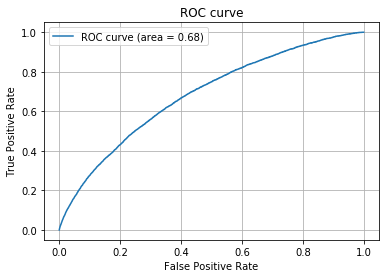

In [52]:
#ROC曲線をプロット

from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y3_test,y_pred_prob)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

[297  49 250 516 301 319 306 286 319   0   4  49   4  32   0  49  64 144
   5   7   7  40  26  13   0  58   0   4   4   0   5   1   0   5   0  14
  10   6  24   1  16   0   4   1  47  28  55  29   0  48  25  27   7   0
  14   0   3  12   0   0  22   6  48   8  22  28  12  54   9  23   0   9
   5  11  11   6  10   9  15  16  10   9  13  19  19   2   6   9   2   7
  16   4  22   0   3   3   5   3   2   1   0   3   2   0   0  12   3   1
   0   1   0  10   4  10   2   7  14   1   7  10   5   7   0  10  14   8
  12  28   6   4   2  10  10   0   0   3   6   0   2  22   5   2   0]


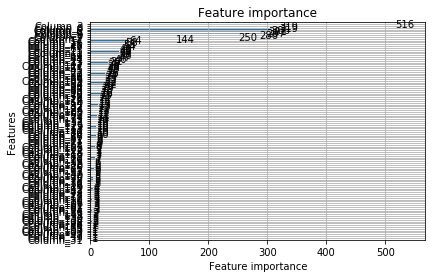

In [53]:
#特徴量の重要度出力
print(model.feature_importance())

#特徴量の重要度をプロット
lgb.plot_importance(model)

#### scikit-learn API

In [ ]:
# モデルの学習
model = lgb.LGBMClassifier() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測クラス (予測クラス(0 or 1)を返す)
y_pred = model.predict(X_test)
# テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率] を返す)
y_pred_prob = model.predict_proba(X_test)

In [ ]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y3_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y3_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y3_test,y_pred_prob[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

In [ ]:
# ROC曲線の描画
# cf : https://tips-memo.com/python-roc
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y3_test,y_pred_prob[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

#### OptunaでLightGBMのハイパーパラメータのクロスバリデーション
Optunaはハイパーパラメータ自動化ライブラリの1つ。

In [97]:
import optuna.integration.lightgbm as lgb

#LightGBM用のデータセットに変換
trainval= lgb.Dataset(X3_train, y3_train)

#ハイパーパラメータサーチとモデル構築
params = {'objective': 'binary', 
         'metric': 'auc'}

#クロスバリデーションによるハイパーパラメータの探索(3fold)
tuner = lgb.LightGBMTunerCV(params, 
                            trainval, 
                            verbose_eval=100, #100イテレーション毎に学習結果能力
                            early_stopping_rounds=100, 
                            folds=KFold(n_splits=3))

#ハイパーパラメータ探索の実行
tuner.run()

#サーチしたパラメータの表示
best_params = tuner.best_params
for key, value in best_params.items():
    print('{}: {}'.format(key, value))








  0%|                                                                             | 0/7 [00:00<?, ?it/s]






feature_fraction, val_score: -inf:   0%|                                          | 0/7 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.674804 + 0.00400111









feature_fraction, val_score: 0.675055:   0%|                                      | 0/7 [00:35<?, ?it/s]






feature_fraction, val_score: 0.675055:  14%|####2                         | 1/7 [00:35<03:30, 35.03s/it][I 2020-08-05 20:17:15,017] Trial 0 finished with value: 0.6750545125006786 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.6750545125006786.







feature_fraction, val_score: 0.675055:  14%|####2                         | 1/7 [00:35<03:30, 35.03s/it]

[100]	cv_agg's auc: 0.674411 + 0.00421909









feature_fraction, val_score: 0.675055:  14%|####2                         | 1/7 [01:17<03:30, 35.03s/it]






feature_fraction, val_score: 0.675055:  29%|########5                     | 2/7 [01:17<03:06, 37.28s/it][I 2020-08-05 20:17:57,551] Trial 1 finished with value: 0.6746340804579889 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 0.6750545125006786.







feature_fraction, val_score: 0.675055:  29%|########5                     | 2/7 [01:17<03:06, 37.28s/it]

[100]	cv_agg's auc: 0.674966 + 0.00320704
[200]	cv_agg's auc: 0.673984 + 0.00259921









feature_fraction, val_score: 0.675151:  29%|########5                     | 2/7 [02:09<03:06, 37.28s/it]






feature_fraction, val_score: 0.675151:  43%|############8                 | 3/7 [02:09<02:46, 41.60s/it][I 2020-08-05 20:18:49,214] Trial 2 finished with value: 0.6751514194766841 and parameters: {'feature_fraction': 0.7}. Best is trial 2 with value: 0.6751514194766841.







feature_fraction, val_score: 0.675151:  43%|############8                 | 3/7 [02:09<02:46, 41.60s/it]

[100]	cv_agg's auc: 0.673418 + 0.00381098









feature_fraction, val_score: 0.675151:  43%|############8                 | 3/7 [02:47<02:46, 41.60s/it]






feature_fraction, val_score: 0.675151:  57%|#################1            | 4/7 [02:47<02:01, 40.49s/it][I 2020-08-05 20:19:27,134] Trial 3 finished with value: 0.673962544185679 and parameters: {'feature_fraction': 1.0}. Best is trial 2 with value: 0.6751514194766841.







feature_fraction, val_score: 0.675151:  57%|#################1            | 4/7 [02:47<02:01, 40.49s/it]

[100]	cv_agg's auc: 0.674529 + 0.00397072









feature_fraction, val_score: 0.675151:  57%|#################1            | 4/7 [03:19<02:01, 40.49s/it]






feature_fraction, val_score: 0.675151:  71%|#####################4        | 5/7 [03:19<01:16, 38.16s/it][I 2020-08-05 20:19:59,846] Trial 4 finished with value: 0.6749923645695657 and parameters: {'feature_fraction': 0.8}. Best is trial 2 with value: 0.6751514194766841.







feature_fraction, val_score: 0.675151:  71%|#####################4        | 5/7 [03:19<01:16, 38.16s/it]

[100]	cv_agg's auc: 0.676719 + 0.00493091









feature_fraction, val_score: 0.677002:  71%|#####################4        | 5/7 [03:49<01:16, 38.16s/it]






feature_fraction, val_score: 0.677002:  86%|#########################7    | 6/7 [03:49<00:35, 35.58s/it][I 2020-08-05 20:20:29,406] Trial 5 finished with value: 0.6770019612360225 and parameters: {'feature_fraction': 0.4}. Best is trial 5 with value: 0.6770019612360225.







feature_fraction, val_score: 0.677002:  86%|#########################7    | 6/7 [03:49<00:35, 35.58s/it]

[100]	cv_agg's auc: 0.675153 + 0.00417148
[200]	cv_agg's auc: 0.673917 + 0.00370547









feature_fraction, val_score: 0.677002:  86%|#########################7    | 6/7 [04:26<00:35, 35.58s/it]






feature_fraction, val_score: 0.677002: 100%|##############################| 7/7 [04:27<00:00, 38.15s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






num_leaves, val_score: 0.677002:   0%|                                           | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.672605 + 0.00405338









num_leaves, val_score: 0.677002:   0%|                                           | 0/20 [00:30<?, ?it/s]






num_leaves, val_score: 0.677002:   5%|#7                                 | 1/20 [00:30<09:48, 30.99s/it][I 2020-08-05 20:21:38,045] Trial 7 finished with value: 0.6737064625506083 and parameters: {'num_leaves': 74}. Best is trial 7 with value: 0.6737064625506083.







num_leaves, val_score: 0.677002:   5%|#7                                 | 1/20 [00:31<09:48, 30.99s/it]

[100]	cv_agg's auc: 0.668542 + 0.00357432









num_leaves, val_score: 0.677002:   5%|#7                                 | 1/20 [01:08<09:48, 30.99s/it]






num_leaves, val_score: 0.677002:  10%|###5                               | 2/20 [01:08<09:50, 32.83s/it][I 2020-08-05 20:22:15,147] Trial 8 finished with value: 0.6708417239140753 and parameters: {'num_leaves': 134}. Best is trial 7 with value: 0.6737064625506083.







num_leaves, val_score: 0.677002:  10%|###5                               | 2/20 [01:08<09:50, 32.83s/it]

[100]	cv_agg's auc: 0.666368 + 0.00343375









num_leaves, val_score: 0.677002:  10%|###5                               | 2/20 [01:46<09:50, 32.83s/it]






num_leaves, val_score: 0.677002:  15%|#####2                             | 3/20 [01:46<09:48, 34.61s/it][I 2020-08-05 20:22:53,903] Trial 9 finished with value: 0.6696170497425666 and parameters: {'num_leaves': 181}. Best is trial 7 with value: 0.6737064625506083.







num_leaves, val_score: 0.677002:  15%|#####2                             | 3/20 [01:46<09:48, 34.61s/it]

[100]	cv_agg's auc: 0.663243 + 0.00227656









num_leaves, val_score: 0.677002:  15%|#####2                             | 3/20 [02:32<09:48, 34.61s/it]






num_leaves, val_score: 0.677002:  20%|#######                            | 4/20 [02:32<10:05, 37.82s/it][I 2020-08-05 20:23:39,245] Trial 10 finished with value: 0.666911195215189 and parameters: {'num_leaves': 246}. Best is trial 7 with value: 0.6737064625506083.







num_leaves, val_score: 0.677002:  20%|#######                            | 4/20 [02:32<10:05, 37.82s/it]

[100]	cv_agg's auc: 0.676485 + 0.00458983
[200]	cv_agg's auc: 0.677695 + 0.00454029









num_leaves, val_score: 0.677772:  20%|#######                            | 4/20 [03:10<10:05, 37.82s/it]






num_leaves, val_score: 0.677772:  25%|########7                          | 5/20 [03:10<09:31, 38.07s/it][I 2020-08-05 20:24:17,897] Trial 11 finished with value: 0.6777724662380181 and parameters: {'num_leaves': 13}. Best is trial 11 with value: 0.6777724662380181.







num_leaves, val_score: 0.677772:  25%|########7                          | 5/20 [03:10<09:31, 38.07s/it]

[100]	cv_agg's auc: 0.671914 + 0.0048617
[200]	cv_agg's auc: 0.675636 + 0.00489746
[300]	cv_agg's auc: 0.677171 + 0.00480171
[400]	cv_agg's auc: 0.678098 + 0.00469212
[500]	cv_agg's auc: 0.678597 + 0.00479545
[600]	cv_agg's auc: 0.67909 + 0.00473128
[700]	cv_agg's auc: 0.679302 + 0.00462269
[800]	cv_agg's auc: 0.679657 + 0.00464303
[900]	cv_agg's auc: 0.679805 + 0.00440247
[1000]	cv_agg's auc: 0.680095 + 0.00430198









num_leaves, val_score: 0.680141:  25%|########7                          | 5/20 [04:53<09:31, 38.07s/it]






num_leaves, val_score: 0.680141:  30%|##########5                        | 6/20 [04:53<13:23, 57.37s/it][I 2020-08-05 20:26:00,302] Trial 12 finished with value: 0.6801409887396194 and parameters: {'num_leaves': 4}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  30%|##########5                        | 6/20 [04:53<13:23, 57.37s/it]

[100]	cv_agg's auc: 0.671914 + 0.0048617
[200]	cv_agg's auc: 0.675636 + 0.00489746
[300]	cv_agg's auc: 0.677171 + 0.00480171
[400]	cv_agg's auc: 0.678098 + 0.00469212
[500]	cv_agg's auc: 0.678597 + 0.00479545
[600]	cv_agg's auc: 0.67909 + 0.00473128
[700]	cv_agg's auc: 0.679302 + 0.00462269
[800]	cv_agg's auc: 0.679657 + 0.00464303
[900]	cv_agg's auc: 0.679805 + 0.00440247
[1000]	cv_agg's auc: 0.680095 + 0.00430198









num_leaves, val_score: 0.680141:  30%|##########5                        | 6/20 [06:34<13:23, 57.37s/it]






num_leaves, val_score: 0.680141:  35%|############2                      | 7/20 [06:34<15:15, 70.40s/it][I 2020-08-05 20:27:41,082] Trial 13 finished with value: 0.6801409887396194 and parameters: {'num_leaves': 4}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  35%|############2                      | 7/20 [06:34<15:15, 70.40s/it]

[100]	cv_agg's auc: 0.675129 + 0.00472389
[200]	cv_agg's auc: 0.677386 + 0.00456211
[300]	cv_agg's auc: 0.678219 + 0.00463643
[400]	cv_agg's auc: 0.678273 + 0.00440442









num_leaves, val_score: 0.680141:  35%|############2                      | 7/20 [07:25<15:15, 70.40s/it]






num_leaves, val_score: 0.680141:  40%|##############                     | 8/20 [07:25<12:55, 64.61s/it][I 2020-08-05 20:28:32,184] Trial 14 finished with value: 0.6784413122809368 and parameters: {'num_leaves': 8}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  40%|##############                     | 8/20 [07:25<12:55, 64.61s/it]

[100]	cv_agg's auc: 0.674985 + 0.0042647









num_leaves, val_score: 0.680141:  40%|##############                     | 8/20 [07:56<12:55, 64.61s/it]






num_leaves, val_score: 0.680141:  45%|###############7                   | 9/20 [07:56<09:59, 54.49s/it][I 2020-08-05 20:29:03,081] Trial 15 finished with value: 0.6752660235873525 and parameters: {'num_leaves': 47}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  45%|###############7                   | 9/20 [07:56<09:59, 54.49s/it]

[100]	cv_agg's auc: 0.671914 + 0.0048617
[200]	cv_agg's auc: 0.675636 + 0.00489746
[300]	cv_agg's auc: 0.677171 + 0.00480171
[400]	cv_agg's auc: 0.678098 + 0.00469212
[500]	cv_agg's auc: 0.678597 + 0.00479545
[600]	cv_agg's auc: 0.67909 + 0.00473128
[700]	cv_agg's auc: 0.679302 + 0.00462269
[800]	cv_agg's auc: 0.679657 + 0.00464303
[900]	cv_agg's auc: 0.679805 + 0.00440247
[1000]	cv_agg's auc: 0.680095 + 0.00430198









num_leaves, val_score: 0.680141:  45%|###############7                   | 9/20 [09:37<09:59, 54.49s/it]






num_leaves, val_score: 0.680141:  50%|#################                 | 10/20 [09:37<11:25, 68.54s/it][I 2020-08-05 20:30:44,394] Trial 16 finished with value: 0.6801409887396194 and parameters: {'num_leaves': 4}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  50%|#################                 | 10/20 [09:37<11:25, 68.54s/it]

[100]	cv_agg's auc: 0.67251 + 0.00411453









num_leaves, val_score: 0.680141:  50%|#################                 | 10/20 [10:08<11:25, 68.54s/it]






num_leaves, val_score: 0.680141:  55%|##################7               | 11/20 [10:08<08:36, 57.44s/it][I 2020-08-05 20:31:15,918] Trial 17 finished with value: 0.6736595032093731 and parameters: {'num_leaves': 76}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  55%|##################7               | 11/20 [10:08<08:36, 57.44s/it]

[100]	cv_agg's auc: 0.674885 + 0.00406584









num_leaves, val_score: 0.680141:  55%|##################7               | 11/20 [10:40<08:36, 57.44s/it]






num_leaves, val_score: 0.680141:  60%|####################4             | 12/20 [10:40<06:38, 49.84s/it][I 2020-08-05 20:31:48,027] Trial 18 finished with value: 0.6753941958305214 and parameters: {'num_leaves': 51}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  60%|####################4             | 12/20 [10:41<06:38, 49.84s/it]

[100]	cv_agg's auc: 0.670251 + 0.00367398









num_leaves, val_score: 0.680141:  60%|####################4             | 12/20 [11:15<06:38, 49.84s/it]






num_leaves, val_score: 0.680141:  65%|######################1           | 13/20 [11:15<05:16, 45.23s/it][I 2020-08-05 20:32:22,498] Trial 19 finished with value: 0.6717385732368687 and parameters: {'num_leaves': 113}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  65%|######################1           | 13/20 [11:15<05:16, 45.23s/it]

[100]	cv_agg's auc: 0.676719 + 0.00493091









num_leaves, val_score: 0.680141:  65%|######################1           | 13/20 [11:46<05:16, 45.23s/it]






num_leaves, val_score: 0.680141:  70%|#######################7          | 14/20 [11:46<04:06, 41.03s/it][I 2020-08-05 20:32:53,727] Trial 20 finished with value: 0.6770019612360225 and parameters: {'num_leaves': 31}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  70%|#######################7          | 14/20 [11:46<04:06, 41.03s/it]

[100]	cv_agg's auc: 0.675129 + 0.00472389
[200]	cv_agg's auc: 0.677386 + 0.00456211
[300]	cv_agg's auc: 0.678219 + 0.00463643
[400]	cv_agg's auc: 0.678273 + 0.00440442









num_leaves, val_score: 0.680141:  70%|#######################7          | 14/20 [12:39<04:06, 41.03s/it]






num_leaves, val_score: 0.680141:  75%|#########################5        | 15/20 [12:39<03:43, 44.63s/it][I 2020-08-05 20:33:46,753] Trial 21 finished with value: 0.6784413122809368 and parameters: {'num_leaves': 8}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  75%|#########################5        | 15/20 [12:39<03:43, 44.63s/it]

[100]	cv_agg's auc: 0.675331 + 0.00471232
[200]	cv_agg's auc: 0.67778 + 0.00425777
[300]	cv_agg's auc: 0.678213 + 0.00410108









num_leaves, val_score: 0.680141:  75%|#########################5        | 15/20 [13:25<03:43, 44.63s/it]






num_leaves, val_score: 0.680141:  80%|###########################2      | 16/20 [13:25<02:59, 45.00s/it][I 2020-08-05 20:34:32,617] Trial 22 finished with value: 0.678347073922013 and parameters: {'num_leaves': 7}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  80%|###########################2      | 16/20 [13:25<02:59, 45.00s/it]

[100]	cv_agg's auc: 0.668823 + 0.00422507
[200]	cv_agg's auc: 0.673113 + 0.00471044
[300]	cv_agg's auc: 0.675187 + 0.00483627
[400]	cv_agg's auc: 0.676306 + 0.00464354
[500]	cv_agg's auc: 0.677134 + 0.00461303
[600]	cv_agg's auc: 0.6778 + 0.00466313
[700]	cv_agg's auc: 0.678265 + 0.00461408
[800]	cv_agg's auc: 0.678989 + 0.0043303
[900]	cv_agg's auc: 0.679598 + 0.00428141
[1000]	cv_agg's auc: 0.679848 + 0.00408695









num_leaves, val_score: 0.680141:  80%|###########################2      | 16/20 [15:08<02:59, 45.00s/it]






num_leaves, val_score: 0.680141:  85%|############################9     | 17/20 [15:08<03:07, 62.41s/it][I 2020-08-05 20:36:15,660] Trial 23 finished with value: 0.6798706087652562 and parameters: {'num_leaves': 3}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  85%|############################9     | 17/20 [15:08<03:07, 62.41s/it]

[100]	cv_agg's auc: 0.675545 + 0.00526864
[200]	cv_agg's auc: 0.674123 + 0.00432773









num_leaves, val_score: 0.680141:  85%|############################9     | 17/20 [15:44<03:07, 62.41s/it]






num_leaves, val_score: 0.680141:  90%|##############################6   | 18/20 [15:44<01:49, 54.52s/it][I 2020-08-05 20:36:51,769] Trial 24 finished with value: 0.6755974351391606 and parameters: {'num_leaves': 37}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  90%|##############################6   | 18/20 [15:44<01:49, 54.52s/it]

[100]	cv_agg's auc: 0.67251 + 0.00411453









num_leaves, val_score: 0.680141:  90%|##############################6   | 18/20 [16:19<01:49, 54.52s/it]






num_leaves, val_score: 0.680141:  95%|################################3 | 19/20 [16:19<00:48, 48.53s/it][I 2020-08-05 20:37:26,326] Trial 25 finished with value: 0.6736595032093731 and parameters: {'num_leaves': 76}. Best is trial 12 with value: 0.6801409887396194.







num_leaves, val_score: 0.680141:  95%|################################3 | 19/20 [16:19<00:48, 48.53s/it]

[100]	cv_agg's auc: 0.661039 + 0.00436864
[200]	cv_agg's auc: 0.667746 + 0.00408916
[300]	cv_agg's auc: 0.670242 + 0.00434118
[400]	cv_agg's auc: 0.671547 + 0.00456286
[500]	cv_agg's auc: 0.672486 + 0.00450124
[600]	cv_agg's auc: 0.672992 + 0.00451634
[700]	cv_agg's auc: 0.673394 + 0.00448326
[800]	cv_agg's auc: 0.673691 + 0.00443459
[900]	cv_agg's auc: 0.673944 + 0.00437245
[1000]	cv_agg's auc: 0.674228 + 0.00435772









num_leaves, val_score: 0.680141:  95%|################################3 | 19/20 [17:52<00:48, 48.53s/it]






num_leaves, val_score: 0.680141: 100%|##################################| 20/20 [17:52<00:00, 53.65s/it]







  0%|                                                                            | 0/10 [00:00<?, ?it/s]






bagging, val_score: 0.680141:   0%|                                              | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.672109 + 0.00534004
[200]	cv_agg's auc: 0.67596 + 0.00531981
[300]	cv_agg's auc: 0.6775 + 0.00509608
[400]	cv_agg's auc: 0.678022 + 0.00488598
[500]	cv_agg's auc: 0.678737 + 0.00486545
[600]	cv_agg's auc: 0.679081 + 0.00481067
[700]	cv_agg's auc: 0.679418 + 0.00463651









bagging, val_score: 0.680141:   0%|                                              | 0/10 [01:31<?, ?it/s]






bagging, val_score: 0.680141:  10%|###8                                  | 1/10 [01:31<13:41, 91.33s/it][I 2020-08-05 20:40:31,346] Trial 27 finished with value: 0.6795976861279742 and parameters: {'bagging_fraction': 0.5983681229080338, 'bagging_freq': 3}. Best is trial 27 with value: 0.6795976861279742.







bagging, val_score: 0.680141:  10%|###8                                  | 1/10 [01:31<13:41, 91.33s/it]

[100]	cv_agg's auc: 0.671818 + 0.0048648
[200]	cv_agg's auc: 0.675464 + 0.00495328
[300]	cv_agg's auc: 0.676979 + 0.00500007
[400]	cv_agg's auc: 0.678069 + 0.00472802
[500]	cv_agg's auc: 0.678487 + 0.00443815
[600]	cv_agg's auc: 0.678714 + 0.00435287
[700]	cv_agg's auc: 0.679085 + 0.00432489
[800]	cv_agg's auc: 0.679707 + 0.00427493
[900]	cv_agg's auc: 0.68005 + 0.00402156
[1000]	cv_agg's auc: 0.679991 + 0.00399767









bagging, val_score: 0.680141:  10%|###8                                  | 1/10 [03:32<13:41, 91.33s/it]






bagging, val_score: 0.680141:  20%|#######4                             | 2/10 [03:32<13:22, 100.26s/it][I 2020-08-05 20:42:32,426] Trial 28 finished with value: 0.680062076133452 and parameters: {'bagging_fraction': 0.956441682374799, 'bagging_freq': 7}. Best is trial 28 with value: 0.680062076133452.







bagging, val_score: 0.680141:  20%|#######4                             | 2/10 [03:32<13:22, 100.26s/it]

[100]	cv_agg's auc: 0.671778 + 0.005439
[200]	cv_agg's auc: 0.675571 + 0.00505313
[300]	cv_agg's auc: 0.676876 + 0.00491338
[400]	cv_agg's auc: 0.677387 + 0.00507818
[500]	cv_agg's auc: 0.67742 + 0.00499209
[600]	cv_agg's auc: 0.677492 + 0.00495343









bagging, val_score: 0.680141:  20%|#######4                             | 2/10 [04:52<13:22, 100.26s/it]






bagging, val_score: 0.680141:  30%|###########4                          | 3/10 [04:52<10:59, 94.15s/it][I 2020-08-05 20:43:52,330] Trial 29 finished with value: 0.6777142278499158 and parameters: {'bagging_fraction': 0.4160958307875264, 'bagging_freq': 1}. Best is trial 28 with value: 0.680062076133452.







bagging, val_score: 0.680141:  30%|###########4                          | 3/10 [04:52<10:59, 94.15s/it]

[100]	cv_agg's auc: 0.671484 + 0.00482742
[200]	cv_agg's auc: 0.675432 + 0.00514728
[300]	cv_agg's auc: 0.677162 + 0.00510323
[400]	cv_agg's auc: 0.67793 + 0.00506149
[500]	cv_agg's auc: 0.67866 + 0.00490944
[600]	cv_agg's auc: 0.679005 + 0.0047906
[700]	cv_agg's auc: 0.679248 + 0.00470836
[800]	cv_agg's auc: 0.679331 + 0.00458889
[900]	cv_agg's auc: 0.679508 + 0.00423607
[1000]	cv_agg's auc: 0.679884 + 0.00401341









bagging, val_score: 0.680141:  30%|###########4                          | 3/10 [06:55<10:59, 94.15s/it]






bagging, val_score: 0.680141:  40%|##############8                      | 4/10 [06:55<10:16, 102.80s/it][I 2020-08-05 20:45:55,341] Trial 30 finished with value: 0.6798839788020822 and parameters: {'bagging_fraction': 0.9769676903925214, 'bagging_freq': 7}. Best is trial 28 with value: 0.680062076133452.







bagging, val_score: 0.680141:  40%|##############8                      | 4/10 [06:55<10:16, 102.80s/it]

[100]	cv_agg's auc: 0.671655 + 0.00473316
[200]	cv_agg's auc: 0.675455 + 0.00494524
[300]	cv_agg's auc: 0.676768 + 0.0046047
[400]	cv_agg's auc: 0.677588 + 0.0044672
[500]	cv_agg's auc: 0.677976 + 0.00441892
[600]	cv_agg's auc: 0.678573 + 0.00423125
[700]	cv_agg's auc: 0.678978 + 0.00417055
[800]	cv_agg's auc: 0.679373 + 0.0042531









bagging, val_score: 0.680141:  40%|##############8                      | 4/10 [08:45<10:16, 102.80s/it]






bagging, val_score: 0.680141:  50%|##################5                  | 5/10 [08:45<08:45, 105.16s/it][I 2020-08-05 20:47:45,980] Trial 31 finished with value: 0.6793935069982742 and parameters: {'bagging_fraction': 0.9844941921610579, 'bagging_freq': 7}. Best is trial 28 with value: 0.680062076133452.







bagging, val_score: 0.680141:  50%|##################5                  | 5/10 [08:45<08:45, 105.16s/it]

[100]	cv_agg's auc: 0.671779 + 0.00478803
[200]	cv_agg's auc: 0.675776 + 0.00492872
[300]	cv_agg's auc: 0.677595 + 0.00461721
[400]	cv_agg's auc: 0.678638 + 0.0044741
[500]	cv_agg's auc: 0.679356 + 0.00442536
[600]	cv_agg's auc: 0.679446 + 0.00431322
[700]	cv_agg's auc: 0.679741 + 0.00428451
[800]	cv_agg's auc: 0.679884 + 0.0043845









bagging, val_score: 0.680141:  50%|##################5                  | 5/10 [10:26<08:45, 105.16s/it]






bagging, val_score: 0.680141:  60%|######################2              | 6/10 [10:26<06:54, 103.75s/it][I 2020-08-05 20:49:26,431] Trial 32 finished with value: 0.6799666876626725 and parameters: {'bagging_fraction': 0.7981961595838724, 'bagging_freq': 5}. Best is trial 28 with value: 0.680062076133452.







bagging, val_score: 0.680141:  60%|######################2              | 6/10 [10:26<06:54, 103.75s/it]

[100]	cv_agg's auc: 0.672302 + 0.00508609
[200]	cv_agg's auc: 0.675669 + 0.00519818
[300]	cv_agg's auc: 0.677367 + 0.00451298
[400]	cv_agg's auc: 0.678272 + 0.00424821
[500]	cv_agg's auc: 0.679077 + 0.00406657
[600]	cv_agg's auc: 0.679459 + 0.00408802
[700]	cv_agg's auc: 0.679668 + 0.00394908
[800]	cv_agg's auc: 0.679934 + 0.00417096
[900]	cv_agg's auc: 0.679765 + 0.00422664









bagging, val_score: 0.680141:  60%|######################2              | 6/10 [12:13<06:54, 103.75s/it]






bagging, val_score: 0.680141:  70%|#########################9           | 7/10 [12:13<05:14, 104.82s/it][I 2020-08-05 20:51:13,755] Trial 33 finished with value: 0.6799866154682301 and parameters: {'bagging_fraction': 0.7868514095939027, 'bagging_freq': 5}. Best is trial 28 with value: 0.680062076133452.







bagging, val_score: 0.680141:  70%|#########################9           | 7/10 [12:13<05:14, 104.82s/it]

[100]	cv_agg's auc: 0.671834 + 0.00487368
[200]	cv_agg's auc: 0.675745 + 0.00470683
[300]	cv_agg's auc: 0.677511 + 0.00471528
[400]	cv_agg's auc: 0.678328 + 0.00439449
[500]	cv_agg's auc: 0.678874 + 0.00426093
[600]	cv_agg's auc: 0.679119 + 0.0042271
[700]	cv_agg's auc: 0.679672 + 0.00419442
[800]	cv_agg's auc: 0.679886 + 0.00401957
[900]	cv_agg's auc: 0.680072 + 0.00417507
[1000]	cv_agg's auc: 0.680203 + 0.00414264









bagging, val_score: 0.680232:  70%|#########################9           | 7/10 [14:13<05:14, 104.82s/it]






bagging, val_score: 0.680232:  80%|#############################6       | 8/10 [14:13<03:38, 109.34s/it][I 2020-08-05 20:53:13,650] Trial 34 finished with value: 0.680231886254426 and parameters: {'bagging_fraction': 0.9196276595097953, 'bagging_freq': 7}. Best is trial 34 with value: 0.680231886254426.







bagging, val_score: 0.680232:  80%|#############################6       | 8/10 [14:13<03:38, 109.34s/it]

[100]	cv_agg's auc: 0.671969 + 0.00448233
[200]	cv_agg's auc: 0.675999 + 0.00460269
[300]	cv_agg's auc: 0.677356 + 0.00452578
[400]	cv_agg's auc: 0.678033 + 0.0041625
[500]	cv_agg's auc: 0.678908 + 0.004082
[600]	cv_agg's auc: 0.678855 + 0.00385836









bagging, val_score: 0.680232:  80%|#############################6       | 8/10 [15:33<03:38, 109.34s/it]






bagging, val_score: 0.680232:  90%|#################################3   | 9/10 [15:33<01:40, 100.60s/it][I 2020-08-05 20:54:33,847] Trial 35 finished with value: 0.6790049460796794 and parameters: {'bagging_fraction': 0.6239753169814806, 'bagging_freq': 3}. Best is trial 34 with value: 0.680231886254426.







bagging, val_score: 0.680232:  90%|#################################3   | 9/10 [15:33<01:40, 100.60s/it]

[100]	cv_agg's auc: 0.671835 + 0.00452542
[200]	cv_agg's auc: 0.675381 + 0.00484
[300]	cv_agg's auc: 0.677249 + 0.00452937
[400]	cv_agg's auc: 0.678202 + 0.00419992
[500]	cv_agg's auc: 0.678819 + 0.00410299
[600]	cv_agg's auc: 0.679299 + 0.00428974
[700]	cv_agg's auc: 0.679559 + 0.00412389
[800]	cv_agg's auc: 0.679873 + 0.00417015









bagging, val_score: 0.680232:  90%|#################################3   | 9/10 [17:27<01:40, 100.60s/it]






bagging, val_score: 0.680232: 100%|####################################| 10/10 [17:27<00:00, 104.76s/it]







  0%|                                                                             | 0/3 [00:00<?, ?it/s]






feature_fraction_stage2, val_score: 0.680232:   0%|                               | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.672129 + 0.00500041
[200]	cv_agg's auc: 0.675734 + 0.0048609
[300]	cv_agg's auc: 0.677346 + 0.00485299
[400]	cv_agg's auc: 0.678326 + 0.00485187
[500]	cv_agg's auc: 0.678813 + 0.00464473
[600]	cv_agg's auc: 0.679014 + 0.00476639
[700]	cv_agg's auc: 0.679401 + 0.00475203
[800]	cv_agg's auc: 0.679635 + 0.00435326
[900]	cv_agg's auc: 0.67986 + 0.00430892









feature_fraction_stage2, val_score: 0.680232:   0%|                               | 0/3 [02:07<?, ?it/s]






feature_fraction_stage2, val_score: 0.680232:  33%|#######3              | 1/3 [02:07<04:15, 127.75s/it][I 2020-08-05 20:58:35,372] Trial 37 finished with value: 0.6799181224102432 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.6799181224102432.







feature_fraction_stage2, val_score: 0.680232:  33%|#######3              | 1/3 [02:07<04:15, 127.75s/it]

[100]	cv_agg's auc: 0.67224 + 0.00469003
[200]	cv_agg's auc: 0.675741 + 0.0046759
[300]	cv_agg's auc: 0.677277 + 0.00477466
[400]	cv_agg's auc: 0.678194 + 0.00451605
[500]	cv_agg's auc: 0.678714 + 0.00423271
[600]	cv_agg's auc: 0.678947 + 0.00407962
[700]	cv_agg's auc: 0.679542 + 0.00399556
[800]	cv_agg's auc: 0.67981 + 0.00377901
[900]	cv_agg's auc: 0.679963 + 0.00403282
[1000]	cv_agg's auc: 0.680015 + 0.0038007









feature_fraction_stage2, val_score: 0.680232:  33%|#######3              | 1/3 [04:18<04:15, 127.75s/it]






feature_fraction_stage2, val_score: 0.680232:  67%|##############6       | 2/3 [04:18<02:08, 128.58s/it][I 2020-08-05 21:00:45,891] Trial 38 finished with value: 0.6800568247356642 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 38 with value: 0.6800568247356642.







feature_fraction_stage2, val_score: 0.680232:  67%|##############6       | 2/3 [04:18<02:08, 128.58s/it]

[100]	cv_agg's auc: 0.672173 + 0.00472687
[200]	cv_agg's auc: 0.676213 + 0.00455479
[300]	cv_agg's auc: 0.677738 + 0.00435436
[400]	cv_agg's auc: 0.678497 + 0.00426483
[500]	cv_agg's auc: 0.678963 + 0.004042
[600]	cv_agg's auc: 0.679189 + 0.00412888
[700]	cv_agg's auc: 0.679383 + 0.00398689
[800]	cv_agg's auc: 0.679866 + 0.00369664
[900]	cv_agg's auc: 0.680185 + 0.00376191
[1000]	cv_agg's auc: 0.680192 + 0.00368429









feature_fraction_stage2, val_score: 0.680242:  67%|##############6       | 2/3 [06:32<02:08, 128.58s/it]






feature_fraction_stage2, val_score: 0.680242: 100%|######################| 3/3 [06:32<00:00, 130.80s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






regularization_factors, val_score: 0.680242:   0%|                               | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.672173 + 0.00472687
[200]	cv_agg's auc: 0.676215 + 0.00455667
[300]	cv_agg's auc: 0.677741 + 0.00435681
[400]	cv_agg's auc: 0.678498 + 0.00426517
[500]	cv_agg's auc: 0.678965 + 0.00404436
[600]	cv_agg's auc: 0.679183 + 0.00412385
[700]	cv_agg's auc: 0.679455 + 0.00406184
[800]	cv_agg's auc: 0.679809 + 0.00363588
[900]	cv_agg's auc: 0.680085 + 0.00367833
[1000]	cv_agg's auc: 0.680062 + 0.00356031









regularization_factors, val_score: 0.680242:   0%|                               | 0/20 [02:09<?, ?it/s]






regularization_factors, val_score: 0.680242:   5%|#1                    | 1/20 [02:09<41:01, 129.54s/it][I 2020-08-05 21:05:09,584] Trial 40 finished with value: 0.6801462967730628 and parameters: {'lambda_l1': 1.0253878315950273e-06, 'lambda_l2': 0.00018977163180610785}. Best is trial 40 with value: 0.6801462967730628.







regularization_factors, val_score: 0.680242:   5%|#1                    | 1/20 [02:09<41:01, 129.54s/it]

[100]	cv_agg's auc: 0.672173 + 0.00472686
[200]	cv_agg's auc: 0.676215 + 0.00455673
[300]	cv_agg's auc: 0.677741 + 0.00435685
[400]	cv_agg's auc: 0.678498 + 0.00426513
[500]	cv_agg's auc: 0.678966 + 0.00404439
[600]	cv_agg's auc: 0.679213 + 0.0040838
[700]	cv_agg's auc: 0.679419 + 0.00411062
[800]	cv_agg's auc: 0.679729 + 0.00374378
[900]	cv_agg's auc: 0.67993 + 0.00388704
[1000]	cv_agg's auc: 0.680029 + 0.00360452









regularization_factors, val_score: 0.680242:   5%|#1                    | 1/20 [04:20<41:01, 129.54s/it]






regularization_factors, val_score: 0.680242:  10%|##2                   | 2/20 [04:20<38:57, 129.86s/it][I 2020-08-05 21:07:20,182] Trial 41 finished with value: 0.680071800978017 and parameters: {'lambda_l1': 2.802441067329632e-07, 'lambda_l2': 0.0005555468228684038}. Best is trial 40 with value: 0.6801462967730628.







regularization_factors, val_score: 0.680242:  10%|##2                   | 2/20 [04:20<38:57, 129.86s/it]

[100]	cv_agg's auc: 0.67219 + 0.00474056
[200]	cv_agg's auc: 0.675965 + 0.00445262
[300]	cv_agg's auc: 0.677558 + 0.00450175
[400]	cv_agg's auc: 0.678411 + 0.00397476
[500]	cv_agg's auc: 0.679028 + 0.00377888
[600]	cv_agg's auc: 0.679432 + 0.00372769
[700]	cv_agg's auc: 0.679783 + 0.00380635
[800]	cv_agg's auc: 0.680122 + 0.00344264
[900]	cv_agg's auc: 0.680409 + 0.00370499
[1000]	cv_agg's auc: 0.680289 + 0.00353505









regularization_factors, val_score: 0.680421:  10%|##2                   | 2/20 [06:34<38:57, 129.86s/it]






regularization_factors, val_score: 0.680421:  15%|###3                  | 3/20 [06:34<37:08, 131.10s/it][I 2020-08-05 21:09:34,174] Trial 42 finished with value: 0.6804207846719358 and parameters: {'lambda_l1': 0.027926318331265625, 'lambda_l2': 2.2111306702085983e-08}. Best is trial 42 with value: 0.6804207846719358.







regularization_factors, val_score: 0.680421:  15%|###3                  | 3/20 [06:34<37:08, 131.10s/it]

[100]	cv_agg's auc: 0.672133 + 0.00463635
[200]	cv_agg's auc: 0.675672 + 0.00450315
[300]	cv_agg's auc: 0.677431 + 0.0047206
[400]	cv_agg's auc: 0.67824 + 0.00439849
[500]	cv_agg's auc: 0.678768 + 0.00437794
[600]	cv_agg's auc: 0.679089 + 0.00423238
[700]	cv_agg's auc: 0.67955 + 0.00425647
[800]	cv_agg's auc: 0.679986 + 0.00392384
[900]	cv_agg's auc: 0.680287 + 0.00384656
[1000]	cv_agg's auc: 0.680265 + 0.00366735









regularization_factors, val_score: 0.680421:  15%|###3                  | 3/20 [08:48<37:08, 131.10s/it]






regularization_factors, val_score: 0.680421:  20%|####4                 | 4/20 [08:48<35:13, 132.07s/it][I 2020-08-05 21:11:48,498] Trial 43 finished with value: 0.6803431907260791 and parameters: {'lambda_l1': 0.35471150779039057, 'lambda_l2': 3.1744120176973434e-08}. Best is trial 42 with value: 0.6804207846719358.







regularization_factors, val_score: 0.680421:  20%|####4                 | 4/20 [08:48<35:13, 132.07s/it]

[100]	cv_agg's auc: 0.672176 + 0.00451177
[200]	cv_agg's auc: 0.675968 + 0.00449877
[300]	cv_agg's auc: 0.677627 + 0.00447777
[400]	cv_agg's auc: 0.678284 + 0.00417425
[500]	cv_agg's auc: 0.678688 + 0.00423005
[600]	cv_agg's auc: 0.679245 + 0.00409291
[700]	cv_agg's auc: 0.679599 + 0.00401633
[800]	cv_agg's auc: 0.680083 + 0.00366802
[900]	cv_agg's auc: 0.680232 + 0.0036469
[1000]	cv_agg's auc: 0.680405 + 0.00342384









regularization_factors, val_score: 0.680493:  20%|####4                 | 4/20 [10:59<35:13, 132.07s/it]






regularization_factors, val_score: 0.680493:  25%|#####5                | 5/20 [10:59<32:58, 131.88s/it][I 2020-08-05 21:13:59,929] Trial 44 finished with value: 0.6804931252734586 and parameters: {'lambda_l1': 0.7735105149929407, 'lambda_l2': 1.0240901016686662e-08}. Best is trial 44 with value: 0.6804931252734586.







regularization_factors, val_score: 0.680493:  25%|#####5                | 5/20 [10:59<32:58, 131.88s/it]

[100]	cv_agg's auc: 0.671938 + 0.00452553
[200]	cv_agg's auc: 0.676118 + 0.0043945
[300]	cv_agg's auc: 0.678076 + 0.00478375
[400]	cv_agg's auc: 0.678932 + 0.00458786
[500]	cv_agg's auc: 0.679492 + 0.00417734
[600]	cv_agg's auc: 0.680305 + 0.00417799
[700]	cv_agg's auc: 0.680596 + 0.00400861
[800]	cv_agg's auc: 0.681007 + 0.00363713
[900]	cv_agg's auc: 0.681357 + 0.00365401
[1000]	cv_agg's auc: 0.681327 + 0.00352943









regularization_factors, val_score: 0.681406:  25%|#####5                | 5/20 [13:13<32:58, 131.88s/it]






regularization_factors, val_score: 0.681406:  30%|######6               | 6/20 [13:13<30:52, 132.35s/it][I 2020-08-05 21:16:13,377] Trial 45 finished with value: 0.6814055615291656 and parameters: {'lambda_l1': 1.8095115479928485, 'lambda_l2': 1.013868211652513e-08}. Best is trial 45 with value: 0.6814055615291656.







regularization_factors, val_score: 0.681406:  30%|######6               | 6/20 [13:13<30:52, 132.35s/it]

[100]	cv_agg's auc: 0.672067 + 0.00434903
[200]	cv_agg's auc: 0.676212 + 0.00472431
[300]	cv_agg's auc: 0.678031 + 0.00481895
[400]	cv_agg's auc: 0.679074 + 0.00457484
[500]	cv_agg's auc: 0.679678 + 0.00431856
[600]	cv_agg's auc: 0.68023 + 0.00432974
[700]	cv_agg's auc: 0.680785 + 0.00415811
[800]	cv_agg's auc: 0.68114 + 0.00389187
[900]	cv_agg's auc: 0.681399 + 0.00384933
[1000]	cv_agg's auc: 0.68137 + 0.00369067









regularization_factors, val_score: 0.681447:  30%|######6               | 6/20 [15:25<30:52, 132.35s/it]






regularization_factors, val_score: 0.681447:  35%|#######7              | 7/20 [15:25<28:41, 132.41s/it][I 2020-08-05 21:18:25,950] Trial 46 finished with value: 0.6814469957652128 and parameters: {'lambda_l1': 2.0829167692643837, 'lambda_l2': 1.0080420812508074e-08}. Best is trial 46 with value: 0.6814469957652128.







regularization_factors, val_score: 0.681447:  35%|#######7              | 7/20 [15:25<28:41, 132.41s/it]

[100]	cv_agg's auc: 0.672114 + 0.00425244
[200]	cv_agg's auc: 0.676081 + 0.00467018
[300]	cv_agg's auc: 0.678033 + 0.00459231
[400]	cv_agg's auc: 0.679129 + 0.00458113
[500]	cv_agg's auc: 0.679744 + 0.00433808
[600]	cv_agg's auc: 0.680412 + 0.004341
[700]	cv_agg's auc: 0.68081 + 0.00422094
[800]	cv_agg's auc: 0.681205 + 0.00415728
[900]	cv_agg's auc: 0.681439 + 0.0041663
[1000]	cv_agg's auc: 0.681409 + 0.00395124









regularization_factors, val_score: 0.681531:  35%|#######7              | 7/20 [17:40<28:41, 132.41s/it]






regularization_factors, val_score: 0.681531:  40%|########8             | 8/20 [17:40<26:35, 132.96s/it][I 2020-08-05 21:20:40,190] Trial 47 finished with value: 0.6815309828249685 and parameters: {'lambda_l1': 2.311811532416349, 'lambda_l2': 1.0315370961780003e-08}. Best is trial 47 with value: 0.6815309828249685.







regularization_factors, val_score: 0.681531:  40%|########8             | 8/20 [17:40<26:35, 132.96s/it]

[100]	cv_agg's auc: 0.672184 + 0.00429286
[200]	cv_agg's auc: 0.675965 + 0.00460628
[300]	cv_agg's auc: 0.677847 + 0.00449486
[400]	cv_agg's auc: 0.678802 + 0.0043792
[500]	cv_agg's auc: 0.679561 + 0.00426515
[600]	cv_agg's auc: 0.680209 + 0.00409838
[700]	cv_agg's auc: 0.680576 + 0.00404526
[800]	cv_agg's auc: 0.680928 + 0.00393163
[900]	cv_agg's auc: 0.68125 + 0.00392912
[1000]	cv_agg's auc: 0.681389 + 0.00350914









regularization_factors, val_score: 0.681531:  40%|########8             | 8/20 [19:53<26:35, 132.96s/it]






regularization_factors, val_score: 0.681531:  45%|#########9            | 9/20 [19:53<24:22, 132.95s/it][I 2020-08-05 21:22:53,105] Trial 48 finished with value: 0.6814599871215865 and parameters: {'lambda_l1': 2.304016089947778, 'lambda_l2': 1.4776179395432137e-08}. Best is trial 47 with value: 0.6815309828249685.







regularization_factors, val_score: 0.681531:  45%|#########9            | 9/20 [19:53<24:22, 132.95s/it]

[100]	cv_agg's auc: 0.67177 + 0.00445846
[200]	cv_agg's auc: 0.675656 + 0.00447638
[300]	cv_agg's auc: 0.677866 + 0.00461418
[400]	cv_agg's auc: 0.678826 + 0.00481419
[500]	cv_agg's auc: 0.679691 + 0.00473659
[600]	cv_agg's auc: 0.680468 + 0.00472704
[700]	cv_agg's auc: 0.680921 + 0.00451019
[800]	cv_agg's auc: 0.681354 + 0.00437474
[900]	cv_agg's auc: 0.681576 + 0.00433218
[1000]	cv_agg's auc: 0.681703 + 0.00414472









regularization_factors, val_score: 0.681775:  45%|#########9            | 9/20 [22:28<24:22, 132.95s/it]






regularization_factors, val_score: 0.681775:  50%|##########5          | 10/20 [22:28<23:16, 139.69s/it][I 2020-08-05 21:25:28,511] Trial 49 finished with value: 0.6817748053642756 and parameters: {'lambda_l1': 9.32315336531049, 'lambda_l2': 1.0125890587484849e-08}. Best is trial 49 with value: 0.6817748053642756.







regularization_factors, val_score: 0.681775:  50%|##########5          | 10/20 [22:28<23:16, 139.69s/it]

[100]	cv_agg's auc: 0.672059 + 0.00453589
[200]	cv_agg's auc: 0.676011 + 0.0047732
[300]	cv_agg's auc: 0.678034 + 0.00492186
[400]	cv_agg's auc: 0.679157 + 0.00497821
[500]	cv_agg's auc: 0.67998 + 0.0048641
[600]	cv_agg's auc: 0.680809 + 0.00485532
[700]	cv_agg's auc: 0.681354 + 0.00474814
[800]	cv_agg's auc: 0.681793 + 0.00459959
[900]	cv_agg's auc: 0.682021 + 0.00451161
[1000]	cv_agg's auc: 0.682159 + 0.00429433









regularization_factors, val_score: 0.682251:  50%|##########5          | 10/20 [25:01<23:16, 139.69s/it]






regularization_factors, val_score: 0.682251:  55%|###########5         | 11/20 [25:01<21:31, 143.55s/it][I 2020-08-05 21:28:01,075] Trial 50 finished with value: 0.6822509518887464 and parameters: {'lambda_l1': 8.263408501487028, 'lambda_l2': 1.301803686963002e-08}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  55%|###########5         | 11/20 [25:01<21:31, 143.55s/it]

[100]	cv_agg's auc: 0.672094 + 0.00455708
[200]	cv_agg's auc: 0.676091 + 0.00477363
[300]	cv_agg's auc: 0.678047 + 0.00488801
[400]	cv_agg's auc: 0.679137 + 0.00494904
[500]	cv_agg's auc: 0.68008 + 0.00475096
[600]	cv_agg's auc: 0.680878 + 0.00467887
[700]	cv_agg's auc: 0.681264 + 0.00452191
[800]	cv_agg's auc: 0.681581 + 0.00443172
[900]	cv_agg's auc: 0.681887 + 0.00441179
[1000]	cv_agg's auc: 0.681945 + 0.00407966









regularization_factors, val_score: 0.682251:  55%|###########5         | 11/20 [27:16<21:31, 143.55s/it]






regularization_factors, val_score: 0.682251:  60%|############6        | 12/20 [27:16<18:49, 141.19s/it][I 2020-08-05 21:30:16,765] Trial 51 finished with value: 0.6819947976551904 and parameters: {'lambda_l1': 8.31109887998136, 'lambda_l2': 1.3677579525258337e-08}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  60%|############6        | 12/20 [27:16<18:49, 141.19s/it]

[100]	cv_agg's auc: 0.671878 + 0.00454395
[200]	cv_agg's auc: 0.675959 + 0.00471546
[300]	cv_agg's auc: 0.678004 + 0.00486139
[400]	cv_agg's auc: 0.679029 + 0.00490715
[500]	cv_agg's auc: 0.67982 + 0.00481551
[600]	cv_agg's auc: 0.68058 + 0.00475186
[700]	cv_agg's auc: 0.681061 + 0.00471127
[800]	cv_agg's auc: 0.681462 + 0.00458559
[900]	cv_agg's auc: 0.681714 + 0.0044955
[1000]	cv_agg's auc: 0.681804 + 0.00436395









regularization_factors, val_score: 0.682251:  60%|############6        | 12/20 [29:33<18:49, 141.19s/it]






regularization_factors, val_score: 0.682251:  65%|#############6       | 13/20 [29:33<16:19, 139.98s/it][I 2020-08-05 21:32:33,927] Trial 52 finished with value: 0.6818805961606871 and parameters: {'lambda_l1': 8.76781532449035, 'lambda_l2': 1.0305414358804645e-08}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  65%|#############6       | 13/20 [29:33<16:19, 139.98s/it]

[100]	cv_agg's auc: 0.671795 + 0.0041935
[200]	cv_agg's auc: 0.675731 + 0.00447767
[300]	cv_agg's auc: 0.677823 + 0.00467658
[400]	cv_agg's auc: 0.678952 + 0.00460883
[500]	cv_agg's auc: 0.679934 + 0.00453135
[600]	cv_agg's auc: 0.680659 + 0.00447268
[700]	cv_agg's auc: 0.681147 + 0.00442604
[800]	cv_agg's auc: 0.681392 + 0.00439912
[900]	cv_agg's auc: 0.681597 + 0.00445582
[1000]	cv_agg's auc: 0.681599 + 0.00417744









regularization_factors, val_score: 0.682251:  65%|#############6       | 13/20 [31:50<16:19, 139.98s/it]






regularization_factors, val_score: 0.682251:  70%|##############7      | 14/20 [31:50<13:54, 139.10s/it][I 2020-08-05 21:34:50,974] Trial 53 finished with value: 0.681679217558209 and parameters: {'lambda_l1': 9.39063184140238, 'lambda_l2': 2.8154252799017175e-07}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  70%|##############7      | 14/20 [31:50<13:54, 139.10s/it]

[100]	cv_agg's auc: 0.672093 + 0.0045568
[200]	cv_agg's auc: 0.676223 + 0.00462818
[300]	cv_agg's auc: 0.678202 + 0.00475665
[400]	cv_agg's auc: 0.679384 + 0.00480141
[500]	cv_agg's auc: 0.680085 + 0.00473869
[600]	cv_agg's auc: 0.680816 + 0.00469984
[700]	cv_agg's auc: 0.681227 + 0.00467869
[800]	cv_agg's auc: 0.68151 + 0.00458324
[900]	cv_agg's auc: 0.681818 + 0.00453737
[1000]	cv_agg's auc: 0.681777 + 0.00438076









regularization_factors, val_score: 0.682251:  70%|##############7      | 14/20 [34:05<13:54, 139.10s/it]






regularization_factors, val_score: 0.682251:  75%|###############7     | 15/20 [34:05<11:28, 137.68s/it][I 2020-08-05 21:37:05,352] Trial 54 finished with value: 0.6818536450580316 and parameters: {'lambda_l1': 8.353281613552161, 'lambda_l2': 1.5944772532025983e-06}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  75%|###############7     | 15/20 [34:05<11:28, 137.68s/it]

[100]	cv_agg's auc: 0.671834 + 0.00434233
[200]	cv_agg's auc: 0.675828 + 0.00465261
[300]	cv_agg's auc: 0.677798 + 0.00468366
[400]	cv_agg's auc: 0.679054 + 0.00461115
[500]	cv_agg's auc: 0.679821 + 0.00454703
[600]	cv_agg's auc: 0.680537 + 0.00449235
[700]	cv_agg's auc: 0.681087 + 0.00446961
[800]	cv_agg's auc: 0.681503 + 0.00430397
[900]	cv_agg's auc: 0.681721 + 0.00424532
[1000]	cv_agg's auc: 0.681709 + 0.00400206









regularization_factors, val_score: 0.682251:  75%|###############7     | 15/20 [36:15<11:28, 137.68s/it]






regularization_factors, val_score: 0.682251:  80%|################8    | 16/20 [36:15<09:01, 135.46s/it][I 2020-08-05 21:39:15,606] Trial 55 finished with value: 0.6818318435004754 and parameters: {'lambda_l1': 8.96769923350299, 'lambda_l2': 1.9623800607692877e-06}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  80%|################8    | 16/20 [36:15<09:01, 135.46s/it]

[100]	cv_agg's auc: 0.671874 + 0.0042628
[200]	cv_agg's auc: 0.675957 + 0.00455006
[300]	cv_agg's auc: 0.677954 + 0.00473187
[400]	cv_agg's auc: 0.679097 + 0.00475637
[500]	cv_agg's auc: 0.679906 + 0.00459667
[600]	cv_agg's auc: 0.680615 + 0.00447474
[700]	cv_agg's auc: 0.681276 + 0.00434403
[800]	cv_agg's auc: 0.681498 + 0.00410124
[900]	cv_agg's auc: 0.681739 + 0.00407942
[1000]	cv_agg's auc: 0.681677 + 0.00387018









regularization_factors, val_score: 0.682251:  80%|################8    | 16/20 [38:25<09:01, 135.46s/it]






regularization_factors, val_score: 0.682251:  85%|#################8   | 17/20 [38:25<06:41, 133.80s/it][I 2020-08-05 21:41:25,536] Trial 56 finished with value: 0.6817425299271079 and parameters: {'lambda_l1': 9.943427880685537, 'lambda_l2': 2.0965890736897644e-06}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  85%|#################8   | 17/20 [38:25<06:41, 133.80s/it]

[100]	cv_agg's auc: 0.671955 + 0.00447584
[200]	cv_agg's auc: 0.675915 + 0.00478713
[300]	cv_agg's auc: 0.677852 + 0.00489996
[400]	cv_agg's auc: 0.678943 + 0.00503487
[500]	cv_agg's auc: 0.679779 + 0.00503059
[600]	cv_agg's auc: 0.680409 + 0.00474886
[700]	cv_agg's auc: 0.680992 + 0.00449147
[800]	cv_agg's auc: 0.681259 + 0.0043082
[900]	cv_agg's auc: 0.681571 + 0.00432912
[1000]	cv_agg's auc: 0.68155 + 0.00407924









regularization_factors, val_score: 0.682251:  85%|#################8   | 17/20 [40:33<06:41, 133.80s/it]






regularization_factors, val_score: 0.682251:  90%|##################9  | 18/20 [40:33<04:24, 132.18s/it][I 2020-08-05 21:43:33,944] Trial 57 finished with value: 0.681625075017497 and parameters: {'lambda_l1': 9.2509187897305, 'lambda_l2': 3.904179832754001e-06}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  90%|##################9  | 18/20 [40:33<04:24, 132.18s/it]

[100]	cv_agg's auc: 0.672084 + 0.00440133
[200]	cv_agg's auc: 0.67602 + 0.0046401
[300]	cv_agg's auc: 0.67797 + 0.00481526
[400]	cv_agg's auc: 0.679249 + 0.00496852
[500]	cv_agg's auc: 0.679933 + 0.00480401
[600]	cv_agg's auc: 0.680708 + 0.0046199
[700]	cv_agg's auc: 0.681242 + 0.00453166
[800]	cv_agg's auc: 0.681539 + 0.00435746
[900]	cv_agg's auc: 0.681824 + 0.00437746
[1000]	cv_agg's auc: 0.681926 + 0.00412712









regularization_factors, val_score: 0.682251:  90%|##################9  | 18/20 [42:48<04:24, 132.18s/it]






regularization_factors, val_score: 0.682251:  95%|###################9 | 19/20 [42:48<02:12, 132.77s/it][I 2020-08-05 21:45:48,091] Trial 58 finished with value: 0.681995507609425 and parameters: {'lambda_l1': 8.521225909574587, 'lambda_l2': 0.6694777884342471}. Best is trial 50 with value: 0.6822509518887464.







regularization_factors, val_score: 0.682251:  95%|###################9 | 19/20 [42:48<02:12, 132.77s/it]

[100]	cv_agg's auc: 0.67196 + 0.00456732
[200]	cv_agg's auc: 0.67573 + 0.00469222
[300]	cv_agg's auc: 0.677443 + 0.00469761
[400]	cv_agg's auc: 0.678354 + 0.00448182
[500]	cv_agg's auc: 0.678775 + 0.00437681
[600]	cv_agg's auc: 0.67913 + 0.0044765
[700]	cv_agg's auc: 0.679538 + 0.00424169
[800]	cv_agg's auc: 0.679972 + 0.00385036
[900]	cv_agg's auc: 0.680221 + 0.00386805









regularization_factors, val_score: 0.682251:  95%|###################9 | 19/20 [44:56<02:12, 132.77s/it]






regularization_factors, val_score: 0.682251: 100%|#####################| 20/20 [44:56<00:00, 134.81s/it]







  0%|                                                                             | 0/5 [00:00<?, ?it/s]






min_data_in_leaf, val_score: 0.682251:   0%|                                      | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.672059 + 0.00453589
[200]	cv_agg's auc: 0.676011 + 0.0047732
[300]	cv_agg's auc: 0.67801 + 0.00490147
[400]	cv_agg's auc: 0.67905 + 0.00489177
[500]	cv_agg's auc: 0.679986 + 0.00479039
[600]	cv_agg's auc: 0.680857 + 0.00479691
[700]	cv_agg's auc: 0.681289 + 0.00446892
[800]	cv_agg's auc: 0.681616 + 0.00435176
[900]	cv_agg's auc: 0.68186 + 0.00446619
[1000]	cv_agg's auc: 0.681945 + 0.00429388









min_data_in_leaf, val_score: 0.682251:   0%|                                      | 0/5 [02:23<?, ?it/s]






min_data_in_leaf, val_score: 0.682251:  20%|#####8                       | 1/5 [02:23<09:32, 143.21s/it][I 2020-08-05 21:50:19,458] Trial 60 finished with value: 0.682015402178043 and parameters: {'min_child_samples': 5}. Best is trial 60 with value: 0.682015402178043.







min_data_in_leaf, val_score: 0.682251:  20%|#####8                       | 1/5 [02:23<09:32, 143.21s/it]

[100]	cv_agg's auc: 0.672059 + 0.00453589
[200]	cv_agg's auc: 0.676011 + 0.0047732
[300]	cv_agg's auc: 0.677975 + 0.00487184
[400]	cv_agg's auc: 0.679239 + 0.00493551
[500]	cv_agg's auc: 0.680049 + 0.00483107
[600]	cv_agg's auc: 0.680737 + 0.00476006
[700]	cv_agg's auc: 0.68117 + 0.00473166
[800]	cv_agg's auc: 0.681515 + 0.00462796
[900]	cv_agg's auc: 0.681727 + 0.00457817
[1000]	cv_agg's auc: 0.681747 + 0.00428505









min_data_in_leaf, val_score: 0.682251:  20%|#####8                       | 1/5 [04:38<09:32, 143.21s/it]






min_data_in_leaf, val_score: 0.682251:  40%|###########6                 | 2/5 [04:38<07:02, 140.69s/it][I 2020-08-05 21:52:34,270] Trial 61 finished with value: 0.6818464271014423 and parameters: {'min_child_samples': 50}. Best is trial 60 with value: 0.682015402178043.







min_data_in_leaf, val_score: 0.682251:  40%|###########6                 | 2/5 [04:38<07:02, 140.69s/it]

[100]	cv_agg's auc: 0.672059 + 0.00453589
[200]	cv_agg's auc: 0.676011 + 0.0047732
[300]	cv_agg's auc: 0.67801 + 0.00490147
[400]	cv_agg's auc: 0.67905 + 0.00489177
[500]	cv_agg's auc: 0.679986 + 0.00479076
[600]	cv_agg's auc: 0.680813 + 0.0047871
[700]	cv_agg's auc: 0.68138 + 0.00454505
[800]	cv_agg's auc: 0.681757 + 0.00445548
[900]	cv_agg's auc: 0.681985 + 0.00458479
[1000]	cv_agg's auc: 0.681993 + 0.00437355









min_data_in_leaf, val_score: 0.682251:  40%|###########6                 | 2/5 [06:50<07:02, 140.69s/it]






min_data_in_leaf, val_score: 0.682251:  60%|#################4           | 3/5 [06:50<04:36, 138.20s/it][I 2020-08-05 21:54:46,654] Trial 62 finished with value: 0.682075779720421 and parameters: {'min_child_samples': 10}. Best is trial 62 with value: 0.682075779720421.







min_data_in_leaf, val_score: 0.682251:  60%|#################4           | 3/5 [06:50<04:36, 138.20s/it]

[100]	cv_agg's auc: 0.672059 + 0.00453589
[200]	cv_agg's auc: 0.676011 + 0.0047732
[300]	cv_agg's auc: 0.678053 + 0.00482113
[400]	cv_agg's auc: 0.679302 + 0.0049048
[500]	cv_agg's auc: 0.680107 + 0.00481215
[600]	cv_agg's auc: 0.680792 + 0.00473434
[700]	cv_agg's auc: 0.681124 + 0.00459043
[800]	cv_agg's auc: 0.681397 + 0.00447888
[900]	cv_agg's auc: 0.681651 + 0.00455842
[1000]	cv_agg's auc: 0.681752 + 0.00436968









min_data_in_leaf, val_score: 0.682251:  60%|#################4           | 3/5 [08:53<04:36, 138.20s/it]






min_data_in_leaf, val_score: 0.682251:  80%|#######################2     | 4/5 [08:53<02:13, 133.71s/it][I 2020-08-05 21:56:49,899] Trial 63 finished with value: 0.6817843678523828 and parameters: {'min_child_samples': 100}. Best is trial 62 with value: 0.682075779720421.







min_data_in_leaf, val_score: 0.682251:  80%|#######################2     | 4/5 [08:53<02:13, 133.71s/it]

[100]	cv_agg's auc: 0.672059 + 0.00453589
[200]	cv_agg's auc: 0.676011 + 0.0047732
[300]	cv_agg's auc: 0.678034 + 0.00492186
[400]	cv_agg's auc: 0.679148 + 0.00497403
[500]	cv_agg's auc: 0.679953 + 0.00484205
[600]	cv_agg's auc: 0.680842 + 0.00486892
[700]	cv_agg's auc: 0.681108 + 0.00460033
[800]	cv_agg's auc: 0.681597 + 0.00449604
[900]	cv_agg's auc: 0.681768 + 0.00438519
[1000]	cv_agg's auc: 0.681904 + 0.00400941









min_data_in_leaf, val_score: 0.682251:  80%|#######################2     | 4/5 [11:00<02:13, 133.71s/it]






min_data_in_leaf, val_score: 0.682251: 100%|#############################| 5/5 [11:00<00:00, 132.01s/it]


objective: binary
metric: auc
lambda_l1: 8.263408501487028
lambda_l2: 1.301803686963002e-08
num_leaves: 4
feature_fraction: 0.48000000000000004
bagging_fraction: 0.9196276595097953
bagging_freq: 7
min_child_samples: 20


In [99]:
lgb_train = lgb.Dataset(X3_train, y3_train)
lgb_eval = lgb.Dataset(X3_test, y3_test)

params = {'objective': 'binary', 
          'metric': 'auc', 
          'lambda_l1': 8.263408501487028, 
          'lambda_l2': 1.301803686963002e-08,
          'num_leaves': 4,
          'feature_fraction': 0.48000000000000004,
          'bagging_fraction': 0.9196276595097953,
          'bagging_freq': 7,
          'min_child_samples': 20}

model = lgb.train(params, 
                  lgb_train, 
                  valid_sets=lgb_eval,
                 verbose_eval=50) #50イテレーション毎に学習結果能力

# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = model.predict(X3_test)
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1) # 0.5より小さい場合0 ,そうでない場合1を返す








  0%|                                                                             | 0/7 [00:00<?, ?it/s]






feature_fraction, val_score: -inf:   0%|                                          | 0/7 [00:00<?, ?it/s]

[50]	valid_0's auc: 0.668609
[100]	valid_0's auc: 0.672864
[150]	valid_0's auc: 0.675896
[200]	valid_0's auc: 0.677485
[250]	valid_0's auc: 0.678937
[300]	valid_0's auc: 0.679666
[350]	valid_0's auc: 0.680179
[400]	valid_0's auc: 0.680872
[450]	valid_0's auc: 0.681547
[500]	valid_0's auc: 0.682252
[550]	valid_0's auc: 0.68245
[600]	valid_0's auc: 0.682896
[650]	valid_0's auc: 0.683038
[700]	valid_0's auc: 0.683295
[750]	valid_0's auc: 0.683485
[800]	valid_0's auc: 0.683736
[850]	valid_0's auc: 0.683937
[900]	valid_0's auc: 0.684123
[950]	valid_0's auc: 0.684412
[1000]	valid_0's auc: 0.684457









feature_fraction, val_score: 0.684457:   0%|                                      | 0/7 [01:08<?, ?it/s]






feature_fraction, val_score: 0.684457:  14%|####2                         | 1/7 [01:08<06:52, 68.81s/it][I 2020-08-05 22:34:39,161] Trial 0 finished with value: 0.6844571292426188 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.6844571292426188.







feature_fraction, val_score: 0.684457:  14%|####2                         | 1/7 [01:08<06:52, 68.81s/it]

[50]	valid_0's auc: 0.667714
[100]	valid_0's auc: 0.672606
[150]	valid_0's auc: 0.675567
[200]	valid_0's auc: 0.677434
[250]	valid_0's auc: 0.678634
[300]	valid_0's auc: 0.679232
[350]	valid_0's auc: 0.679718
[400]	valid_0's auc: 0.680277
[450]	valid_0's auc: 0.680704
[500]	valid_0's auc: 0.681549
[550]	valid_0's auc: 0.681873
[600]	valid_0's auc: 0.682374
[650]	valid_0's auc: 0.682703
[700]	valid_0's auc: 0.68319
[750]	valid_0's auc: 0.683403
[800]	valid_0's auc: 0.683612
[850]	valid_0's auc: 0.683901
[900]	valid_0's auc: 0.684083
[950]	valid_0's auc: 0.684255
[1000]	valid_0's auc: 0.684475









feature_fraction, val_score: 0.684475:  14%|####2                         | 1/7 [02:29<06:52, 68.81s/it]






feature_fraction, val_score: 0.684475:  29%|########5                     | 2/7 [02:29<06:02, 72.43s/it][I 2020-08-05 22:36:00,068] Trial 1 finished with value: 0.684474699165348 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.684474699165348.







feature_fraction, val_score: 0.684475:  29%|########5                     | 2/7 [02:29<06:02, 72.43s/it]

[50]	valid_0's auc: 0.667017
[100]	valid_0's auc: 0.672018
[150]	valid_0's auc: 0.674656
[200]	valid_0's auc: 0.676721
[250]	valid_0's auc: 0.677953
[300]	valid_0's auc: 0.678558
[350]	valid_0's auc: 0.679124
[400]	valid_0's auc: 0.679817
[450]	valid_0's auc: 0.680324
[500]	valid_0's auc: 0.681105
[550]	valid_0's auc: 0.681409
[600]	valid_0's auc: 0.681987
[650]	valid_0's auc: 0.682514
[700]	valid_0's auc: 0.682773
[750]	valid_0's auc: 0.682923
[800]	valid_0's auc: 0.683413
[850]	valid_0's auc: 0.683536
[900]	valid_0's auc: 0.68354
[950]	valid_0's auc: 0.683695
[1000]	valid_0's auc: 0.683861









feature_fraction, val_score: 0.684475:  29%|########5                     | 2/7 [03:28<06:02, 72.43s/it]






feature_fraction, val_score: 0.684475:  43%|############8                 | 3/7 [03:28<04:33, 68.28s/it][I 2020-08-05 22:36:58,617] Trial 2 finished with value: 0.6838607163231505 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.684474699165348.







feature_fraction, val_score: 0.684475:  43%|############8                 | 3/7 [03:28<04:33, 68.28s/it]

[50]	valid_0's auc: 0.667582
[100]	valid_0's auc: 0.672455
[150]	valid_0's auc: 0.675356
[200]	valid_0's auc: 0.676836
[250]	valid_0's auc: 0.678145
[300]	valid_0's auc: 0.678733
[350]	valid_0's auc: 0.679009
[400]	valid_0's auc: 0.679906
[450]	valid_0's auc: 0.680481
[500]	valid_0's auc: 0.681161
[550]	valid_0's auc: 0.681459
[600]	valid_0's auc: 0.681976
[650]	valid_0's auc: 0.682485
[700]	valid_0's auc: 0.682814
[750]	valid_0's auc: 0.68283
[800]	valid_0's auc: 0.683276
[850]	valid_0's auc: 0.683406
[900]	valid_0's auc: 0.683498
[950]	valid_0's auc: 0.683638
[1000]	valid_0's auc: 0.68376









feature_fraction, val_score: 0.684475:  43%|############8                 | 3/7 [04:24<04:33, 68.28s/it]






feature_fraction, val_score: 0.684475:  57%|#################1            | 4/7 [04:24<03:14, 64.71s/it][I 2020-08-05 22:37:54,988] Trial 3 finished with value: 0.683759569565804 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.684474699165348.







feature_fraction, val_score: 0.684475:  57%|#################1            | 4/7 [04:24<03:14, 64.71s/it]

[50]	valid_0's auc: 0.6674
[100]	valid_0's auc: 0.672395
[150]	valid_0's auc: 0.675092
[200]	valid_0's auc: 0.676728
[250]	valid_0's auc: 0.678165
[300]	valid_0's auc: 0.678905
[350]	valid_0's auc: 0.679752
[400]	valid_0's auc: 0.680485
[450]	valid_0's auc: 0.680939
[500]	valid_0's auc: 0.681494
[550]	valid_0's auc: 0.681798
[600]	valid_0's auc: 0.682435
[650]	valid_0's auc: 0.68286
[700]	valid_0's auc: 0.683088
[750]	valid_0's auc: 0.683375
[800]	valid_0's auc: 0.683862
[850]	valid_0's auc: 0.684012
[900]	valid_0's auc: 0.684049
[950]	valid_0's auc: 0.684272
[1000]	valid_0's auc: 0.684375









feature_fraction, val_score: 0.684475:  57%|#################1            | 4/7 [05:18<03:14, 64.71s/it]






feature_fraction, val_score: 0.684475:  71%|#####################4        | 5/7 [05:18<02:03, 61.59s/it][I 2020-08-05 22:38:49,309] Trial 4 finished with value: 0.6843745829822389 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.684474699165348.







feature_fraction, val_score: 0.684475:  71%|#####################4        | 5/7 [05:18<02:03, 61.59s/it]

[50]	valid_0's auc: 0.667001
[100]	valid_0's auc: 0.672305
[150]	valid_0's auc: 0.67522
[200]	valid_0's auc: 0.67673
[250]	valid_0's auc: 0.678205
[300]	valid_0's auc: 0.678368
[350]	valid_0's auc: 0.678618
[400]	valid_0's auc: 0.679039
[450]	valid_0's auc: 0.679685
[500]	valid_0's auc: 0.680583
[550]	valid_0's auc: 0.680996
[600]	valid_0's auc: 0.68154
[650]	valid_0's auc: 0.681825
[700]	valid_0's auc: 0.682218
[750]	valid_0's auc: 0.682468
[800]	valid_0's auc: 0.682869
[850]	valid_0's auc: 0.68307
[900]	valid_0's auc: 0.683104
[950]	valid_0's auc: 0.68334
[1000]	valid_0's auc: 0.683532









feature_fraction, val_score: 0.684475:  71%|#####################4        | 5/7 [06:23<02:03, 61.59s/it]






feature_fraction, val_score: 0.684475:  86%|#########################7    | 6/7 [06:23<01:02, 62.60s/it][I 2020-08-05 22:39:54,277] Trial 5 finished with value: 0.6835319335010026 and parameters: {'feature_fraction': 1.0}. Best is trial 1 with value: 0.684474699165348.







feature_fraction, val_score: 0.684475:  86%|#########################7    | 6/7 [06:23<01:02, 62.60s/it]

[50]	valid_0's auc: 0.666774
[100]	valid_0's auc: 0.672649
[150]	valid_0's auc: 0.675579
[200]	valid_0's auc: 0.677118
[250]	valid_0's auc: 0.678586
[300]	valid_0's auc: 0.678796
[350]	valid_0's auc: 0.679424
[400]	valid_0's auc: 0.680028
[450]	valid_0's auc: 0.680496
[500]	valid_0's auc: 0.681331
[550]	valid_0's auc: 0.681777
[600]	valid_0's auc: 0.682354
[650]	valid_0's auc: 0.682782
[700]	valid_0's auc: 0.682913
[750]	valid_0's auc: 0.682967
[800]	valid_0's auc: 0.683354
[850]	valid_0's auc: 0.683515
[900]	valid_0's auc: 0.683555
[950]	valid_0's auc: 0.683831
[1000]	valid_0's auc: 0.684006









feature_fraction, val_score: 0.684475:  86%|#########################7    | 6/7 [07:24<01:02, 62.60s/it]






feature_fraction, val_score: 0.684475: 100%|##############################| 7/7 [07:24<00:00, 63.52s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






num_leaves, val_score: 0.684475:   0%|                                           | 0/20 [00:00<?, ?it/s]

[50]	valid_0's auc: 0.675619
[100]	valid_0's auc: 0.67519
[150]	valid_0's auc: 0.673493
[200]	valid_0's auc: 0.670994
[250]	valid_0's auc: 0.667266
[300]	valid_0's auc: 0.664088
[350]	valid_0's auc: 0.661796
[400]	valid_0's auc: 0.658271
[450]	valid_0's auc: 0.655998
[500]	valid_0's auc: 0.653997
[550]	valid_0's auc: 0.652422
[600]	valid_0's auc: 0.65036
[650]	valid_0's auc: 0.648657
[700]	valid_0's auc: 0.647346
[750]	valid_0's auc: 0.645675
[800]	valid_0's auc: 0.644763
[850]	valid_0's auc: 0.643422
[900]	valid_0's auc: 0.642389
[950]	valid_0's auc: 0.641488
[1000]	valid_0's auc: 0.640205









num_leaves, val_score: 0.684475:   0%|                                           | 0/20 [02:49<?, ?it/s]






num_leaves, val_score: 0.684475:   5%|#7                                | 1/20 [02:49<53:42, 169.61s/it][I 2020-08-05 22:43:44,642] Trial 7 finished with value: 0.6402052861016357 and parameters: {'num_leaves': 178}. Best is trial 7 with value: 0.6402052861016357.







num_leaves, val_score: 0.684475:   5%|#7                                | 1/20 [02:49<53:42, 169.61s/it]

[50]	valid_0's auc: 0.677145
[100]	valid_0's auc: 0.678818
[150]	valid_0's auc: 0.678254
[200]	valid_0's auc: 0.676818
[250]	valid_0's auc: 0.675598
[300]	valid_0's auc: 0.673846
[350]	valid_0's auc: 0.672533
[400]	valid_0's auc: 0.670927
[450]	valid_0's auc: 0.669368
[500]	valid_0's auc: 0.668473
[550]	valid_0's auc: 0.667167
[600]	valid_0's auc: 0.665785
[650]	valid_0's auc: 0.664512
[700]	valid_0's auc: 0.6631
[750]	valid_0's auc: 0.661731
[800]	valid_0's auc: 0.660794
[850]	valid_0's auc: 0.659742
[900]	valid_0's auc: 0.658202
[950]	valid_0's auc: 0.657096
[1000]	valid_0's auc: 0.656022









num_leaves, val_score: 0.684475:   5%|#7                                | 1/20 [04:45<53:42, 169.61s/it]






num_leaves, val_score: 0.684475:  10%|###4                              | 2/20 [04:45<46:03, 153.53s/it][I 2020-08-05 22:45:40,654] Trial 8 finished with value: 0.6560219375693084 and parameters: {'num_leaves': 88}. Best is trial 8 with value: 0.6560219375693084.







num_leaves, val_score: 0.684475:  10%|###4                              | 2/20 [04:45<46:03, 153.53s/it]

[50]	valid_0's auc: 0.676499
[100]	valid_0's auc: 0.677309
[150]	valid_0's auc: 0.675565
[200]	valid_0's auc: 0.673853
[250]	valid_0's auc: 0.67169
[300]	valid_0's auc: 0.669242
[350]	valid_0's auc: 0.667257
[400]	valid_0's auc: 0.664863
[450]	valid_0's auc: 0.663152
[500]	valid_0's auc: 0.661875
[550]	valid_0's auc: 0.659605
[600]	valid_0's auc: 0.657899
[650]	valid_0's auc: 0.65639
[700]	valid_0's auc: 0.655423
[750]	valid_0's auc: 0.653612
[800]	valid_0's auc: 0.652975
[850]	valid_0's auc: 0.651499
[900]	valid_0's auc: 0.650263
[950]	valid_0's auc: 0.649626
[1000]	valid_0's auc: 0.648784









num_leaves, val_score: 0.684475:  10%|###4                              | 2/20 [07:23<46:03, 153.53s/it]






num_leaves, val_score: 0.684475:  15%|#####1                            | 3/20 [07:23<43:50, 154.76s/it][I 2020-08-05 22:48:18,314] Trial 9 finished with value: 0.6487842557404444 and parameters: {'num_leaves': 120}. Best is trial 8 with value: 0.6560219375693084.







num_leaves, val_score: 0.684475:  15%|#####1                            | 3/20 [07:23<43:50, 154.76s/it]

[50]	valid_0's auc: 0.667714
[100]	valid_0's auc: 0.672606
[150]	valid_0's auc: 0.675567
[200]	valid_0's auc: 0.677434
[250]	valid_0's auc: 0.678634
[300]	valid_0's auc: 0.679232
[350]	valid_0's auc: 0.679718
[400]	valid_0's auc: 0.680277
[450]	valid_0's auc: 0.680704
[500]	valid_0's auc: 0.681549
[550]	valid_0's auc: 0.681873
[600]	valid_0's auc: 0.682374
[650]	valid_0's auc: 0.682703
[700]	valid_0's auc: 0.68319
[750]	valid_0's auc: 0.683403
[800]	valid_0's auc: 0.683612
[850]	valid_0's auc: 0.683901
[900]	valid_0's auc: 0.684083
[950]	valid_0's auc: 0.684255
[1000]	valid_0's auc: 0.684475









num_leaves, val_score: 0.684475:  15%|#####1                            | 3/20 [08:38<43:50, 154.76s/it]






num_leaves, val_score: 0.684475:  20%|######8                           | 4/20 [08:38<34:55, 130.98s/it][I 2020-08-05 22:49:33,783] Trial 10 finished with value: 0.684474699165348 and parameters: {'num_leaves': 4}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  20%|######8                           | 4/20 [08:38<34:55, 130.98s/it]

[50]	valid_0's auc: 0.662874
[100]	valid_0's auc: 0.669013
[150]	valid_0's auc: 0.671897
[200]	valid_0's auc: 0.67396
[250]	valid_0's auc: 0.675248
[300]	valid_0's auc: 0.675876
[350]	valid_0's auc: 0.67677
[400]	valid_0's auc: 0.677352
[450]	valid_0's auc: 0.678044
[500]	valid_0's auc: 0.678594
[550]	valid_0's auc: 0.679092
[600]	valid_0's auc: 0.67963
[650]	valid_0's auc: 0.680242
[700]	valid_0's auc: 0.680387
[750]	valid_0's auc: 0.680632
[800]	valid_0's auc: 0.681017
[850]	valid_0's auc: 0.681259
[900]	valid_0's auc: 0.681532
[950]	valid_0's auc: 0.68183
[1000]	valid_0's auc: 0.682138









num_leaves, val_score: 0.684475:  20%|######8                           | 4/20 [09:36<34:55, 130.98s/it]






num_leaves, val_score: 0.684475:  25%|########5                         | 5/20 [09:36<27:13, 108.93s/it][I 2020-08-05 22:50:31,241] Trial 11 finished with value: 0.6821375437574525 and parameters: {'num_leaves': 3}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  25%|########5                         | 5/20 [09:36<27:13, 108.93s/it]

[50]	valid_0's auc: 0.672367
[100]	valid_0's auc: 0.676996
[150]	valid_0's auc: 0.679022
[200]	valid_0's auc: 0.680202
[250]	valid_0's auc: 0.681291
[300]	valid_0's auc: 0.681455
[350]	valid_0's auc: 0.681591
[400]	valid_0's auc: 0.681905
[450]	valid_0's auc: 0.682425
[500]	valid_0's auc: 0.682576
[550]	valid_0's auc: 0.682632
[600]	valid_0's auc: 0.683267
[650]	valid_0's auc: 0.683551
[700]	valid_0's auc: 0.683942
[750]	valid_0's auc: 0.683826
[800]	valid_0's auc: 0.684258
[850]	valid_0's auc: 0.68409
[900]	valid_0's auc: 0.68403
[950]	valid_0's auc: 0.684352
[1000]	valid_0's auc: 0.684063









num_leaves, val_score: 0.684475:  25%|########5                         | 5/20 [10:44<27:13, 108.93s/it]






num_leaves, val_score: 0.684475:  30%|##########5                        | 6/20 [10:44<22:34, 96.75s/it][I 2020-08-05 22:51:39,591] Trial 12 finished with value: 0.6840630599985364 and parameters: {'num_leaves': 7}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  30%|##########5                        | 6/20 [10:44<22:34, 96.75s/it]

[50]	valid_0's auc: 0.675393
[100]	valid_0's auc: 0.673486
[150]	valid_0's auc: 0.669307
[200]	valid_0's auc: 0.665215
[250]	valid_0's auc: 0.661767
[300]	valid_0's auc: 0.658252
[350]	valid_0's auc: 0.655244
[400]	valid_0's auc: 0.653211
[450]	valid_0's auc: 0.650892
[500]	valid_0's auc: 0.648845
[550]	valid_0's auc: 0.646973
[600]	valid_0's auc: 0.645273
[650]	valid_0's auc: 0.643729
[700]	valid_0's auc: 0.642572
[750]	valid_0's auc: 0.640503
[800]	valid_0's auc: 0.639586
[850]	valid_0's auc: 0.638227
[900]	valid_0's auc: 0.63739
[950]	valid_0's auc: 0.636436
[1000]	valid_0's auc: 0.635327









num_leaves, val_score: 0.684475:  30%|##########5                        | 6/20 [14:10<22:34, 96.75s/it]






num_leaves, val_score: 0.684475:  35%|###########8                      | 7/20 [14:10<28:02, 129.44s/it][I 2020-08-05 22:55:05,300] Trial 13 finished with value: 0.6353268645860474 and parameters: {'num_leaves': 231}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  35%|###########8                      | 7/20 [14:10<28:02, 129.44s/it]

[50]	valid_0's auc: 0.678207
[100]	valid_0's auc: 0.680825
[150]	valid_0's auc: 0.680502
[200]	valid_0's auc: 0.67978
[250]	valid_0's auc: 0.678607
[300]	valid_0's auc: 0.67711
[350]	valid_0's auc: 0.676074
[400]	valid_0's auc: 0.674624
[450]	valid_0's auc: 0.673458
[500]	valid_0's auc: 0.672601
[550]	valid_0's auc: 0.671128
[600]	valid_0's auc: 0.669722
[650]	valid_0's auc: 0.668678
[700]	valid_0's auc: 0.6672
[750]	valid_0's auc: 0.665813
[800]	valid_0's auc: 0.664421
[850]	valid_0's auc: 0.663879
[900]	valid_0's auc: 0.663164
[950]	valid_0's auc: 0.66205
[1000]	valid_0's auc: 0.661219









num_leaves, val_score: 0.684475:  35%|###########8                      | 7/20 [16:02<28:02, 129.44s/it]






num_leaves, val_score: 0.684475:  40%|#############6                    | 8/20 [16:02<24:50, 124.20s/it][I 2020-08-05 22:56:57,259] Trial 14 finished with value: 0.6612193924923561 and parameters: {'num_leaves': 60}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  40%|#############6                    | 8/20 [16:02<24:50, 124.20s/it]

[50]	valid_0's auc: 0.678486
[100]	valid_0's auc: 0.680894
[150]	valid_0's auc: 0.680353
[200]	valid_0's auc: 0.68066
[250]	valid_0's auc: 0.679393
[300]	valid_0's auc: 0.678194
[350]	valid_0's auc: 0.676705
[400]	valid_0's auc: 0.675457
[450]	valid_0's auc: 0.674407
[500]	valid_0's auc: 0.673356
[550]	valid_0's auc: 0.67273
[600]	valid_0's auc: 0.671768
[650]	valid_0's auc: 0.67089
[700]	valid_0's auc: 0.670462
[750]	valid_0's auc: 0.669216
[800]	valid_0's auc: 0.668816
[850]	valid_0's auc: 0.667608
[900]	valid_0's auc: 0.666868
[950]	valid_0's auc: 0.666237
[1000]	valid_0's auc: 0.665226









num_leaves, val_score: 0.684475:  40%|#############6                    | 8/20 [17:44<24:50, 124.20s/it]






num_leaves, val_score: 0.684475:  45%|###############3                  | 9/20 [17:44<21:33, 117.58s/it][I 2020-08-05 22:58:39,409] Trial 15 finished with value: 0.6652260827249419 and parameters: {'num_leaves': 46}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  45%|###############3                  | 9/20 [17:44<21:33, 117.58s/it]

[50]	valid_0's auc: 0.67385
[100]	valid_0's auc: 0.674192
[150]	valid_0's auc: 0.67189
[200]	valid_0's auc: 0.669399
[250]	valid_0's auc: 0.666598
[300]	valid_0's auc: 0.663566
[350]	valid_0's auc: 0.661296
[400]	valid_0's auc: 0.658513
[450]	valid_0's auc: 0.656259
[500]	valid_0's auc: 0.654696
[550]	valid_0's auc: 0.65229
[600]	valid_0's auc: 0.650671
[650]	valid_0's auc: 0.649197
[700]	valid_0's auc: 0.648221
[750]	valid_0's auc: 0.646499
[800]	valid_0's auc: 0.645271
[850]	valid_0's auc: 0.644214
[900]	valid_0's auc: 0.643182
[950]	valid_0's auc: 0.642293
[1000]	valid_0's auc: 0.64124









num_leaves, val_score: 0.684475:  45%|###############3                  | 9/20 [20:48<21:33, 117.58s/it]






num_leaves, val_score: 0.684475:  50%|################5                | 10/20 [20:48<22:56, 137.64s/it][I 2020-08-05 23:01:43,861] Trial 16 finished with value: 0.6412399963161987 and parameters: {'num_leaves': 182}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  50%|################5                | 10/20 [20:48<22:56, 137.64s/it]

[50]	valid_0's auc: 0.667714
[100]	valid_0's auc: 0.672606
[150]	valid_0's auc: 0.675567
[200]	valid_0's auc: 0.677434
[250]	valid_0's auc: 0.678634
[300]	valid_0's auc: 0.679232
[350]	valid_0's auc: 0.679718
[400]	valid_0's auc: 0.680277
[450]	valid_0's auc: 0.680704
[500]	valid_0's auc: 0.681549
[550]	valid_0's auc: 0.681873
[600]	valid_0's auc: 0.682374
[650]	valid_0's auc: 0.682703
[700]	valid_0's auc: 0.68319
[750]	valid_0's auc: 0.683403
[800]	valid_0's auc: 0.683612
[850]	valid_0's auc: 0.683901
[900]	valid_0's auc: 0.684083
[950]	valid_0's auc: 0.684255
[1000]	valid_0's auc: 0.684475









num_leaves, val_score: 0.684475:  50%|################5                | 10/20 [21:52<22:56, 137.64s/it]






num_leaves, val_score: 0.684475:  55%|##################1              | 11/20 [21:52<17:19, 115.50s/it][I 2020-08-05 23:02:47,688] Trial 17 finished with value: 0.684474699165348 and parameters: {'num_leaves': 4}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  55%|##################1              | 11/20 [21:52<17:19, 115.50s/it]

[50]	valid_0's auc: 0.675404
[100]	valid_0's auc: 0.673031
[150]	valid_0's auc: 0.66899
[200]	valid_0's auc: 0.665349
[250]	valid_0's auc: 0.661575
[300]	valid_0's auc: 0.658209
[350]	valid_0's auc: 0.65594
[400]	valid_0's auc: 0.65271
[450]	valid_0's auc: 0.650188
[500]	valid_0's auc: 0.648232
[550]	valid_0's auc: 0.646505
[600]	valid_0's auc: 0.64494
[650]	valid_0's auc: 0.643366
[700]	valid_0's auc: 0.642546
[750]	valid_0's auc: 0.640849
[800]	valid_0's auc: 0.639927
[850]	valid_0's auc: 0.638503
[900]	valid_0's auc: 0.637604
[950]	valid_0's auc: 0.637063
[1000]	valid_0's auc: 0.63606









num_leaves, val_score: 0.684475:  55%|##################1              | 11/20 [25:28<17:19, 115.50s/it]






num_leaves, val_score: 0.684475:  60%|###################8             | 12/20 [25:28<19:25, 145.66s/it][I 2020-08-05 23:06:23,717] Trial 18 finished with value: 0.6360601090358488 and parameters: {'num_leaves': 250}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  60%|###################8             | 12/20 [25:28<19:25, 145.66s/it]

[50]	valid_0's auc: 0.676843
[100]	valid_0's auc: 0.676158
[150]	valid_0's auc: 0.673935
[200]	valid_0's auc: 0.671679
[250]	valid_0's auc: 0.669619
[300]	valid_0's auc: 0.667086
[350]	valid_0's auc: 0.665034
[400]	valid_0's auc: 0.662545
[450]	valid_0's auc: 0.660662
[500]	valid_0's auc: 0.658625
[550]	valid_0's auc: 0.657492
[600]	valid_0's auc: 0.656041
[650]	valid_0's auc: 0.655037
[700]	valid_0's auc: 0.653667
[750]	valid_0's auc: 0.652229
[800]	valid_0's auc: 0.65098
[850]	valid_0's auc: 0.649592
[900]	valid_0's auc: 0.648792
[950]	valid_0's auc: 0.648027
[1000]	valid_0's auc: 0.646391









num_leaves, val_score: 0.684475:  60%|###################8             | 12/20 [28:08<19:25, 145.66s/it]






num_leaves, val_score: 0.684475:  65%|#####################4           | 13/20 [28:08<17:28, 149.78s/it][I 2020-08-05 23:09:03,123] Trial 19 finished with value: 0.6463910252378693 and parameters: {'num_leaves': 148}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  65%|#####################4           | 13/20 [28:08<17:28, 149.78s/it]

[50]	valid_0's auc: 0.677976
[100]	valid_0's auc: 0.680868
[150]	valid_0's auc: 0.680862
[200]	valid_0's auc: 0.680673
[250]	valid_0's auc: 0.679984
[300]	valid_0's auc: 0.679247
[350]	valid_0's auc: 0.678285
[400]	valid_0's auc: 0.677591
[450]	valid_0's auc: 0.676879
[500]	valid_0's auc: 0.675707
[550]	valid_0's auc: 0.674705
[600]	valid_0's auc: 0.673937
[650]	valid_0's auc: 0.673269
[700]	valid_0's auc: 0.672335
[750]	valid_0's auc: 0.671885
[800]	valid_0's auc: 0.671416
[850]	valid_0's auc: 0.670329
[900]	valid_0's auc: 0.669044
[950]	valid_0's auc: 0.668064
[1000]	valid_0's auc: 0.667211









num_leaves, val_score: 0.684475:  65%|#####################4           | 13/20 [29:46<17:28, 149.78s/it]






num_leaves, val_score: 0.684475:  70%|#######################          | 14/20 [29:46<13:25, 134.33s/it][I 2020-08-05 23:10:41,385] Trial 20 finished with value: 0.6672105560205198 and parameters: {'num_leaves': 45}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  70%|#######################          | 14/20 [29:46<13:25, 134.33s/it]

[50]	valid_0's auc: 0.677504
[100]	valid_0's auc: 0.681297
[150]	valid_0's auc: 0.681577
[200]	valid_0's auc: 0.68193
[250]	valid_0's auc: 0.681442
[300]	valid_0's auc: 0.680966
[350]	valid_0's auc: 0.68027
[400]	valid_0's auc: 0.679182
[450]	valid_0's auc: 0.679206
[500]	valid_0's auc: 0.678632
[550]	valid_0's auc: 0.678178
[600]	valid_0's auc: 0.677607
[650]	valid_0's auc: 0.676716
[700]	valid_0's auc: 0.676595
[750]	valid_0's auc: 0.675728
[800]	valid_0's auc: 0.675009
[850]	valid_0's auc: 0.674084
[900]	valid_0's auc: 0.673525
[950]	valid_0's auc: 0.673199
[1000]	valid_0's auc: 0.672488









num_leaves, val_score: 0.684475:  70%|#######################          | 14/20 [31:14<13:25, 134.33s/it]






num_leaves, val_score: 0.684475:  75%|########################7        | 15/20 [31:14<10:01, 120.39s/it][I 2020-08-05 23:12:09,262] Trial 21 finished with value: 0.6724877915257395 and parameters: {'num_leaves': 27}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  75%|########################7        | 15/20 [31:14<10:01, 120.39s/it]

[50]	valid_0's auc: 0.651288
[100]	valid_0's auc: 0.66159
[150]	valid_0's auc: 0.665541
[200]	valid_0's auc: 0.66754
[250]	valid_0's auc: 0.668801
[300]	valid_0's auc: 0.669722
[350]	valid_0's auc: 0.670504
[400]	valid_0's auc: 0.670981
[450]	valid_0's auc: 0.671542
[500]	valid_0's auc: 0.672029
[550]	valid_0's auc: 0.672415
[600]	valid_0's auc: 0.672653
[650]	valid_0's auc: 0.672917
[700]	valid_0's auc: 0.673121
[750]	valid_0's auc: 0.673345
[800]	valid_0's auc: 0.673531
[850]	valid_0's auc: 0.67377
[900]	valid_0's auc: 0.673912
[950]	valid_0's auc: 0.674048
[1000]	valid_0's auc: 0.674236









num_leaves, val_score: 0.684475:  75%|########################7        | 15/20 [32:03<10:01, 120.39s/it]






num_leaves, val_score: 0.684475:  80%|###########################2      | 16/20 [32:03<06:36, 99.19s/it][I 2020-08-05 23:12:58,973] Trial 22 finished with value: 0.6742356841929465 and parameters: {'num_leaves': 2}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  80%|###########################2      | 16/20 [32:03<06:36, 99.19s/it]

[50]	valid_0's auc: 0.677251
[100]	valid_0's auc: 0.679688
[150]	valid_0's auc: 0.678539
[200]	valid_0's auc: 0.678069
[250]	valid_0's auc: 0.676806
[300]	valid_0's auc: 0.675579
[350]	valid_0's auc: 0.673447
[400]	valid_0's auc: 0.671384
[450]	valid_0's auc: 0.669784
[500]	valid_0's auc: 0.668744
[550]	valid_0's auc: 0.66731
[600]	valid_0's auc: 0.665823
[650]	valid_0's auc: 0.665164
[700]	valid_0's auc: 0.664056
[750]	valid_0's auc: 0.662847
[800]	valid_0's auc: 0.661911
[850]	valid_0's auc: 0.659832
[900]	valid_0's auc: 0.658869
[950]	valid_0's auc: 0.657491
[1000]	valid_0's auc: 0.65656









num_leaves, val_score: 0.684475:  80%|###########################2      | 16/20 [34:08<06:36, 99.19s/it]






num_leaves, val_score: 0.684475:  85%|############################     | 17/20 [34:08<05:20, 106.71s/it][I 2020-08-05 23:15:03,238] Trial 23 finished with value: 0.6565601846052127 and parameters: {'num_leaves': 86}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  85%|############################     | 17/20 [34:08<05:20, 106.71s/it]

[50]	valid_0's auc: 0.677828
[100]	valid_0's auc: 0.679467
[150]	valid_0's auc: 0.678507
[200]	valid_0's auc: 0.676947
[250]	valid_0's auc: 0.675218
[300]	valid_0's auc: 0.673313
[350]	valid_0's auc: 0.672114
[400]	valid_0's auc: 0.670454
[450]	valid_0's auc: 0.668962
[500]	valid_0's auc: 0.667637
[550]	valid_0's auc: 0.665737
[600]	valid_0's auc: 0.664119
[650]	valid_0's auc: 0.663427
[700]	valid_0's auc: 0.66215
[750]	valid_0's auc: 0.660815
[800]	valid_0's auc: 0.66015
[850]	valid_0's auc: 0.658923
[900]	valid_0's auc: 0.657957
[950]	valid_0's auc: 0.65711
[1000]	valid_0's auc: 0.656293









num_leaves, val_score: 0.684475:  85%|############################     | 17/20 [36:10<05:20, 106.71s/it]






num_leaves, val_score: 0.684475:  90%|#############################7   | 18/20 [36:10<03:42, 111.29s/it][I 2020-08-05 23:17:05,194] Trial 24 finished with value: 0.6562926958698452 and parameters: {'num_leaves': 82}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  90%|#############################7   | 18/20 [36:10<03:42, 111.29s/it]

[50]	valid_0's auc: 0.677099
[100]	valid_0's auc: 0.68103
[150]	valid_0's auc: 0.682152
[200]	valid_0's auc: 0.682799
[250]	valid_0's auc: 0.683162
[300]	valid_0's auc: 0.683187
[350]	valid_0's auc: 0.682499
[400]	valid_0's auc: 0.681602
[450]	valid_0's auc: 0.681564
[500]	valid_0's auc: 0.681141
[550]	valid_0's auc: 0.680581
[600]	valid_0's auc: 0.680085
[650]	valid_0's auc: 0.679962
[700]	valid_0's auc: 0.680031
[750]	valid_0's auc: 0.679766
[800]	valid_0's auc: 0.679323
[850]	valid_0's auc: 0.678696
[900]	valid_0's auc: 0.678383
[950]	valid_0's auc: 0.67749
[1000]	valid_0's auc: 0.676504









num_leaves, val_score: 0.684475:  90%|#############################7   | 18/20 [37:30<03:42, 111.29s/it]






num_leaves, val_score: 0.684475:  95%|###############################3 | 19/20 [37:30<01:42, 102.13s/it][I 2020-08-05 23:18:25,966] Trial 25 finished with value: 0.6765038982884151 and parameters: {'num_leaves': 19}. Best is trial 10 with value: 0.684474699165348.







num_leaves, val_score: 0.684475:  95%|###############################3 | 19/20 [37:30<01:42, 102.13s/it]

[50]	valid_0's auc: 0.676279
[100]	valid_0's auc: 0.677995
[150]	valid_0's auc: 0.676747
[200]	valid_0's auc: 0.674449
[250]	valid_0's auc: 0.672023
[300]	valid_0's auc: 0.669942
[350]	valid_0's auc: 0.667077
[400]	valid_0's auc: 0.664831
[450]	valid_0's auc: 0.663096
[500]	valid_0's auc: 0.661883
[550]	valid_0's auc: 0.660813
[600]	valid_0's auc: 0.659856
[650]	valid_0's auc: 0.658724
[700]	valid_0's auc: 0.657284
[750]	valid_0's auc: 0.65621
[800]	valid_0's auc: 0.655301
[850]	valid_0's auc: 0.653779
[900]	valid_0's auc: 0.652764
[950]	valid_0's auc: 0.651918
[1000]	valid_0's auc: 0.650728









num_leaves, val_score: 0.684475:  95%|###############################3 | 19/20 [39:59<01:42, 102.13s/it]






num_leaves, val_score: 0.684475: 100%|#################################| 20/20 [39:59<00:00, 119.97s/it]







  0%|                                                                            | 0/10 [00:00<?, ?it/s]






bagging, val_score: 0.684475:   0%|                                              | 0/10 [00:00<?, ?it/s]

[50]	valid_0's auc: 0.667381
[100]	valid_0's auc: 0.67276
[150]	valid_0's auc: 0.675894
[200]	valid_0's auc: 0.677351
[250]	valid_0's auc: 0.678589
[300]	valid_0's auc: 0.679452
[350]	valid_0's auc: 0.680282
[400]	valid_0's auc: 0.681157
[450]	valid_0's auc: 0.681799
[500]	valid_0's auc: 0.682173
[550]	valid_0's auc: 0.682608
[600]	valid_0's auc: 0.682671
[650]	valid_0's auc: 0.682955
[700]	valid_0's auc: 0.683071
[750]	valid_0's auc: 0.683132
[800]	valid_0's auc: 0.683349
[850]	valid_0's auc: 0.683415
[900]	valid_0's auc: 0.683588
[950]	valid_0's auc: 0.683595
[1000]	valid_0's auc: 0.68338









bagging, val_score: 0.684475:   0%|                                              | 0/10 [01:18<?, ?it/s]






bagging, val_score: 0.684475:  10%|###8                                  | 1/10 [01:18<11:47, 78.64s/it][I 2020-08-05 23:22:13,045] Trial 27 finished with value: 0.6833803934874713 and parameters: {'bagging_fraction': 0.767660999186202, 'bagging_freq': 1}. Best is trial 27 with value: 0.6833803934874713.







bagging, val_score: 0.684475:  10%|###8                                  | 1/10 [01:18<11:47, 78.64s/it]

[50]	valid_0's auc: 0.665988
[100]	valid_0's auc: 0.671604
[150]	valid_0's auc: 0.674272
[200]	valid_0's auc: 0.675705
[250]	valid_0's auc: 0.676454
[300]	valid_0's auc: 0.67729
[350]	valid_0's auc: 0.678168
[400]	valid_0's auc: 0.6786
[450]	valid_0's auc: 0.678646
[500]	valid_0's auc: 0.6785
[550]	valid_0's auc: 0.678544
[600]	valid_0's auc: 0.678802
[650]	valid_0's auc: 0.679458
[700]	valid_0's auc: 0.679865
[750]	valid_0's auc: 0.679923
[800]	valid_0's auc: 0.679796
[850]	valid_0's auc: 0.680172
[900]	valid_0's auc: 0.680073
[950]	valid_0's auc: 0.680223
[1000]	valid_0's auc: 0.68042









bagging, val_score: 0.684475:  10%|###8                                  | 1/10 [02:07<11:47, 78.64s/it]






bagging, val_score: 0.684475:  20%|#######6                              | 2/10 [02:07<09:18, 69.85s/it][I 2020-08-05 23:23:02,356] Trial 28 finished with value: 0.680419959548958 and parameters: {'bagging_fraction': 0.4063954595657852, 'bagging_freq': 7}. Best is trial 27 with value: 0.6833803934874713.







bagging, val_score: 0.684475:  20%|#######6                              | 2/10 [02:07<09:18, 69.85s/it]

[50]	valid_0's auc: 0.66726
[100]	valid_0's auc: 0.672927
[150]	valid_0's auc: 0.675552
[200]	valid_0's auc: 0.677256
[250]	valid_0's auc: 0.678076
[300]	valid_0's auc: 0.678992
[350]	valid_0's auc: 0.679789
[400]	valid_0's auc: 0.680317
[450]	valid_0's auc: 0.680911
[500]	valid_0's auc: 0.681516
[550]	valid_0's auc: 0.682013
[600]	valid_0's auc: 0.682203
[650]	valid_0's auc: 0.682537
[700]	valid_0's auc: 0.683098
[750]	valid_0's auc: 0.68337
[800]	valid_0's auc: 0.68353
[850]	valid_0's auc: 0.68384
[900]	valid_0's auc: 0.684233
[950]	valid_0's auc: 0.684371
[1000]	valid_0's auc: 0.684346









bagging, val_score: 0.684475:  20%|#######6                              | 2/10 [03:20<09:18, 69.85s/it]






bagging, val_score: 0.684475:  30%|###########4                          | 3/10 [03:20<08:15, 70.77s/it][I 2020-08-05 23:24:15,333] Trial 29 finished with value: 0.6843459799870873 and parameters: {'bagging_fraction': 0.9787880590603465, 'bagging_freq': 4}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  30%|###########4                          | 3/10 [03:20<08:15, 70.77s/it]

[50]	valid_0's auc: 0.665341
[100]	valid_0's auc: 0.671362
[150]	valid_0's auc: 0.674281
[200]	valid_0's auc: 0.676049
[250]	valid_0's auc: 0.676459
[300]	valid_0's auc: 0.677052
[350]	valid_0's auc: 0.677991
[400]	valid_0's auc: 0.678301
[450]	valid_0's auc: 0.678399
[500]	valid_0's auc: 0.678108
[550]	valid_0's auc: 0.678136
[600]	valid_0's auc: 0.678461
[650]	valid_0's auc: 0.678935
[700]	valid_0's auc: 0.679248
[750]	valid_0's auc: 0.679614
[800]	valid_0's auc: 0.679266
[850]	valid_0's auc: 0.679245
[900]	valid_0's auc: 0.679165
[950]	valid_0's auc: 0.679236
[1000]	valid_0's auc: 0.679625









bagging, val_score: 0.684475:  30%|###########4                          | 3/10 [04:11<08:15, 70.77s/it]






bagging, val_score: 0.684475:  40%|###############2                      | 4/10 [04:11<06:27, 64.63s/it][I 2020-08-05 23:25:05,603] Trial 30 finished with value: 0.6796254438126913 and parameters: {'bagging_fraction': 0.4078635867151712, 'bagging_freq': 7}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  40%|###############2                      | 4/10 [04:11<06:27, 64.63s/it]

[50]	valid_0's auc: 0.66801
[100]	valid_0's auc: 0.673132
[150]	valid_0's auc: 0.675709
[200]	valid_0's auc: 0.677592
[250]	valid_0's auc: 0.679022
[300]	valid_0's auc: 0.679934
[350]	valid_0's auc: 0.681007
[400]	valid_0's auc: 0.681371
[450]	valid_0's auc: 0.681695
[500]	valid_0's auc: 0.681878
[550]	valid_0's auc: 0.682227
[600]	valid_0's auc: 0.682574
[650]	valid_0's auc: 0.682739
[700]	valid_0's auc: 0.6831
[750]	valid_0's auc: 0.683206
[800]	valid_0's auc: 0.683244
[850]	valid_0's auc: 0.683395
[900]	valid_0's auc: 0.683562
[950]	valid_0's auc: 0.683694
[1000]	valid_0's auc: 0.68388









bagging, val_score: 0.684475:  40%|###############2                      | 4/10 [05:24<06:27, 64.63s/it]






bagging, val_score: 0.684475:  50%|###################                   | 5/10 [05:24<05:36, 67.33s/it][I 2020-08-05 23:26:19,215] Trial 31 finished with value: 0.6838801307913621 and parameters: {'bagging_fraction': 0.6522686511507311, 'bagging_freq': 1}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  50%|###################                   | 5/10 [05:24<05:36, 67.33s/it]

[50]	valid_0's auc: 0.667803
[100]	valid_0's auc: 0.673019
[150]	valid_0's auc: 0.675235
[200]	valid_0's auc: 0.677066
[250]	valid_0's auc: 0.678256
[300]	valid_0's auc: 0.679093
[350]	valid_0's auc: 0.679726
[400]	valid_0's auc: 0.680298
[450]	valid_0's auc: 0.680702
[500]	valid_0's auc: 0.680921
[550]	valid_0's auc: 0.681196
[600]	valid_0's auc: 0.68169
[650]	valid_0's auc: 0.68211
[700]	valid_0's auc: 0.682573
[750]	valid_0's auc: 0.682812
[800]	valid_0's auc: 0.68323
[850]	valid_0's auc: 0.683661
[900]	valid_0's auc: 0.683972
[950]	valid_0's auc: 0.684131
[1000]	valid_0's auc: 0.68406









bagging, val_score: 0.684475:  50%|###################                   | 5/10 [06:38<05:36, 67.33s/it]






bagging, val_score: 0.684475:  60%|######################8               | 6/10 [06:38<04:37, 69.29s/it][I 2020-08-05 23:27:33,074] Trial 32 finished with value: 0.6840599226751941 and parameters: {'bagging_fraction': 0.9974026333771646, 'bagging_freq': 4}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  60%|######################8               | 6/10 [06:38<04:37, 69.29s/it]

[50]	valid_0's auc: 0.668126
[100]	valid_0's auc: 0.673227
[150]	valid_0's auc: 0.675837
[200]	valid_0's auc: 0.676931
[250]	valid_0's auc: 0.677918
[300]	valid_0's auc: 0.678709
[350]	valid_0's auc: 0.679815
[400]	valid_0's auc: 0.680281
[450]	valid_0's auc: 0.681118
[500]	valid_0's auc: 0.681307
[550]	valid_0's auc: 0.681377
[600]	valid_0's auc: 0.681935
[650]	valid_0's auc: 0.682352
[700]	valid_0's auc: 0.68241
[750]	valid_0's auc: 0.682611
[800]	valid_0's auc: 0.682832
[850]	valid_0's auc: 0.68284
[900]	valid_0's auc: 0.682852
[950]	valid_0's auc: 0.683306
[1000]	valid_0's auc: 0.68315









bagging, val_score: 0.684475:  60%|######################8               | 6/10 [07:34<04:37, 69.29s/it]






bagging, val_score: 0.684475:  70%|##########################6           | 7/10 [07:34<03:15, 65.22s/it][I 2020-08-05 23:28:28,793] Trial 33 finished with value: 0.6831500647054699 and parameters: {'bagging_fraction': 0.6084406634668788, 'bagging_freq': 6}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  70%|##########################6           | 7/10 [07:34<03:15, 65.22s/it]

[50]	valid_0's auc: 0.66738
[100]	valid_0's auc: 0.672802
[150]	valid_0's auc: 0.675328
[200]	valid_0's auc: 0.67691
[250]	valid_0's auc: 0.677865
[300]	valid_0's auc: 0.678979
[350]	valid_0's auc: 0.67963
[400]	valid_0's auc: 0.680461
[450]	valid_0's auc: 0.680867
[500]	valid_0's auc: 0.681435
[550]	valid_0's auc: 0.681954
[600]	valid_0's auc: 0.682307
[650]	valid_0's auc: 0.682347
[700]	valid_0's auc: 0.682594
[750]	valid_0's auc: 0.682841
[800]	valid_0's auc: 0.682838
[850]	valid_0's auc: 0.683079
[900]	valid_0's auc: 0.683197
[950]	valid_0's auc: 0.683567
[1000]	valid_0's auc: 0.683597









bagging, val_score: 0.684475:  70%|##########################6           | 7/10 [08:44<03:15, 65.22s/it]






bagging, val_score: 0.684475:  80%|##############################4       | 8/10 [08:44<02:13, 66.76s/it][I 2020-08-05 23:29:39,145] Trial 34 finished with value: 0.6835973544447955 and parameters: {'bagging_fraction': 0.8248957182149468, 'bagging_freq': 2}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  80%|##############################4       | 8/10 [08:44<02:13, 66.76s/it]

[50]	valid_0's auc: 0.667025
[100]	valid_0's auc: 0.672826
[150]	valid_0's auc: 0.674946
[200]	valid_0's auc: 0.676889
[250]	valid_0's auc: 0.677808
[300]	valid_0's auc: 0.67889
[350]	valid_0's auc: 0.679453
[400]	valid_0's auc: 0.679852
[450]	valid_0's auc: 0.680534
[500]	valid_0's auc: 0.681011
[550]	valid_0's auc: 0.681462
[600]	valid_0's auc: 0.681713
[650]	valid_0's auc: 0.681919
[700]	valid_0's auc: 0.681879
[750]	valid_0's auc: 0.682173
[800]	valid_0's auc: 0.682172
[850]	valid_0's auc: 0.681796
[900]	valid_0's auc: 0.681724
[950]	valid_0's auc: 0.682158
[1000]	valid_0's auc: 0.682099









bagging, val_score: 0.684475:  80%|##############################4       | 8/10 [09:41<02:13, 66.76s/it]






bagging, val_score: 0.684475:  90%|##################################2   | 9/10 [09:41<01:03, 63.84s/it][I 2020-08-05 23:30:36,168] Trial 35 finished with value: 0.6820992529084628 and parameters: {'bagging_fraction': 0.5653429710983513, 'bagging_freq': 3}. Best is trial 29 with value: 0.6843459799870873.







bagging, val_score: 0.684475:  90%|##################################2   | 9/10 [09:41<01:03, 63.84s/it]

[50]	valid_0's auc: 0.667093
[100]	valid_0's auc: 0.67242
[150]	valid_0's auc: 0.674967
[200]	valid_0's auc: 0.676963
[250]	valid_0's auc: 0.678709
[300]	valid_0's auc: 0.679207
[350]	valid_0's auc: 0.680132
[400]	valid_0's auc: 0.680592
[450]	valid_0's auc: 0.681038
[500]	valid_0's auc: 0.681529
[550]	valid_0's auc: 0.68185
[600]	valid_0's auc: 0.682279
[650]	valid_0's auc: 0.682627
[700]	valid_0's auc: 0.683323
[750]	valid_0's auc: 0.683281
[800]	valid_0's auc: 0.683331
[850]	valid_0's auc: 0.683606
[900]	valid_0's auc: 0.683671
[950]	valid_0's auc: 0.683774
[1000]	valid_0's auc: 0.683814









bagging, val_score: 0.684475:  90%|##################################2   | 9/10 [10:47<01:03, 63.84s/it]






bagging, val_score: 0.684475: 100%|#####################################| 10/10 [10:47<00:00, 64.73s/it]







  0%|                                                                             | 0/6 [00:00<?, ?it/s]






feature_fraction_stage2, val_score: 0.684475:   0%|                               | 0/6 [00:00<?, ?it/s]

[50]	valid_0's auc: 0.667335
[100]	valid_0's auc: 0.672406
[150]	valid_0's auc: 0.675316
[200]	valid_0's auc: 0.677009
[250]	valid_0's auc: 0.678313
[300]	valid_0's auc: 0.678792
[350]	valid_0's auc: 0.679332
[400]	valid_0's auc: 0.680134
[450]	valid_0's auc: 0.680667
[500]	valid_0's auc: 0.681392
[550]	valid_0's auc: 0.681761
[600]	valid_0's auc: 0.682294
[650]	valid_0's auc: 0.682723
[700]	valid_0's auc: 0.682981
[750]	valid_0's auc: 0.683235
[800]	valid_0's auc: 0.683607
[850]	valid_0's auc: 0.683628
[900]	valid_0's auc: 0.683694
[950]	valid_0's auc: 0.683853
[1000]	valid_0's auc: 0.684085









feature_fraction_stage2, val_score: 0.684475:   0%|                               | 0/6 [01:08<?, ?it/s]






feature_fraction_stage2, val_score: 0.684475:  17%|###8                   | 1/6 [01:08<05:44, 68.81s/it][I 2020-08-05 23:32:50,589] Trial 37 finished with value: 0.6840848662197903 and parameters: {'feature_fraction': 0.784}. Best is trial 37 with value: 0.6840848662197903.







feature_fraction_stage2, val_score: 0.684475:  17%|###8                   | 1/6 [01:08<05:44, 68.81s/it]

[50]	valid_0's auc: 0.66731
[100]	valid_0's auc: 0.67216
[150]	valid_0's auc: 0.674665
[200]	valid_0's auc: 0.676624
[250]	valid_0's auc: 0.677747
[300]	valid_0's auc: 0.678519
[350]	valid_0's auc: 0.679254
[400]	valid_0's auc: 0.679945
[450]	valid_0's auc: 0.680361
[500]	valid_0's auc: 0.680881
[550]	valid_0's auc: 0.681218
[600]	valid_0's auc: 0.681698
[650]	valid_0's auc: 0.682163
[700]	valid_0's auc: 0.682346
[750]	valid_0's auc: 0.682411
[800]	valid_0's auc: 0.682846
[850]	valid_0's auc: 0.68301
[900]	valid_0's auc: 0.683213
[950]	valid_0's auc: 0.683556
[1000]	valid_0's auc: 0.683691









feature_fraction_stage2, val_score: 0.684475:  17%|###8                   | 1/6 [02:16<05:44, 68.81s/it]






feature_fraction_stage2, val_score: 0.684475:  33%|#######6               | 2/6 [02:16<04:34, 68.51s/it][I 2020-08-05 23:33:58,386] Trial 38 finished with value: 0.6836909725381333 and parameters: {'feature_fraction': 0.7520000000000001}. Best is trial 37 with value: 0.6840848662197903.







feature_fraction_stage2, val_score: 0.684475:  33%|#######6               | 2/6 [02:16<04:34, 68.51s/it]

[50]	valid_0's auc: 0.668026
[100]	valid_0's auc: 0.673053
[150]	valid_0's auc: 0.675824
[200]	valid_0's auc: 0.677641
[250]	valid_0's auc: 0.679028
[300]	valid_0's auc: 0.679459
[350]	valid_0's auc: 0.680101
[400]	valid_0's auc: 0.680822
[450]	valid_0's auc: 0.681386
[500]	valid_0's auc: 0.682061
[550]	valid_0's auc: 0.682283
[600]	valid_0's auc: 0.683175
[650]	valid_0's auc: 0.683508
[700]	valid_0's auc: 0.683735
[750]	valid_0's auc: 0.683788
[800]	valid_0's auc: 0.68418
[850]	valid_0's auc: 0.684219
[900]	valid_0's auc: 0.684354
[950]	valid_0's auc: 0.684449
[1000]	valid_0's auc: 0.684464









feature_fraction_stage2, val_score: 0.684475:  33%|#######6               | 2/6 [03:21<04:34, 68.51s/it]






feature_fraction_stage2, val_score: 0.684475:  50%|###########5           | 3/6 [03:21<03:22, 67.52s/it][I 2020-08-05 23:35:03,596] Trial 39 finished with value: 0.6844636797731146 and parameters: {'feature_fraction': 0.8160000000000001}. Best is trial 39 with value: 0.6844636797731146.







feature_fraction_stage2, val_score: 0.684475:  50%|###########5           | 3/6 [03:21<03:22, 67.52s/it]

[50]	valid_0's auc: 0.667407
[100]	valid_0's auc: 0.672812
[150]	valid_0's auc: 0.675626
[200]	valid_0's auc: 0.677234
[250]	valid_0's auc: 0.678698
[300]	valid_0's auc: 0.679046
[350]	valid_0's auc: 0.680064
[400]	valid_0's auc: 0.680717
[450]	valid_0's auc: 0.681171
[500]	valid_0's auc: 0.682058
[550]	valid_0's auc: 0.682308
[600]	valid_0's auc: 0.68269
[650]	valid_0's auc: 0.683006
[700]	valid_0's auc: 0.683356
[750]	valid_0's auc: 0.683554
[800]	valid_0's auc: 0.683925
[850]	valid_0's auc: 0.683879
[900]	valid_0's auc: 0.684144
[950]	valid_0's auc: 0.684315
[1000]	valid_0's auc: 0.68449









feature_fraction_stage2, val_score: 0.684490:  50%|###########5           | 3/6 [04:27<03:22, 67.52s/it]






feature_fraction_stage2, val_score: 0.684490:  67%|###############3       | 4/6 [04:27<02:13, 66.96s/it][I 2020-08-05 23:36:09,230] Trial 40 finished with value: 0.684489845414594 and parameters: {'feature_fraction': 0.88}. Best is trial 40 with value: 0.684489845414594.







feature_fraction_stage2, val_score: 0.684490:  67%|###############3       | 4/6 [04:27<02:13, 66.96s/it]

[50]	valid_0's auc: 0.667865
[100]	valid_0's auc: 0.67275
[150]	valid_0's auc: 0.675315
[200]	valid_0's auc: 0.677287
[250]	valid_0's auc: 0.678506
[300]	valid_0's auc: 0.678791
[350]	valid_0's auc: 0.679647
[400]	valid_0's auc: 0.680341
[450]	valid_0's auc: 0.680879
[500]	valid_0's auc: 0.681732
[550]	valid_0's auc: 0.681926
[600]	valid_0's auc: 0.682491
[650]	valid_0's auc: 0.682933
[700]	valid_0's auc: 0.683145
[750]	valid_0's auc: 0.683159
[800]	valid_0's auc: 0.683693
[850]	valid_0's auc: 0.683839
[900]	valid_0's auc: 0.683877
[950]	valid_0's auc: 0.684171
[1000]	valid_0's auc: 0.68422









feature_fraction_stage2, val_score: 0.684490:  67%|###############3       | 4/6 [05:30<02:13, 66.96s/it]






feature_fraction_stage2, val_score: 0.684490:  83%|###################1   | 5/6 [05:30<01:05, 65.91s/it][I 2020-08-05 23:37:12,717] Trial 41 finished with value: 0.6842202704504051 and parameters: {'feature_fraction': 0.7200000000000001}. Best is trial 40 with value: 0.684489845414594.







feature_fraction_stage2, val_score: 0.684490:  83%|###################1   | 5/6 [05:30<01:05, 65.91s/it]

[50]	valid_0's auc: 0.668329
[100]	valid_0's auc: 0.673147
[150]	valid_0's auc: 0.675933
[200]	valid_0's auc: 0.677651
[250]	valid_0's auc: 0.678891
[300]	valid_0's auc: 0.6792
[350]	valid_0's auc: 0.679511
[400]	valid_0's auc: 0.680099
[450]	valid_0's auc: 0.680727
[500]	valid_0's auc: 0.68152
[550]	valid_0's auc: 0.682007
[600]	valid_0's auc: 0.682624
[650]	valid_0's auc: 0.682954
[700]	valid_0's auc: 0.683191
[750]	valid_0's auc: 0.683348
[800]	valid_0's auc: 0.683602
[850]	valid_0's auc: 0.683551
[900]	valid_0's auc: 0.683689
[950]	valid_0's auc: 0.683923
[1000]	valid_0's auc: 0.684034









feature_fraction_stage2, val_score: 0.684490:  83%|###################1   | 5/6 [06:37<01:05, 65.91s/it]






feature_fraction_stage2, val_score: 0.684490: 100%|#######################| 6/6 [06:38<00:00, 66.34s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






regularization_factors, val_score: 0.684490:   0%|                               | 0/20 [00:00<?, ?it/s]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672834
[150]	valid_0's auc: 0.675375
[200]	valid_0's auc: 0.676683
[250]	valid_0's auc: 0.677827
[300]	valid_0's auc: 0.67798
[350]	valid_0's auc: 0.678643
[400]	valid_0's auc: 0.67951
[450]	valid_0's auc: 0.679751
[500]	valid_0's auc: 0.680233
[550]	valid_0's auc: 0.680511
[600]	valid_0's auc: 0.681144
[650]	valid_0's auc: 0.681759
[700]	valid_0's auc: 0.68206
[750]	valid_0's auc: 0.682236
[800]	valid_0's auc: 0.682451
[850]	valid_0's auc: 0.682301
[900]	valid_0's auc: 0.682399
[950]	valid_0's auc: 0.682477
[1000]	valid_0's auc: 0.682493









regularization_factors, val_score: 0.684490:   0%|                               | 0/20 [01:02<?, ?it/s]






regularization_factors, val_score: 0.684490:   5%|#1                     | 1/20 [01:02<19:43, 62.31s/it][I 2020-08-05 23:39:22,160] Trial 43 finished with value: 0.6824934384341517 and parameters: {'lambda_l1': 4.572641708487924e-08, 'lambda_l2': 6.228069130983368e-05}. Best is trial 43 with value: 0.6824934384341517.







regularization_factors, val_score: 0.684490:   5%|#1                     | 1/20 [01:02<19:43, 62.31s/it]

[50]	valid_0's auc: 0.667515
[100]	valid_0's auc: 0.672817
[150]	valid_0's auc: 0.675414
[200]	valid_0's auc: 0.67701
[250]	valid_0's auc: 0.678374
[300]	valid_0's auc: 0.6785
[350]	valid_0's auc: 0.679252
[400]	valid_0's auc: 0.679854
[450]	valid_0's auc: 0.680438
[500]	valid_0's auc: 0.681366
[550]	valid_0's auc: 0.681723
[600]	valid_0's auc: 0.682116
[650]	valid_0's auc: 0.682623
[700]	valid_0's auc: 0.683044
[750]	valid_0's auc: 0.683037
[800]	valid_0's auc: 0.683516
[850]	valid_0's auc: 0.683621
[900]	valid_0's auc: 0.683832
[950]	valid_0's auc: 0.683985
[1000]	valid_0's auc: 0.683995









regularization_factors, val_score: 0.684490:   5%|#1                     | 1/20 [02:14<19:43, 62.31s/it]






regularization_factors, val_score: 0.684490:  10%|##3                    | 2/20 [02:14<19:33, 65.22s/it][I 2020-08-05 23:40:34,163] Trial 44 finished with value: 0.6839952587018587 and parameters: {'lambda_l1': 8.402743344899283, 'lambda_l2': 5.152679054973321}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  10%|##3                    | 2/20 [02:14<19:33, 65.22s/it]

[50]	valid_0's auc: 0.668067
[100]	valid_0's auc: 0.672841
[150]	valid_0's auc: 0.675679
[200]	valid_0's auc: 0.677236
[250]	valid_0's auc: 0.678257
[300]	valid_0's auc: 0.678429
[350]	valid_0's auc: 0.678955
[400]	valid_0's auc: 0.679675
[450]	valid_0's auc: 0.679893
[500]	valid_0's auc: 0.680482
[550]	valid_0's auc: 0.680741
[600]	valid_0's auc: 0.681402
[650]	valid_0's auc: 0.681958
[700]	valid_0's auc: 0.682291
[750]	valid_0's auc: 0.682506
[800]	valid_0's auc: 0.682627
[850]	valid_0's auc: 0.682441
[900]	valid_0's auc: 0.682458
[950]	valid_0's auc: 0.68258
[1000]	valid_0's auc: 0.68269









regularization_factors, val_score: 0.684490:  10%|##3                    | 2/20 [03:17<19:33, 65.22s/it]






regularization_factors, val_score: 0.684490:  15%|###4                   | 3/20 [03:17<18:18, 64.59s/it][I 2020-08-05 23:41:37,280] Trial 45 finished with value: 0.6826902917936888 and parameters: {'lambda_l1': 0.13687786122928824, 'lambda_l2': 1.760460155326935e-08}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  15%|###4                   | 3/20 [03:17<18:18, 64.59s/it]

[50]	valid_0's auc: 0.668066
[100]	valid_0's auc: 0.672793
[150]	valid_0's auc: 0.675457
[200]	valid_0's auc: 0.677196
[250]	valid_0's auc: 0.678407
[300]	valid_0's auc: 0.678947
[350]	valid_0's auc: 0.6793
[400]	valid_0's auc: 0.679745
[450]	valid_0's auc: 0.680119
[500]	valid_0's auc: 0.680591
[550]	valid_0's auc: 0.680665
[600]	valid_0's auc: 0.681262
[650]	valid_0's auc: 0.681907
[700]	valid_0's auc: 0.682022
[750]	valid_0's auc: 0.68224
[800]	valid_0's auc: 0.682475
[850]	valid_0's auc: 0.682462
[900]	valid_0's auc: 0.682567
[950]	valid_0's auc: 0.682879
[1000]	valid_0's auc: 0.682894









regularization_factors, val_score: 0.684490:  15%|###4                   | 3/20 [04:23<18:18, 64.59s/it]






regularization_factors, val_score: 0.684490:  20%|####6                  | 4/20 [04:23<17:18, 64.91s/it][I 2020-08-05 23:42:42,948] Trial 46 finished with value: 0.6828940901291709 and parameters: {'lambda_l1': 3.179847169427623e-08, 'lambda_l2': 1.3168070643090082}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  20%|####6                  | 4/20 [04:23<17:18, 64.91s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672834
[150]	valid_0's auc: 0.675375
[200]	valid_0's auc: 0.676683
[250]	valid_0's auc: 0.677827
[300]	valid_0's auc: 0.67798
[350]	valid_0's auc: 0.678643
[400]	valid_0's auc: 0.67951
[450]	valid_0's auc: 0.679751
[500]	valid_0's auc: 0.680233
[550]	valid_0's auc: 0.680511
[600]	valid_0's auc: 0.681144
[650]	valid_0's auc: 0.681759
[700]	valid_0's auc: 0.68206
[750]	valid_0's auc: 0.682236
[800]	valid_0's auc: 0.682451
[850]	valid_0's auc: 0.682301
[900]	valid_0's auc: 0.682399
[950]	valid_0's auc: 0.682477
[1000]	valid_0's auc: 0.682493









regularization_factors, val_score: 0.684490:  20%|####6                  | 4/20 [05:25<17:18, 64.91s/it]






regularization_factors, val_score: 0.684490:  25%|#####7                 | 5/20 [05:25<16:01, 64.07s/it][I 2020-08-05 23:43:45,048] Trial 47 finished with value: 0.6824934521143406 and parameters: {'lambda_l1': 0.0001154861044780741, 'lambda_l2': 1.1807695401000781e-07}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  25%|#####7                 | 5/20 [05:25<16:01, 64.07s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672852
[150]	valid_0's auc: 0.675304
[200]	valid_0's auc: 0.676798
[250]	valid_0's auc: 0.677696
[300]	valid_0's auc: 0.678008
[350]	valid_0's auc: 0.67851
[400]	valid_0's auc: 0.679446
[450]	valid_0's auc: 0.679751
[500]	valid_0's auc: 0.680087
[550]	valid_0's auc: 0.680357
[600]	valid_0's auc: 0.680964
[650]	valid_0's auc: 0.681292
[700]	valid_0's auc: 0.681525
[750]	valid_0's auc: 0.68191
[800]	valid_0's auc: 0.682125
[850]	valid_0's auc: 0.681993
[900]	valid_0's auc: 0.682024
[950]	valid_0's auc: 0.682049
[1000]	valid_0's auc: 0.682092









regularization_factors, val_score: 0.684490:  25%|#####7                 | 5/20 [06:26<16:01, 64.07s/it]






regularization_factors, val_score: 0.684490:  30%|######9                | 6/20 [06:26<14:46, 63.29s/it][I 2020-08-05 23:44:46,504] Trial 48 finished with value: 0.6820923786134943 and parameters: {'lambda_l1': 8.010031471968851e-05, 'lambda_l2': 0.003830598278411019}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  30%|######9                | 6/20 [06:26<14:46, 63.29s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672842
[150]	valid_0's auc: 0.67559
[200]	valid_0's auc: 0.677119
[250]	valid_0's auc: 0.678273
[300]	valid_0's auc: 0.678748
[350]	valid_0's auc: 0.6795
[400]	valid_0's auc: 0.680134
[450]	valid_0's auc: 0.680261
[500]	valid_0's auc: 0.680697
[550]	valid_0's auc: 0.680897
[600]	valid_0's auc: 0.681394
[650]	valid_0's auc: 0.682083
[700]	valid_0's auc: 0.682303
[750]	valid_0's auc: 0.682521
[800]	valid_0's auc: 0.682577
[850]	valid_0's auc: 0.682432
[900]	valid_0's auc: 0.682363
[950]	valid_0's auc: 0.682474
[1000]	valid_0's auc: 0.682755









regularization_factors, val_score: 0.684490:  30%|######9                | 6/20 [07:28<14:46, 63.29s/it]






regularization_factors, val_score: 0.684490:  35%|########               | 7/20 [07:28<13:35, 62.74s/it][I 2020-08-05 23:45:47,961] Trial 49 finished with value: 0.6827548896461106 and parameters: {'lambda_l1': 0.03359054751140338, 'lambda_l2': 5.5576757136706715e-05}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  35%|########               | 7/20 [07:28<13:35, 62.74s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672852
[150]	valid_0's auc: 0.675304
[200]	valid_0's auc: 0.676783
[250]	valid_0's auc: 0.677882
[300]	valid_0's auc: 0.678377
[350]	valid_0's auc: 0.678884
[400]	valid_0's auc: 0.679425
[450]	valid_0's auc: 0.679859
[500]	valid_0's auc: 0.680536
[550]	valid_0's auc: 0.680934
[600]	valid_0's auc: 0.681163
[650]	valid_0's auc: 0.681592
[700]	valid_0's auc: 0.681777
[750]	valid_0's auc: 0.681869
[800]	valid_0's auc: 0.682075
[850]	valid_0's auc: 0.681989
[900]	valid_0's auc: 0.681956
[950]	valid_0's auc: 0.681983
[1000]	valid_0's auc: 0.682201









regularization_factors, val_score: 0.684490:  35%|########               | 7/20 [08:30<13:35, 62.74s/it]






regularization_factors, val_score: 0.684490:  40%|#########2             | 8/20 [08:30<12:31, 62.61s/it][I 2020-08-05 23:46:50,278] Trial 50 finished with value: 0.6822006732695892 and parameters: {'lambda_l1': 1.3460512743313976e-06, 'lambda_l2': 0.010264876723398535}. Best is trial 44 with value: 0.6839952587018587.







regularization_factors, val_score: 0.684490:  40%|#########2             | 8/20 [08:30<12:31, 62.61s/it]

[50]	valid_0's auc: 0.667563
[100]	valid_0's auc: 0.672771
[150]	valid_0's auc: 0.675314
[200]	valid_0's auc: 0.677096
[250]	valid_0's auc: 0.678329
[300]	valid_0's auc: 0.678665
[350]	valid_0's auc: 0.679345
[400]	valid_0's auc: 0.680002
[450]	valid_0's auc: 0.68065
[500]	valid_0's auc: 0.681364
[550]	valid_0's auc: 0.681875
[600]	valid_0's auc: 0.682451
[650]	valid_0's auc: 0.682682
[700]	valid_0's auc: 0.683137
[750]	valid_0's auc: 0.683191
[800]	valid_0's auc: 0.683505
[850]	valid_0's auc: 0.683513
[900]	valid_0's auc: 0.683609
[950]	valid_0's auc: 0.683865
[1000]	valid_0's auc: 0.684059









regularization_factors, val_score: 0.684490:  40%|#########2             | 8/20 [09:34<12:31, 62.61s/it]






regularization_factors, val_score: 0.684490:  45%|##########3            | 9/20 [09:34<11:35, 63.18s/it][I 2020-08-05 23:47:54,820] Trial 51 finished with value: 0.6840593207468785 and parameters: {'lambda_l1': 6.251573979269289, 'lambda_l2': 1.0331428334088263e-06}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  45%|##########3            | 9/20 [09:35<11:35, 63.18s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672842
[150]	valid_0's auc: 0.675464
[200]	valid_0's auc: 0.676915
[250]	valid_0's auc: 0.678322
[300]	valid_0's auc: 0.678447
[350]	valid_0's auc: 0.679053
[400]	valid_0's auc: 0.679717
[450]	valid_0's auc: 0.679964
[500]	valid_0's auc: 0.680538
[550]	valid_0's auc: 0.680588
[600]	valid_0's auc: 0.680913
[650]	valid_0's auc: 0.681315
[700]	valid_0's auc: 0.681541
[750]	valid_0's auc: 0.681719
[800]	valid_0's auc: 0.682104
[850]	valid_0's auc: 0.681946
[900]	valid_0's auc: 0.682029
[950]	valid_0's auc: 0.682175
[1000]	valid_0's auc: 0.682298









regularization_factors, val_score: 0.684490:  45%|##########3            | 9/20 [10:37<11:35, 63.18s/it]






regularization_factors, val_score: 0.684490:  50%|###########           | 10/20 [10:37<10:28, 62.89s/it][I 2020-08-05 23:48:57,012] Trial 52 finished with value: 0.6822984136598766 and parameters: {'lambda_l1': 0.009862349276733011, 'lambda_l2': 0.14193939784605367}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  50%|###########           | 10/20 [10:37<10:28, 62.89s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672834
[150]	valid_0's auc: 0.675375
[200]	valid_0's auc: 0.676683
[250]	valid_0's auc: 0.677827
[300]	valid_0's auc: 0.67798
[350]	valid_0's auc: 0.678643
[400]	valid_0's auc: 0.67951
[450]	valid_0's auc: 0.679751
[500]	valid_0's auc: 0.680233
[550]	valid_0's auc: 0.680511
[600]	valid_0's auc: 0.681144
[650]	valid_0's auc: 0.681759
[700]	valid_0's auc: 0.68206
[750]	valid_0's auc: 0.682236
[800]	valid_0's auc: 0.682451
[850]	valid_0's auc: 0.682301
[900]	valid_0's auc: 0.682399
[950]	valid_0's auc: 0.682477
[1000]	valid_0's auc: 0.682493









regularization_factors, val_score: 0.684490:  50%|###########           | 10/20 [11:39<10:28, 62.89s/it]






regularization_factors, val_score: 0.684490:  55%|############1         | 11/20 [11:39<09:23, 62.58s/it][I 2020-08-05 23:49:58,857] Trial 53 finished with value: 0.6824934156338367 and parameters: {'lambda_l1': 3.5222411624658698e-06, 'lambda_l2': 1.3555459921761932e-06}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  55%|############1         | 11/20 [11:39<09:23, 62.58s/it]

[50]	valid_0's auc: 0.668064
[100]	valid_0's auc: 0.672545
[150]	valid_0's auc: 0.675385
[200]	valid_0's auc: 0.676851
[250]	valid_0's auc: 0.678162
[300]	valid_0's auc: 0.678614
[350]	valid_0's auc: 0.678953
[400]	valid_0's auc: 0.679782
[450]	valid_0's auc: 0.680056
[500]	valid_0's auc: 0.680415
[550]	valid_0's auc: 0.680735
[600]	valid_0's auc: 0.681424
[650]	valid_0's auc: 0.682031
[700]	valid_0's auc: 0.682373
[750]	valid_0's auc: 0.682754
[800]	valid_0's auc: 0.68305
[850]	valid_0's auc: 0.682974
[900]	valid_0's auc: 0.682887
[950]	valid_0's auc: 0.682993
[1000]	valid_0's auc: 0.683096









regularization_factors, val_score: 0.684490:  55%|############1         | 11/20 [12:41<09:23, 62.58s/it]






regularization_factors, val_score: 0.684490:  60%|#############2        | 12/20 [12:41<08:19, 62.48s/it][I 2020-08-05 23:51:01,105] Trial 54 finished with value: 0.6830957748754537 and parameters: {'lambda_l1': 0.5495416135153554, 'lambda_l2': 0.00044700078951229123}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  60%|#############2        | 12/20 [12:41<08:19, 62.48s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672852
[150]	valid_0's auc: 0.675304
[200]	valid_0's auc: 0.676783
[250]	valid_0's auc: 0.677881
[300]	valid_0's auc: 0.678347
[350]	valid_0's auc: 0.678946
[400]	valid_0's auc: 0.679695
[450]	valid_0's auc: 0.679977
[500]	valid_0's auc: 0.680237
[550]	valid_0's auc: 0.68034
[600]	valid_0's auc: 0.681053
[650]	valid_0's auc: 0.681678
[700]	valid_0's auc: 0.681987
[750]	valid_0's auc: 0.682031
[800]	valid_0's auc: 0.682329
[850]	valid_0's auc: 0.682295
[900]	valid_0's auc: 0.682329
[950]	valid_0's auc: 0.682616
[1000]	valid_0's auc: 0.682715









regularization_factors, val_score: 0.684490:  60%|#############2        | 12/20 [13:52<08:19, 62.48s/it]






regularization_factors, val_score: 0.684490:  65%|##############3       | 13/20 [13:52<07:34, 64.96s/it][I 2020-08-05 23:52:11,860] Trial 55 finished with value: 0.6827151486970878 and parameters: {'lambda_l1': 0.003119304417734478, 'lambda_l2': 1.2031472903214036e-08}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  65%|##############3       | 13/20 [13:52<07:34, 64.96s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672842
[150]	valid_0's auc: 0.675464
[200]	valid_0's auc: 0.676925
[250]	valid_0's auc: 0.678035
[300]	valid_0's auc: 0.678545
[350]	valid_0's auc: 0.678973
[400]	valid_0's auc: 0.679704
[450]	valid_0's auc: 0.679908
[500]	valid_0's auc: 0.680457
[550]	valid_0's auc: 0.680556
[600]	valid_0's auc: 0.680986
[650]	valid_0's auc: 0.681417
[700]	valid_0's auc: 0.681633
[750]	valid_0's auc: 0.682047
[800]	valid_0's auc: 0.682234
[850]	valid_0's auc: 0.682116
[900]	valid_0's auc: 0.682114
[950]	valid_0's auc: 0.682389
[1000]	valid_0's auc: 0.682417









regularization_factors, val_score: 0.684490:  65%|##############3       | 13/20 [14:51<07:34, 64.96s/it]






regularization_factors, val_score: 0.684490:  70%|###############4      | 14/20 [14:51<06:20, 63.43s/it][I 2020-08-05 23:53:11,723] Trial 56 finished with value: 0.6824171326199838 and parameters: {'lambda_l1': 1.1724654304910675e-06, 'lambda_l2': 0.15399099770646518}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  70%|###############4      | 14/20 [14:51<06:20, 63.43s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672834
[150]	valid_0's auc: 0.675375
[200]	valid_0's auc: 0.676683
[250]	valid_0's auc: 0.677827
[300]	valid_0's auc: 0.67798
[350]	valid_0's auc: 0.678643
[400]	valid_0's auc: 0.67951
[450]	valid_0's auc: 0.679751
[500]	valid_0's auc: 0.680233
[550]	valid_0's auc: 0.680511
[600]	valid_0's auc: 0.681144
[650]	valid_0's auc: 0.681759
[700]	valid_0's auc: 0.68206
[750]	valid_0's auc: 0.682236
[800]	valid_0's auc: 0.682451
[850]	valid_0's auc: 0.682301
[900]	valid_0's auc: 0.682399
[950]	valid_0's auc: 0.682477
[1000]	valid_0's auc: 0.682493









regularization_factors, val_score: 0.684490:  70%|###############4      | 14/20 [15:51<06:20, 63.43s/it]






regularization_factors, val_score: 0.684490:  75%|################5     | 15/20 [15:51<05:11, 62.31s/it][I 2020-08-05 23:54:11,429] Trial 57 finished with value: 0.6824934156338367 and parameters: {'lambda_l1': 1.1744619364552083e-08, 'lambda_l2': 2.87633616096319e-06}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  75%|################5     | 15/20 [15:51<05:11, 62.31s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672852
[150]	valid_0's auc: 0.675304
[200]	valid_0's auc: 0.676783
[250]	valid_0's auc: 0.677882
[300]	valid_0's auc: 0.678377
[350]	valid_0's auc: 0.678924
[400]	valid_0's auc: 0.679358
[450]	valid_0's auc: 0.67995
[500]	valid_0's auc: 0.680232
[550]	valid_0's auc: 0.680295
[600]	valid_0's auc: 0.680637
[650]	valid_0's auc: 0.681278
[700]	valid_0's auc: 0.681741
[750]	valid_0's auc: 0.68211
[800]	valid_0's auc: 0.682394
[850]	valid_0's auc: 0.682324
[900]	valid_0's auc: 0.682363
[950]	valid_0's auc: 0.682405
[1000]	valid_0's auc: 0.682516









regularization_factors, val_score: 0.684490:  75%|################5     | 15/20 [16:51<05:11, 62.31s/it]






regularization_factors, val_score: 0.684490:  80%|#################6    | 16/20 [16:51<04:06, 61.60s/it][I 2020-08-05 23:55:11,357] Trial 58 finished with value: 0.6825160631867135 and parameters: {'lambda_l1': 1.5219819665460908e-05, 'lambda_l2': 0.008264338074056259}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  80%|#################6    | 16/20 [16:51<04:06, 61.60s/it]

[50]	valid_0's auc: 0.667141
[100]	valid_0's auc: 0.672729
[150]	valid_0's auc: 0.675353
[200]	valid_0's auc: 0.677119
[250]	valid_0's auc: 0.678316
[300]	valid_0's auc: 0.678792
[350]	valid_0's auc: 0.679279
[400]	valid_0's auc: 0.680048
[450]	valid_0's auc: 0.68027
[500]	valid_0's auc: 0.680905
[550]	valid_0's auc: 0.681279
[600]	valid_0's auc: 0.681787
[650]	valid_0's auc: 0.682283
[700]	valid_0's auc: 0.682564
[750]	valid_0's auc: 0.682706
[800]	valid_0's auc: 0.683217
[850]	valid_0's auc: 0.683155
[900]	valid_0's auc: 0.683298
[950]	valid_0's auc: 0.683507
[1000]	valid_0's auc: 0.683811









regularization_factors, val_score: 0.684490:  80%|#################6    | 16/20 [17:52<04:06, 61.60s/it]






regularization_factors, val_score: 0.684490:  85%|##################7   | 17/20 [17:52<03:04, 61.53s/it][I 2020-08-05 23:56:12,748] Trial 59 finished with value: 0.683811390121707 and parameters: {'lambda_l1': 0.0004952130468918055, 'lambda_l2': 4.919006976888633}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  85%|##################7   | 17/20 [17:52<03:04, 61.53s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672834
[150]	valid_0's auc: 0.675375
[200]	valid_0's auc: 0.676683
[250]	valid_0's auc: 0.677827
[300]	valid_0's auc: 0.67798
[350]	valid_0's auc: 0.678643
[400]	valid_0's auc: 0.67951
[450]	valid_0's auc: 0.679751
[500]	valid_0's auc: 0.680233
[550]	valid_0's auc: 0.680511
[600]	valid_0's auc: 0.681144
[650]	valid_0's auc: 0.681759
[700]	valid_0's auc: 0.68206
[750]	valid_0's auc: 0.682236
[800]	valid_0's auc: 0.682451
[850]	valid_0's auc: 0.682301
[900]	valid_0's auc: 0.682399
[950]	valid_0's auc: 0.682477
[1000]	valid_0's auc: 0.682493









regularization_factors, val_score: 0.684490:  85%|##################7   | 17/20 [18:52<03:04, 61.53s/it]






regularization_factors, val_score: 0.684490:  90%|###################8  | 18/20 [18:52<02:02, 61.04s/it][I 2020-08-05 23:57:12,619] Trial 60 finished with value: 0.6824934156338367 and parameters: {'lambda_l1': 1.9597776069134624e-07, 'lambda_l2': 1.261826851879121e-07}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  90%|###################8  | 18/20 [18:52<02:02, 61.04s/it]

[50]	valid_0's auc: 0.66806
[100]	valid_0's auc: 0.672776
[150]	valid_0's auc: 0.67533
[200]	valid_0's auc: 0.676863
[250]	valid_0's auc: 0.678257
[300]	valid_0's auc: 0.678509
[350]	valid_0's auc: 0.679099
[400]	valid_0's auc: 0.680131
[450]	valid_0's auc: 0.680469
[500]	valid_0's auc: 0.680991
[550]	valid_0's auc: 0.681059
[600]	valid_0's auc: 0.681815
[650]	valid_0's auc: 0.682026
[700]	valid_0's auc: 0.682349
[750]	valid_0's auc: 0.682377
[800]	valid_0's auc: 0.682451
[850]	valid_0's auc: 0.682599
[900]	valid_0's auc: 0.682734
[950]	valid_0's auc: 0.682924
[1000]	valid_0's auc: 0.683127









regularization_factors, val_score: 0.684490:  90%|###################8  | 18/20 [19:53<02:02, 61.04s/it]






regularization_factors, val_score: 0.684490:  95%|####################9 | 19/20 [19:53<01:00, 60.97s/it][I 2020-08-05 23:58:13,434] Trial 61 finished with value: 0.6831269497461359 and parameters: {'lambda_l1': 1.022075246547183, 'lambda_l2': 2.2760281566654357e-05}. Best is trial 51 with value: 0.6840593207468785.







regularization_factors, val_score: 0.684490:  95%|####################9 | 19/20 [19:53<01:00, 60.97s/it]

[50]	valid_0's auc: 0.668068
[100]	valid_0's auc: 0.672852
[150]	valid_0's auc: 0.675304
[200]	valid_0's auc: 0.676798
[250]	valid_0's auc: 0.677712
[300]	valid_0's auc: 0.678059
[350]	valid_0's auc: 0.678634
[400]	valid_0's auc: 0.679488
[450]	valid_0's auc: 0.679626
[500]	valid_0's auc: 0.680192
[550]	valid_0's auc: 0.680472
[600]	valid_0's auc: 0.681112
[650]	valid_0's auc: 0.681738
[700]	valid_0's auc: 0.681805
[750]	valid_0's auc: 0.682083
[800]	valid_0's auc: 0.682504
[850]	valid_0's auc: 0.682468
[900]	valid_0's auc: 0.682544
[950]	valid_0's auc: 0.68248
[1000]	valid_0's auc: 0.682506









regularization_factors, val_score: 0.684490:  95%|####################9 | 19/20 [20:53<01:00, 60.97s/it]






regularization_factors, val_score: 0.684490: 100%|######################| 20/20 [20:54<00:00, 62.70s/it]







  0%|                                                                             | 0/5 [00:00<?, ?it/s]






min_data_in_leaf, val_score: 0.684490:   0%|                                      | 0/5 [00:00<?, ?it/s]

[50]	valid_0's auc: 0.667407
[100]	valid_0's auc: 0.672812
[150]	valid_0's auc: 0.675626
[200]	valid_0's auc: 0.677234
[250]	valid_0's auc: 0.678698
[300]	valid_0's auc: 0.679046
[350]	valid_0's auc: 0.680064
[400]	valid_0's auc: 0.680717
[450]	valid_0's auc: 0.681171
[500]	valid_0's auc: 0.682058
[550]	valid_0's auc: 0.682308
[600]	valid_0's auc: 0.68269
[650]	valid_0's auc: 0.683006
[700]	valid_0's auc: 0.683356
[750]	valid_0's auc: 0.683554
[800]	valid_0's auc: 0.683925
[850]	valid_0's auc: 0.683879
[900]	valid_0's auc: 0.684144
[950]	valid_0's auc: 0.684315
[1000]	valid_0's auc: 0.68449









min_data_in_leaf, val_score: 0.684490:   0%|                                      | 0/5 [01:02<?, ?it/s]






min_data_in_leaf, val_score: 0.684490:  20%|######                        | 1/5 [01:02<04:11, 62.91s/it][I 2020-08-06 00:00:16,755] Trial 63 finished with value: 0.684489845414594 and parameters: {'min_child_samples': 25}. Best is trial 63 with value: 0.684489845414594.







min_data_in_leaf, val_score: 0.684490:  20%|######                        | 1/5 [01:02<04:11, 62.91s/it]

[50]	valid_0's auc: 0.667407
[100]	valid_0's auc: 0.672812
[150]	valid_0's auc: 0.675626
[200]	valid_0's auc: 0.677234
[250]	valid_0's auc: 0.678698
[300]	valid_0's auc: 0.679046
[350]	valid_0's auc: 0.680064
[400]	valid_0's auc: 0.680717
[450]	valid_0's auc: 0.681171
[500]	valid_0's auc: 0.682058
[550]	valid_0's auc: 0.682308
[600]	valid_0's auc: 0.68269
[650]	valid_0's auc: 0.683006
[700]	valid_0's auc: 0.683356
[750]	valid_0's auc: 0.683554
[800]	valid_0's auc: 0.683925
[850]	valid_0's auc: 0.683879
[900]	valid_0's auc: 0.684144
[950]	valid_0's auc: 0.684315
[1000]	valid_0's auc: 0.68449









min_data_in_leaf, val_score: 0.684490:  20%|######                        | 1/5 [02:05<04:11, 62.91s/it]






min_data_in_leaf, val_score: 0.684490:  40%|############                  | 2/5 [02:05<03:08, 62.87s/it][I 2020-08-06 00:01:19,552] Trial 64 finished with value: 0.684489845414594 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.684489845414594.







min_data_in_leaf, val_score: 0.684490:  40%|############                  | 2/5 [02:05<03:08, 62.87s/it]

[50]	valid_0's auc: 0.667407
[100]	valid_0's auc: 0.672812
[150]	valid_0's auc: 0.675626
[200]	valid_0's auc: 0.677234
[250]	valid_0's auc: 0.678698
[300]	valid_0's auc: 0.679046
[350]	valid_0's auc: 0.680064
[400]	valid_0's auc: 0.680717
[450]	valid_0's auc: 0.681171
[500]	valid_0's auc: 0.682058
[550]	valid_0's auc: 0.682308
[600]	valid_0's auc: 0.68269
[650]	valid_0's auc: 0.683006
[700]	valid_0's auc: 0.683356
[750]	valid_0's auc: 0.683554
[800]	valid_0's auc: 0.683925
[850]	valid_0's auc: 0.683879
[900]	valid_0's auc: 0.684144
[950]	valid_0's auc: 0.684315
[1000]	valid_0's auc: 0.68449









min_data_in_leaf, val_score: 0.684490:  40%|############                  | 2/5 [03:08<03:08, 62.87s/it]






min_data_in_leaf, val_score: 0.684490:  60%|##################            | 3/5 [03:08<02:05, 62.89s/it][I 2020-08-06 00:02:22,470] Trial 65 finished with value: 0.684489845414594 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.684489845414594.







min_data_in_leaf, val_score: 0.684490:  60%|##################            | 3/5 [03:08<02:05, 62.89s/it]

[50]	valid_0's auc: 0.667407
[100]	valid_0's auc: 0.672812
[150]	valid_0's auc: 0.675626
[200]	valid_0's auc: 0.677234
[250]	valid_0's auc: 0.678698
[300]	valid_0's auc: 0.679046
[350]	valid_0's auc: 0.680064
[400]	valid_0's auc: 0.680717
[450]	valid_0's auc: 0.681171
[500]	valid_0's auc: 0.682058
[550]	valid_0's auc: 0.682308
[600]	valid_0's auc: 0.68269
[650]	valid_0's auc: 0.683006
[700]	valid_0's auc: 0.683356
[750]	valid_0's auc: 0.683554
[800]	valid_0's auc: 0.683925
[850]	valid_0's auc: 0.683879
[900]	valid_0's auc: 0.684144
[950]	valid_0's auc: 0.684315
[1000]	valid_0's auc: 0.68449









min_data_in_leaf, val_score: 0.684490:  60%|##################            | 3/5 [04:11<02:05, 62.89s/it]






min_data_in_leaf, val_score: 0.684490:  80%|########################      | 4/5 [04:11<01:02, 62.79s/it][I 2020-08-06 00:03:25,031] Trial 66 finished with value: 0.684489845414594 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.684489845414594.







min_data_in_leaf, val_score: 0.684490:  80%|########################      | 4/5 [04:11<01:02, 62.79s/it]

[50]	valid_0's auc: 0.667407
[100]	valid_0's auc: 0.672812
[150]	valid_0's auc: 0.675626
[200]	valid_0's auc: 0.677234
[250]	valid_0's auc: 0.678698
[300]	valid_0's auc: 0.679046
[350]	valid_0's auc: 0.680064
[400]	valid_0's auc: 0.680717
[450]	valid_0's auc: 0.681171
[500]	valid_0's auc: 0.682058
[550]	valid_0's auc: 0.682308
[600]	valid_0's auc: 0.68269
[650]	valid_0's auc: 0.683006
[700]	valid_0's auc: 0.683356
[750]	valid_0's auc: 0.683554
[800]	valid_0's auc: 0.683925
[850]	valid_0's auc: 0.683879
[900]	valid_0's auc: 0.684144
[950]	valid_0's auc: 0.684315
[1000]	valid_0's auc: 0.68449









min_data_in_leaf, val_score: 0.684490:  80%|########################      | 4/5 [05:14<01:02, 62.79s/it]






min_data_in_leaf, val_score: 0.684490: 100%|##############################| 5/5 [05:14<00:00, 62.85s/it]


In [100]:
#モデルの評価

# acc : 正答率
acc = accuracy_score(y3_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y3_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y3_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9192486797263196
logloss : 0.26362522747636435
AUC : 0.6844898454145939


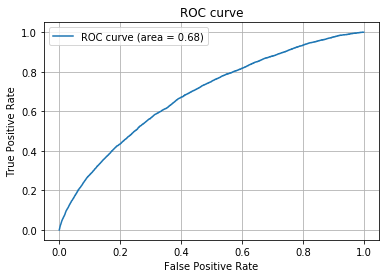

In [101]:
#ROC曲線をプロット

from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y3_test,y_pred_prob)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

#### OptunaのStepwise Tuningでハイパーパラメータをチューニング

メリット

- 計算時間が短い
- コード記述が楽
- ハイパーパラメータの知識がなくてもチューニングできる

デメリット

- パラメータの指定ができない→小回りが利かない
- パラメータ同士の相互影響を無視してしまう→少し精度が落ちる

In [64]:
#ハイパーパラメータチューニング自動化ライブラリ
import optuna
#LightGBM用Stepwise Tuningに必要
from optuna.integration import _lightgbm_tuner as lgb_tuner

In [69]:
lgb_train = lgb.Dataset(X3_train, y3_train)
lgb_eval = lgb.Dataset(X3_test, y3_test)

params = {'objective': 'binary', 
         'metric': 'auc'}

best_params = {} #Stepwise Tuningで調整されたベストのパラメータが格納
tuning_history = [] #どんなチューニングを試したか、その履歴が格納
 
gbm = lgb_tuner.train(params,
                    lgb_train,
                    valid_sets=lgb_eval,
                    num_boost_round=300,
                    early_stopping_rounds=50,
                    verbose_eval=50)









  0%|                                                                             | 0/7 [00:00<?, ?it/s]






feature_fraction, val_score: -inf:   0%|                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67721
[100]	valid_0's auc: 0.678731
Early stopping, best iteration is:
[76]	valid_0's auc: 0.679243









feature_fraction, val_score: 0.679243:   0%|                                      | 0/7 [01:30<?, ?it/s]






feature_fraction, val_score: 0.679243:  14%|####2                         | 1/7 [01:30<09:02, 90.49s/it][I 2020-08-05 15:22:23,684] Trial 0 finished with value: 0.6792425444429212 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.6792425444429212.







feature_fraction, val_score: 0.679243:  14%|####2                         | 1/7 [01:30<09:02, 90.49s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.678908
[100]	valid_0's auc: 0.680689
[150]	valid_0's auc: 0.680912
Early stopping, best iteration is:
[130]	valid_0's auc: 0.681141









feature_fraction, val_score: 0.681141:  14%|####2                         | 1/7 [02:34<09:02, 90.49s/it]






feature_fraction, val_score: 0.681141:  29%|########5                     | 2/7 [02:34<06:52, 82.47s/it][I 2020-08-05 15:23:27,326] Trial 1 finished with value: 0.6811407869472174 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.6811407869472174.







feature_fraction, val_score: 0.681141:  29%|########5                     | 2/7 [02:34<06:52, 82.47s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.679475
[100]	valid_0's auc: 0.681026
Early stopping, best iteration is:
[66]	valid_0's auc: 0.681301









feature_fraction, val_score: 0.681301:  29%|########5                     | 2/7 [03:21<06:52, 82.47s/it]






feature_fraction, val_score: 0.681301:  43%|############8                 | 3/7 [03:21<04:48, 72.04s/it][I 2020-08-05 15:24:15,041] Trial 2 finished with value: 0.681301245303956 and parameters: {'feature_fraction': 0.7}. Best is trial 2 with value: 0.681301245303956.







feature_fraction, val_score: 0.681301:  43%|############8                 | 3/7 [03:21<04:48, 72.04s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677811
[100]	valid_0's auc: 0.680558
[150]	valid_0's auc: 0.679502
Early stopping, best iteration is:
[101]	valid_0's auc: 0.680608









feature_fraction, val_score: 0.681301:  43%|############8                 | 3/7 [04:18<04:48, 72.04s/it]






feature_fraction, val_score: 0.681301:  57%|#################1            | 4/7 [04:18<03:22, 67.50s/it][I 2020-08-05 15:25:11,956] Trial 3 finished with value: 0.6806080735477604 and parameters: {'feature_fraction': 0.6}. Best is trial 2 with value: 0.681301245303956.







feature_fraction, val_score: 0.681301:  57%|#################1            | 4/7 [04:18<03:22, 67.50s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677117
[100]	valid_0's auc: 0.68115
[150]	valid_0's auc: 0.682239
[200]	valid_0's auc: 0.681359
Early stopping, best iteration is:
[150]	valid_0's auc: 0.682239









feature_fraction, val_score: 0.682239:  57%|#################1            | 4/7 [05:34<03:22, 67.50s/it]






feature_fraction, val_score: 0.682239:  71%|#####################4        | 5/7 [05:34<02:20, 70.02s/it][I 2020-08-05 15:26:27,915] Trial 4 finished with value: 0.6822388250366574 and parameters: {'feature_fraction': 0.4}. Best is trial 4 with value: 0.6822388250366574.







feature_fraction, val_score: 0.682239:  71%|#####################4        | 5/7 [05:34<02:20, 70.02s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.678099
[100]	valid_0's auc: 0.679259
Early stopping, best iteration is:
[82]	valid_0's auc: 0.679753









feature_fraction, val_score: 0.682239:  71%|#####################4        | 5/7 [06:41<02:20, 70.02s/it]






feature_fraction, val_score: 0.682239:  86%|#########################7    | 6/7 [06:41<01:09, 69.02s/it][I 2020-08-05 15:27:34,554] Trial 5 finished with value: 0.6797530697158483 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 4 with value: 0.6822388250366574.







feature_fraction, val_score: 0.682239:  86%|#########################7    | 6/7 [06:41<01:09, 69.02s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.678829
[100]	valid_0's auc: 0.681554
[150]	valid_0's auc: 0.681294
Early stopping, best iteration is:
[127]	valid_0's auc: 0.681699









feature_fraction, val_score: 0.682239:  86%|#########################7    | 6/7 [09:05<01:09, 69.02s/it]






feature_fraction, val_score: 0.682239: 100%|##############################| 7/7 [09:05<00:00, 77.98s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






num_leaves, val_score: 0.682239:   0%|                                           | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677399
[100]	valid_0's auc: 0.678223
Early stopping, best iteration is:
[85]	valid_0's auc: 0.679062









num_leaves, val_score: 0.682239:   0%|                                           | 0/20 [04:56<?, ?it/s]






num_leaves, val_score: 0.682239:   5%|#6                              | 1/20 [04:56<1:34:01, 296.94s/it][I 2020-08-05 15:34:56,045] Trial 7 finished with value: 0.6790620639895765 and parameters: {'num_leaves': 97}. Best is trial 7 with value: 0.6790620639895765.







num_leaves, val_score: 0.682239:   5%|#6                              | 1/20 [04:56<1:34:01, 296.94s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.675655
[100]	valid_0's auc: 0.673926
Early stopping, best iteration is:
[55]	valid_0's auc: 0.675929









num_leaves, val_score: 0.682239:   5%|#6                              | 1/20 [08:19<1:34:01, 296.94s/it]






num_leaves, val_score: 0.682239:  10%|###2                            | 2/20 [08:19<1:20:34, 268.57s/it][I 2020-08-05 15:38:18,464] Trial 8 finished with value: 0.6759287261423889 and parameters: {'num_leaves': 221}. Best is trial 7 with value: 0.6790620639895765.







num_leaves, val_score: 0.682239:  10%|###2                            | 2/20 [08:19<1:20:34, 268.57s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.672957
[100]	valid_0's auc: 0.67164
Early stopping, best iteration is:
[57]	valid_0's auc: 0.674073









num_leaves, val_score: 0.682239:  10%|###2                            | 2/20 [10:41<1:20:34, 268.57s/it]






num_leaves, val_score: 0.682239:  15%|####8                           | 3/20 [10:41<1:05:19, 230.57s/it][I 2020-08-05 15:40:40,320] Trial 9 finished with value: 0.6740731612676858 and parameters: {'num_leaves': 246}. Best is trial 7 with value: 0.6790620639895765.







num_leaves, val_score: 0.682239:  15%|####8                           | 3/20 [10:41<1:05:19, 230.57s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677656
[100]	valid_0's auc: 0.680496
[150]	valid_0's auc: 0.680167
Early stopping, best iteration is:
[110]	valid_0's auc: 0.680835









num_leaves, val_score: 0.682239:  15%|####8                           | 3/20 [12:35<1:05:19, 230.57s/it]






num_leaves, val_score: 0.682239:  20%|######8                           | 4/20 [12:35<52:11, 195.70s/it][I 2020-08-05 15:42:34,665] Trial 10 finished with value: 0.6808349298417892 and parameters: {'num_leaves': 29}. Best is trial 10 with value: 0.6808349298417892.







num_leaves, val_score: 0.682239:  20%|######8                           | 4/20 [12:35<52:11, 195.70s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676784
[100]	valid_0's auc: 0.675299
Early stopping, best iteration is:
[64]	valid_0's auc: 0.67773









num_leaves, val_score: 0.682239:  20%|######8                           | 4/20 [14:19<52:11, 195.70s/it]






num_leaves, val_score: 0.682239:  25%|########5                         | 5/20 [14:19<42:01, 168.09s/it][I 2020-08-05 15:44:18,321] Trial 11 finished with value: 0.6777299099858156 and parameters: {'num_leaves': 161}. Best is trial 10 with value: 0.6808349298417892.







num_leaves, val_score: 0.682239:  25%|########5                         | 5/20 [14:19<42:01, 168.09s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676995
[100]	valid_0's auc: 0.681598
[150]	valid_0's auc: 0.682395
[200]	valid_0's auc: 0.682776
Early stopping, best iteration is:
[185]	valid_0's auc: 0.682969









num_leaves, val_score: 0.682969:  25%|########5                         | 5/20 [16:42<42:01, 168.09s/it]






num_leaves, val_score: 0.682969:  30%|##########2                       | 6/20 [16:42<37:29, 160.67s/it][I 2020-08-05 15:46:41,695] Trial 12 finished with value: 0.6829686175187698 and parameters: {'num_leaves': 19}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  30%|##########2                       | 6/20 [16:42<37:29, 160.67s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.675843
[100]	valid_0's auc: 0.679801
[150]	valid_0's auc: 0.681127
[200]	valid_0's auc: 0.681485
[250]	valid_0's auc: 0.681765
Early stopping, best iteration is:
[249]	valid_0's auc: 0.681821









num_leaves, val_score: 0.682969:  30%|##########2                       | 6/20 [19:33<37:29, 160.67s/it]






num_leaves, val_score: 0.682969:  35%|###########8                      | 7/20 [19:33<35:27, 163.66s/it][I 2020-08-05 15:49:32,331] Trial 13 finished with value: 0.6818214789510045 and parameters: {'num_leaves': 16}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  35%|###########8                      | 7/20 [19:33<35:27, 163.66s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67783
[100]	valid_0's auc: 0.679207
Early stopping, best iteration is:
[81]	valid_0's auc: 0.679921









num_leaves, val_score: 0.682969:  35%|###########8                      | 7/20 [21:06<35:27, 163.66s/it]






num_leaves, val_score: 0.682969:  40%|#############6                    | 8/20 [21:06<28:29, 142.46s/it][I 2020-08-05 15:51:05,394] Trial 14 finished with value: 0.6799208013730678 and parameters: {'num_leaves': 84}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  40%|#############6                    | 8/20 [21:06<28:29, 142.46s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.667227
[100]	valid_0's auc: 0.672392
[150]	valid_0's auc: 0.674924
[200]	valid_0's auc: 0.67652
[250]	valid_0's auc: 0.677819
[300]	valid_0's auc: 0.678503
Did not meet early stopping. Best iteration is:
[295]	valid_0's auc: 0.678544









num_leaves, val_score: 0.682969:  40%|#############6                    | 8/20 [22:20<28:29, 142.46s/it]






num_leaves, val_score: 0.682969:  45%|###############3                  | 9/20 [22:20<22:22, 122.08s/it][I 2020-08-05 15:52:19,856] Trial 15 finished with value: 0.6785435038856479 and parameters: {'num_leaves': 4}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  45%|###############3                  | 9/20 [22:20<22:22, 122.08s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676717
[100]	valid_0's auc: 0.676347
Early stopping, best iteration is:
[63]	valid_0's auc: 0.677829









num_leaves, val_score: 0.682969:  45%|###############3                  | 9/20 [23:59<22:22, 122.08s/it]






num_leaves, val_score: 0.682969:  50%|################5                | 10/20 [23:59<19:10, 115.00s/it][I 2020-08-05 15:53:58,335] Trial 16 finished with value: 0.6778288405525454 and parameters: {'num_leaves': 169}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  50%|################5                | 10/20 [23:59<19:10, 115.00s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677904
[100]	valid_0's auc: 0.679123
Early stopping, best iteration is:
[73]	valid_0's auc: 0.680033









num_leaves, val_score: 0.682969:  50%|################5                | 10/20 [25:47<19:10, 115.00s/it]






num_leaves, val_score: 0.682969:  55%|##################1              | 11/20 [25:47<16:56, 112.93s/it][I 2020-08-05 15:55:46,494] Trial 17 finished with value: 0.6800325662371038 and parameters: {'num_leaves': 66}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  55%|##################1              | 11/20 [25:47<16:56, 112.93s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.678474
[100]	valid_0's auc: 0.680304
[150]	valid_0's auc: 0.680697
Early stopping, best iteration is:
[134]	valid_0's auc: 0.68101









num_leaves, val_score: 0.682969:  55%|##################1              | 11/20 [28:26<16:56, 112.93s/it]






num_leaves, val_score: 0.682969:  60%|###################8             | 12/20 [28:26<16:55, 126.88s/it][I 2020-08-05 15:58:25,848] Trial 18 finished with value: 0.6810102528638837 and parameters: {'num_leaves': 48}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  60%|###################8             | 12/20 [28:26<16:55, 126.88s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67736
[100]	valid_0's auc: 0.676913
Early stopping, best iteration is:
[59]	valid_0's auc: 0.677888









num_leaves, val_score: 0.682969:  60%|###################8             | 12/20 [30:34<16:55, 126.88s/it]






num_leaves, val_score: 0.682969:  65%|#####################4           | 13/20 [30:34<14:49, 127.00s/it][I 2020-08-05 16:00:33,137] Trial 19 finished with value: 0.6778877953270079 and parameters: {'num_leaves': 129}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  65%|#####################4           | 13/20 [30:34<14:49, 127.00s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.65172
[100]	valid_0's auc: 0.66165
[150]	valid_0's auc: 0.665465
[200]	valid_0's auc: 0.667565
[250]	valid_0's auc: 0.668927
[300]	valid_0's auc: 0.669985
Did not meet early stopping. Best iteration is:
[300]	valid_0's auc: 0.669985









num_leaves, val_score: 0.682969:  65%|#####################4           | 13/20 [31:54<14:49, 127.00s/it]






num_leaves, val_score: 0.682969:  70%|#######################          | 14/20 [31:54<11:17, 112.91s/it][I 2020-08-05 16:01:53,196] Trial 20 finished with value: 0.6699847980267841 and parameters: {'num_leaves': 2}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  70%|#######################          | 14/20 [31:54<11:17, 112.91s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.672183
[100]	valid_0's auc: 0.677104
[150]	valid_0's auc: 0.679462
[200]	valid_0's auc: 0.680711
[250]	valid_0's auc: 0.681133
[300]	valid_0's auc: 0.681611
Did not meet early stopping. Best iteration is:
[299]	valid_0's auc: 0.681631









num_leaves, val_score: 0.682969:  70%|#######################          | 14/20 [33:59<11:17, 112.91s/it]






num_leaves, val_score: 0.682969:  75%|########################7        | 15/20 [33:59<09:42, 116.58s/it][I 2020-08-05 16:03:58,339] Trial 21 finished with value: 0.6816314178053022 and parameters: {'num_leaves': 7}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  75%|########################7        | 15/20 [33:59<09:42, 116.58s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67834
[100]	valid_0's auc: 0.681133
Early stopping, best iteration is:
[86]	valid_0's auc: 0.681369









num_leaves, val_score: 0.682969:  75%|########################7        | 15/20 [36:07<09:42, 116.58s/it]






num_leaves, val_score: 0.682969:  80%|##########################4      | 16/20 [36:07<08:00, 120.00s/it][I 2020-08-05 16:06:06,310] Trial 22 finished with value: 0.681368680655578 and parameters: {'num_leaves': 39}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  80%|##########################4      | 16/20 [36:07<08:00, 120.00s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676278
[100]	valid_0's auc: 0.677011
Early stopping, best iteration is:
[63]	valid_0's auc: 0.678485









num_leaves, val_score: 0.682969:  80%|##########################4      | 16/20 [37:56<08:00, 120.00s/it]






num_leaves, val_score: 0.682969:  85%|############################     | 17/20 [37:56<05:50, 116.69s/it][I 2020-08-05 16:07:55,260] Trial 23 finished with value: 0.6784851020188238 and parameters: {'num_leaves': 119}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  85%|############################     | 17/20 [37:56<05:50, 116.69s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677062
[100]	valid_0's auc: 0.681101
[150]	valid_0's auc: 0.681315
Early stopping, best iteration is:
[132]	valid_0's auc: 0.681638









num_leaves, val_score: 0.682969:  85%|############################     | 17/20 [39:35<05:50, 116.69s/it]






num_leaves, val_score: 0.682969:  90%|#############################7   | 18/20 [39:35<03:43, 111.51s/it][I 2020-08-05 16:09:34,688] Trial 24 finished with value: 0.6816381438982235 and parameters: {'num_leaves': 21}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  90%|#############################7   | 18/20 [39:35<03:43, 111.51s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.678906
[100]	valid_0's auc: 0.680123
Early stopping, best iteration is:
[82]	valid_0's auc: 0.68091









num_leaves, val_score: 0.682969:  90%|#############################7   | 18/20 [41:49<03:43, 111.51s/it]






num_leaves, val_score: 0.682969:  95%|###############################3 | 19/20 [41:49<01:58, 118.31s/it][I 2020-08-05 16:11:48,862] Trial 25 finished with value: 0.680910430804838 and parameters: {'num_leaves': 63}. Best is trial 12 with value: 0.6829686175187698.







num_leaves, val_score: 0.682969:  95%|###############################3 | 19/20 [41:49<01:58, 118.31s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.678177
[100]	valid_0's auc: 0.679818
Early stopping, best iteration is:
[83]	valid_0's auc: 0.680555









num_leaves, val_score: 0.682969:  95%|###############################3 | 19/20 [43:51<01:58, 118.31s/it]






num_leaves, val_score: 0.682969: 100%|#################################| 20/20 [43:51<00:00, 131.57s/it]







  0%|                                                                            | 0/10 [00:00<?, ?it/s]






bagging, val_score: 0.682969:   0%|                                              | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676571
[100]	valid_0's auc: 0.679803
[150]	valid_0's auc: 0.681055
[200]	valid_0's auc: 0.681556
[250]	valid_0's auc: 0.681473
Early stopping, best iteration is:
[217]	valid_0's auc: 0.681808









bagging, val_score: 0.682969:   0%|                                              | 0/10 [02:34<?, ?it/s]






bagging, val_score: 0.682969:  10%|###7                                 | 1/10 [02:34<23:09, 154.36s/it][I 2020-08-05 16:16:24,931] Trial 27 finished with value: 0.6818078648829257 and parameters: {'bagging_fraction': 0.8389734292600087, 'bagging_freq': 5}. Best is trial 27 with value: 0.6818078648829257.







bagging, val_score: 0.682969:  10%|###7                                 | 1/10 [02:34<23:09, 154.36s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.674896
[100]	valid_0's auc: 0.676743
[150]	valid_0's auc: 0.677461
[200]	valid_0's auc: 0.677631
Early stopping, best iteration is:
[194]	valid_0's auc: 0.677876









bagging, val_score: 0.682969:  10%|###7                                 | 1/10 [05:13<23:09, 154.36s/it]






bagging, val_score: 0.682969:  20%|#######4                             | 2/10 [05:13<20:46, 155.86s/it][I 2020-08-05 16:19:04,266] Trial 28 finished with value: 0.6778762948481284 and parameters: {'bagging_fraction': 0.4176147017719742, 'bagging_freq': 1}. Best is trial 27 with value: 0.6818078648829257.







bagging, val_score: 0.682969:  20%|#######4                             | 2/10 [05:13<20:46, 155.86s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.675553
[100]	valid_0's auc: 0.678662
[150]	valid_0's auc: 0.679446
[200]	valid_0's auc: 0.679408
Early stopping, best iteration is:
[176]	valid_0's auc: 0.679748









bagging, val_score: 0.682969:  20%|#######4                             | 2/10 [07:21<20:46, 155.86s/it]






bagging, val_score: 0.682969:  30%|###########1                         | 3/10 [07:21<17:11, 147.35s/it][I 2020-08-05 16:21:11,746] Trial 29 finished with value: 0.6797481231875118 and parameters: {'bagging_fraction': 0.44545584721415216, 'bagging_freq': 7}. Best is trial 27 with value: 0.6818078648829257.







bagging, val_score: 0.682969:  30%|###########1                         | 3/10 [07:21<17:11, 147.35s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677401
[100]	valid_0's auc: 0.6808
[150]	valid_0's auc: 0.681873
[200]	valid_0's auc: 0.681868
Early stopping, best iteration is:
[175]	valid_0's auc: 0.682365









bagging, val_score: 0.682969:  30%|###########1                         | 3/10 [10:29<17:11, 147.35s/it]






bagging, val_score: 0.682969:  40%|##############8                      | 4/10 [10:29<15:58, 159.73s/it][I 2020-08-05 16:24:20,379] Trial 30 finished with value: 0.6823654602661282 and parameters: {'bagging_fraction': 0.975430016749949, 'bagging_freq': 1}. Best is trial 30 with value: 0.6823654602661282.







bagging, val_score: 0.682969:  40%|##############8                      | 4/10 [10:29<15:58, 159.73s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676809
[100]	valid_0's auc: 0.68139
[150]	valid_0's auc: 0.683024
[200]	valid_0's auc: 0.683018
Early stopping, best iteration is:
[172]	valid_0's auc: 0.683306









bagging, val_score: 0.683306:  40%|##############8                      | 4/10 [12:27<15:58, 159.73s/it]






bagging, val_score: 0.683306:  50%|##################5                  | 5/10 [12:27<12:16, 147.26s/it][I 2020-08-05 16:26:18,527] Trial 31 finished with value: 0.6833059618591953 and parameters: {'bagging_fraction': 0.979145935258918, 'bagging_freq': 1}. Best is trial 31 with value: 0.6833059618591953.







bagging, val_score: 0.683306:  50%|##################5                  | 5/10 [12:28<12:16, 147.26s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676985
[100]	valid_0's auc: 0.680396
[150]	valid_0's auc: 0.681028
[200]	valid_0's auc: 0.681016
Early stopping, best iteration is:
[155]	valid_0's auc: 0.681128









bagging, val_score: 0.683306:  50%|##################5                  | 5/10 [14:00<12:16, 147.26s/it]






bagging, val_score: 0.683306:  60%|######################2              | 6/10 [14:00<08:42, 130.73s/it][I 2020-08-05 16:27:50,681] Trial 32 finished with value: 0.6811281487326198 and parameters: {'bagging_fraction': 0.9926456874144522, 'bagging_freq': 1}. Best is trial 31 with value: 0.6833059618591953.







bagging, val_score: 0.683306:  60%|######################2              | 6/10 [14:00<08:42, 130.73s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677613
[100]	valid_0's auc: 0.680977
[150]	valid_0's auc: 0.681615
[200]	valid_0's auc: 0.68101
Early stopping, best iteration is:
[161]	valid_0's auc: 0.68176









bagging, val_score: 0.683306:  60%|######################2              | 6/10 [15:23<08:42, 130.73s/it]






bagging, val_score: 0.683306:  70%|#########################9           | 7/10 [15:23<05:49, 116.41s/it][I 2020-08-05 16:29:13,670] Trial 33 finished with value: 0.6817599158205074 and parameters: {'bagging_fraction': 0.9680156704964568, 'bagging_freq': 2}. Best is trial 31 with value: 0.6833059618591953.







bagging, val_score: 0.683306:  70%|#########################9           | 7/10 [15:23<05:49, 116.41s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67557
[100]	valid_0's auc: 0.679472
[150]	valid_0's auc: 0.680752
[200]	valid_0's auc: 0.68041
Early stopping, best iteration is:
[173]	valid_0's auc: 0.680822









bagging, val_score: 0.683306:  70%|#########################9           | 7/10 [17:35<05:49, 116.41s/it]






bagging, val_score: 0.683306:  80%|#############################6       | 8/10 [17:35<04:02, 121.05s/it][I 2020-08-05 16:31:25,560] Trial 34 finished with value: 0.6808215346567341 and parameters: {'bagging_fraction': 0.78413290408811, 'bagging_freq': 3}. Best is trial 31 with value: 0.6833059618591953.







bagging, val_score: 0.683306:  80%|#############################6       | 8/10 [17:35<04:02, 121.05s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676984
[100]	valid_0's auc: 0.680317
[150]	valid_0's auc: 0.681697
[200]	valid_0's auc: 0.681483
Early stopping, best iteration is:
[166]	valid_0's auc: 0.681835









bagging, val_score: 0.683306:  80%|#############################6       | 8/10 [20:19<04:02, 121.05s/it]






bagging, val_score: 0.683306:  90%|#################################3   | 9/10 [20:19<02:14, 134.04s/it][I 2020-08-05 16:34:09,898] Trial 35 finished with value: 0.6818346689332248 and parameters: {'bagging_fraction': 0.990050232143268, 'bagging_freq': 1}. Best is trial 31 with value: 0.6833059618591953.







bagging, val_score: 0.683306:  90%|#################################3   | 9/10 [20:19<02:14, 134.04s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676239
[100]	valid_0's auc: 0.679306
[150]	valid_0's auc: 0.679397
[200]	valid_0's auc: 0.679563
Early stopping, best iteration is:
[162]	valid_0's auc: 0.679773









bagging, val_score: 0.683306:  90%|#################################3   | 9/10 [22:30<02:14, 134.04s/it]






bagging, val_score: 0.683306: 100%|####################################| 10/10 [22:30<00:00, 135.09s/it]







  0%|                                                                             | 0/3 [00:00<?, ?it/s]






feature_fraction_stage2, val_score: 0.683306:   0%|                               | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677388
[100]	valid_0's auc: 0.681569
[150]	valid_0's auc: 0.682087
[200]	valid_0's auc: 0.682285
[250]	valid_0's auc: 0.681951
Early stopping, best iteration is:
[208]	valid_0's auc: 0.682386









feature_fraction_stage2, val_score: 0.683306:   0%|                               | 0/3 [02:26<?, ?it/s]






feature_fraction_stage2, val_score: 0.683306:  33%|#######3              | 1/3 [02:26<04:52, 146.41s/it][I 2020-08-05 16:38:48,486] Trial 37 finished with value: 0.682385643104955 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.682385643104955.







feature_fraction_stage2, val_score: 0.683306:  33%|#######3              | 1/3 [02:26<04:52, 146.41s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676504
[100]	valid_0's auc: 0.68011
[150]	valid_0's auc: 0.680642
[200]	valid_0's auc: 0.681024
[250]	valid_0's auc: 0.681024
Early stopping, best iteration is:
[229]	valid_0's auc: 0.681326









feature_fraction_stage2, val_score: 0.683306:  33%|#######3              | 1/3 [04:32<04:52, 146.41s/it]






feature_fraction_stage2, val_score: 0.683306:  67%|##############6       | 2/3 [04:32<02:20, 140.28s/it][I 2020-08-05 16:40:54,473] Trial 38 finished with value: 0.6813259391851029 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.682385643104955.







feature_fraction_stage2, val_score: 0.683306:  67%|##############6       | 2/3 [04:32<02:20, 140.28s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676287
[100]	valid_0's auc: 0.679318
[150]	valid_0's auc: 0.680295
[200]	valid_0's auc: 0.680638
[250]	valid_0's auc: 0.679967
Early stopping, best iteration is:
[200]	valid_0's auc: 0.680638









feature_fraction_stage2, val_score: 0.683306:  67%|##############6       | 2/3 [06:39<02:20, 140.28s/it]






feature_fraction_stage2, val_score: 0.683306: 100%|######################| 3/3 [06:39<00:00, 133.07s/it]







  0%|                                                                            | 0/20 [00:00<?, ?it/s]






regularization_factors, val_score: 0.683306:   0%|                               | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677153
[100]	valid_0's auc: 0.681124
[150]	valid_0's auc: 0.682363
[200]	valid_0's auc: 0.682677
[250]	valid_0's auc: 0.683103
[300]	valid_0's auc: 0.682822
Did not meet early stopping. Best iteration is:
[274]	valid_0's auc: 0.683493









regularization_factors, val_score: 0.683493:   0%|                               | 0/20 [01:42<?, ?it/s]






regularization_factors, val_score: 0.683493:   5%|#1                    | 1/20 [01:42<32:23, 102.30s/it][I 2020-08-05 16:44:43,624] Trial 40 finished with value: 0.6834930293235398 and parameters: {'lambda_l1': 0.6540834140183571, 'lambda_l2': 3.0802664620937446e-06}. Best is trial 40 with value: 0.6834930293235398.







regularization_factors, val_score: 0.683493:   5%|#1                    | 1/20 [01:42<32:23, 102.30s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677447
[100]	valid_0's auc: 0.681686
[150]	valid_0's auc: 0.682783
[200]	valid_0's auc: 0.68361
[250]	valid_0's auc: 0.683906
[300]	valid_0's auc: 0.683809
Did not meet early stopping. Best iteration is:
[269]	valid_0's auc: 0.684064









regularization_factors, val_score: 0.684064:   5%|#1                    | 1/20 [04:33<32:23, 102.30s/it]






regularization_factors, val_score: 0.684064:  10%|##2                   | 2/20 [04:33<36:52, 122.89s/it][I 2020-08-05 16:47:34,688] Trial 41 finished with value: 0.6840636961273245 and parameters: {'lambda_l1': 1.6003849813271709, 'lambda_l2': 2.3978680533159297e-06}. Best is trial 41 with value: 0.6840636961273245.







regularization_factors, val_score: 0.684064:  10%|##2                   | 2/20 [04:33<36:52, 122.89s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676925
[100]	valid_0's auc: 0.681748
[150]	valid_0's auc: 0.682794
[200]	valid_0's auc: 0.683283
[250]	valid_0's auc: 0.683688
[300]	valid_0's auc: 0.683707
Did not meet early stopping. Best iteration is:
[292]	valid_0's auc: 0.683909









regularization_factors, val_score: 0.684064:  10%|##2                   | 2/20 [06:54<36:52, 122.89s/it]






regularization_factors, val_score: 0.684064:  15%|###3                  | 3/20 [06:54<36:24, 128.50s/it][I 2020-08-05 16:49:56,146] Trial 42 finished with value: 0.6839086357451591 and parameters: {'lambda_l1': 2.9261158130653317, 'lambda_l2': 1.5521717459337092e-06}. Best is trial 41 with value: 0.6840636961273245.







regularization_factors, val_score: 0.684064:  15%|###3                  | 3/20 [06:54<36:24, 128.50s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676792
[100]	valid_0's auc: 0.680944
[150]	valid_0's auc: 0.682093
[200]	valid_0's auc: 0.683128
[250]	valid_0's auc: 0.683387
[300]	valid_0's auc: 0.68365
Did not meet early stopping. Best iteration is:
[299]	valid_0's auc: 0.683678









regularization_factors, val_score: 0.684064:  15%|###3                  | 3/20 [09:56<36:24, 128.50s/it]






regularization_factors, val_score: 0.684064:  20%|####4                 | 4/20 [09:56<38:29, 144.32s/it][I 2020-08-05 16:52:57,401] Trial 43 finished with value: 0.6836781975216459 and parameters: {'lambda_l1': 6.901333430382007, 'lambda_l2': 1.6934374198349524e-06}. Best is trial 41 with value: 0.6840636961273245.







regularization_factors, val_score: 0.684064:  20%|####4                 | 4/20 [09:56<38:29, 144.32s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677062
[100]	valid_0's auc: 0.681877
[150]	valid_0's auc: 0.68294
[200]	valid_0's auc: 0.683439
[250]	valid_0's auc: 0.683569
[300]	valid_0's auc: 0.683902
Did not meet early stopping. Best iteration is:
[298]	valid_0's auc: 0.683946









regularization_factors, val_score: 0.684064:  20%|####4                 | 4/20 [12:28<38:29, 144.32s/it]






regularization_factors, val_score: 0.684064:  25%|#####5                | 5/20 [12:28<36:43, 146.89s/it][I 2020-08-05 16:55:30,282] Trial 44 finished with value: 0.6839458162188089 and parameters: {'lambda_l1': 2.979645919330638, 'lambda_l2': 1.5888288796379164e-06}. Best is trial 41 with value: 0.6840636961273245.







regularization_factors, val_score: 0.684064:  25%|#####5                | 5/20 [12:28<36:43, 146.89s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67705
[100]	valid_0's auc: 0.68072
[150]	valid_0's auc: 0.682303
[200]	valid_0's auc: 0.683376
[250]	valid_0's auc: 0.683306
[300]	valid_0's auc: 0.683515
Did not meet early stopping. Best iteration is:
[291]	valid_0's auc: 0.683724









regularization_factors, val_score: 0.684064:  25%|#####5                | 5/20 [14:22<36:43, 146.89s/it]






regularization_factors, val_score: 0.684064:  30%|######6               | 6/20 [14:22<31:56, 136.92s/it][I 2020-08-05 16:57:23,935] Trial 45 finished with value: 0.6837244206002195 and parameters: {'lambda_l1': 3.7165490059352693, 'lambda_l2': 1.8391426152727402e-06}. Best is trial 41 with value: 0.6840636961273245.







regularization_factors, val_score: 0.684064:  30%|######6               | 6/20 [14:22<31:56, 136.92s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.675955
[100]	valid_0's auc: 0.680409
[150]	valid_0's auc: 0.682052
[200]	valid_0's auc: 0.68296
[250]	valid_0's auc: 0.683253
[300]	valid_0's auc: 0.683514
Did not meet early stopping. Best iteration is:
[288]	valid_0's auc: 0.683647









regularization_factors, val_score: 0.684064:  30%|######6               | 6/20 [16:16<31:56, 136.92s/it]






regularization_factors, val_score: 0.684064:  35%|#######7              | 7/20 [16:16<28:10, 130.01s/it][I 2020-08-05 16:59:17,820] Trial 46 finished with value: 0.6836471092921608 and parameters: {'lambda_l1': 7.796654564154021, 'lambda_l2': 1.8882558660257155e-06}. Best is trial 41 with value: 0.6840636961273245.







regularization_factors, val_score: 0.684064:  35%|#######7              | 7/20 [16:16<28:10, 130.01s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676828
[100]	valid_0's auc: 0.681475
[150]	valid_0's auc: 0.683079
[200]	valid_0's auc: 0.683776
[250]	valid_0's auc: 0.684194
[300]	valid_0's auc: 0.684418
Did not meet early stopping. Best iteration is:
[286]	valid_0's auc: 0.684646









regularization_factors, val_score: 0.684646:  35%|#######7              | 7/20 [18:21<28:10, 130.01s/it]






regularization_factors, val_score: 0.684646:  40%|########8             | 8/20 [18:21<25:43, 128.65s/it][I 2020-08-05 17:01:23,307] Trial 47 finished with value: 0.6846461666541782 and parameters: {'lambda_l1': 3.601809633917664, 'lambda_l2': 1.0927098187016393e-06}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  40%|########8             | 8/20 [18:22<25:43, 128.65s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677287
[100]	valid_0's auc: 0.682096
[150]	valid_0's auc: 0.683385
[200]	valid_0's auc: 0.683624
[250]	valid_0's auc: 0.684111
[300]	valid_0's auc: 0.684187
Did not meet early stopping. Best iteration is:
[275]	valid_0's auc: 0.684238









regularization_factors, val_score: 0.684646:  40%|########8             | 8/20 [20:40<25:43, 128.65s/it]






regularization_factors, val_score: 0.684646:  45%|#########9            | 9/20 [20:40<24:08, 131.71s/it][I 2020-08-05 17:03:42,156] Trial 48 finished with value: 0.6842380638162211 and parameters: {'lambda_l1': 2.1302961300000436, 'lambda_l2': 1.1088717149059007e-06}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  45%|#########9            | 9/20 [20:40<24:08, 131.71s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677092
[100]	valid_0's auc: 0.681403
[150]	valid_0's auc: 0.682655
[200]	valid_0's auc: 0.683123
[250]	valid_0's auc: 0.683112
Early stopping, best iteration is:
[201]	valid_0's auc: 0.683154









regularization_factors, val_score: 0.684646:  45%|#########9            | 9/20 [22:05<24:08, 131.71s/it]






regularization_factors, val_score: 0.684646:  50%|##########5          | 10/20 [22:05<19:36, 117.62s/it][I 2020-08-05 17:05:06,911] Trial 49 finished with value: 0.6831544834065144 and parameters: {'lambda_l1': 0.8068426594324429, 'lambda_l2': 6.372465507779268e-07}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  50%|##########5          | 10/20 [22:05<19:36, 117.62s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677551
[100]	valid_0's auc: 0.68123
[150]	valid_0's auc: 0.682191
[200]	valid_0's auc: 0.682148
[250]	valid_0's auc: 0.682385
[300]	valid_0's auc: 0.682427
Did not meet early stopping. Best iteration is:
[280]	valid_0's auc: 0.682457









regularization_factors, val_score: 0.684646:  50%|##########5          | 10/20 [24:20<19:36, 117.62s/it]






regularization_factors, val_score: 0.684646:  55%|###########5         | 11/20 [24:20<18:24, 122.76s/it][I 2020-08-05 17:07:21,662] Trial 50 finished with value: 0.68245693968992 and parameters: {'lambda_l1': 0.4074388992199911, 'lambda_l2': 0.14291506263952772}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  55%|###########5         | 11/20 [24:20<18:24, 122.76s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677451
[100]	valid_0's auc: 0.681232
[150]	valid_0's auc: 0.682405
[200]	valid_0's auc: 0.683708
[250]	valid_0's auc: 0.684299
[300]	valid_0's auc: 0.684217
Did not meet early stopping. Best iteration is:
[255]	valid_0's auc: 0.684429









regularization_factors, val_score: 0.684646:  55%|###########5         | 11/20 [27:05<18:24, 122.76s/it]






regularization_factors, val_score: 0.684646:  60%|############6        | 12/20 [27:05<18:02, 135.37s/it][I 2020-08-05 17:10:06,462] Trial 51 finished with value: 0.68442889561257 and parameters: {'lambda_l1': 5.103742870399183, 'lambda_l2': 1.388437523169046e-06}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  60%|############6        | 12/20 [27:05<18:02, 135.37s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676322
[100]	valid_0's auc: 0.68097
[150]	valid_0's auc: 0.683073
[200]	valid_0's auc: 0.683718
[250]	valid_0's auc: 0.684177
[300]	valid_0's auc: 0.68412
Did not meet early stopping. Best iteration is:
[257]	valid_0's auc: 0.684315









regularization_factors, val_score: 0.684646:  60%|############6        | 12/20 [29:09<18:02, 135.37s/it]






regularization_factors, val_score: 0.684646:  65%|#############6       | 13/20 [29:09<15:25, 132.17s/it][I 2020-08-05 17:12:11,156] Trial 52 finished with value: 0.6843152998832405 and parameters: {'lambda_l1': 8.364874969672021, 'lambda_l2': 2.8336915956684244e-07}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  65%|#############6       | 13/20 [29:09<15:25, 132.17s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676809
[100]	valid_0's auc: 0.68139
[150]	valid_0's auc: 0.683024
[200]	valid_0's auc: 0.683018
Early stopping, best iteration is:
[172]	valid_0's auc: 0.683306









regularization_factors, val_score: 0.684646:  65%|#############6       | 13/20 [30:29<15:25, 132.17s/it]






regularization_factors, val_score: 0.684646:  70%|##############7      | 14/20 [30:29<11:38, 116.48s/it][I 2020-08-05 17:13:31,188] Trial 53 finished with value: 0.6833059618591953 and parameters: {'lambda_l1': 1.3822104961058016e-08, 'lambda_l2': 1.582912701262506e-08}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  70%|##############7      | 14/20 [30:29<11:38, 116.48s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676802
[100]	valid_0's auc: 0.68115
[150]	valid_0's auc: 0.681531
[200]	valid_0's auc: 0.681737
[250]	valid_0's auc: 0.682072
Early stopping, best iteration is:
[242]	valid_0's auc: 0.682263









regularization_factors, val_score: 0.684646:  70%|##############7      | 14/20 [33:33<11:38, 116.48s/it]






regularization_factors, val_score: 0.684646:  75%|###############7     | 15/20 [33:33<11:23, 136.69s/it][I 2020-08-05 17:16:34,877] Trial 54 finished with value: 0.682262852008591 and parameters: {'lambda_l1': 0.009287151583527309, 'lambda_l2': 4.747113747301348e-08}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  75%|###############7     | 15/20 [33:33<11:23, 136.69s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.675902
[100]	valid_0's auc: 0.680225
[150]	valid_0's auc: 0.681584
[200]	valid_0's auc: 0.68254
[250]	valid_0's auc: 0.682915
[300]	valid_0's auc: 0.683083
Did not meet early stopping. Best iteration is:
[299]	valid_0's auc: 0.683105









regularization_factors, val_score: 0.684646:  75%|###############7     | 15/20 [34:53<11:23, 136.69s/it]






regularization_factors, val_score: 0.684646:  80%|################8    | 16/20 [34:53<07:58, 119.61s/it][I 2020-08-05 17:17:54,631] Trial 55 finished with value: 0.6831050090030236 and parameters: {'lambda_l1': 9.824215461262465, 'lambda_l2': 0.0001141919202184388}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  80%|################8    | 16/20 [34:53<07:58, 119.61s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677473
[100]	valid_0's auc: 0.681109
[150]	valid_0's auc: 0.682824
[200]	valid_0's auc: 0.683114
[250]	valid_0's auc: 0.683166
Early stopping, best iteration is:
[239]	valid_0's auc: 0.683402









regularization_factors, val_score: 0.684646:  80%|################8    | 16/20 [36:05<07:58, 119.61s/it]






regularization_factors, val_score: 0.684646:  85%|#################8   | 17/20 [36:05<05:16, 105.39s/it][I 2020-08-05 17:19:06,849] Trial 56 finished with value: 0.6834017505425198 and parameters: {'lambda_l1': 0.07088354174935425, 'lambda_l2': 1.1555654094609057e-07}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  85%|#################8   | 17/20 [36:05<05:16, 105.39s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676455
[100]	valid_0's auc: 0.680392
[150]	valid_0's auc: 0.682202
[200]	valid_0's auc: 0.683368
[250]	valid_0's auc: 0.683631
[300]	valid_0's auc: 0.684221
Did not meet early stopping. Best iteration is:
[300]	valid_0's auc: 0.684221









regularization_factors, val_score: 0.684646:  85%|#################8   | 17/20 [37:44<05:16, 105.39s/it]






regularization_factors, val_score: 0.684646:  90%|##################9  | 18/20 [37:44<03:26, 103.34s/it][I 2020-08-05 17:20:45,390] Trial 57 finished with value: 0.6842207811774608 and parameters: {'lambda_l1': 6.915326978413718, 'lambda_l2': 5.700613382801916e-05}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  90%|##################9  | 18/20 [37:44<03:26, 103.34s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676809
[100]	valid_0's auc: 0.68139
[150]	valid_0's auc: 0.683024
[200]	valid_0's auc: 0.683035
Early stopping, best iteration is:
[172]	valid_0's auc: 0.683306









regularization_factors, val_score: 0.684646:  90%|##################9  | 18/20 [39:22<03:26, 103.34s/it]






regularization_factors, val_score: 0.684646:  95%|###################9 | 19/20 [39:22<01:41, 101.75s/it][I 2020-08-05 17:22:23,443] Trial 58 finished with value: 0.6833059846595103 and parameters: {'lambda_l1': 1.7676667599679035e-06, 'lambda_l2': 0.0001575778970910149}. Best is trial 47 with value: 0.6846461666541782.







regularization_factors, val_score: 0.684646:  95%|###################9 | 19/20 [39:22<01:41, 101.75s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.67591
[100]	valid_0's auc: 0.680239
[150]	valid_0's auc: 0.68242
[200]	valid_0's auc: 0.683219
[250]	valid_0's auc: 0.683842
[300]	valid_0's auc: 0.684111
Did not meet early stopping. Best iteration is:
[288]	valid_0's auc: 0.684169









regularization_factors, val_score: 0.684646:  95%|###################9 | 19/20 [41:23<01:41, 101.75s/it]






regularization_factors, val_score: 0.684646: 100%|#####################| 20/20 [41:23<00:00, 124.19s/it]







  0%|                                                                             | 0/5 [00:00<?, ?it/s]






min_data_in_leaf, val_score: 0.684646:   0%|                                      | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676984
[100]	valid_0's auc: 0.681104
[150]	valid_0's auc: 0.682168
[200]	valid_0's auc: 0.682709
[250]	valid_0's auc: 0.683475
[300]	valid_0's auc: 0.683508
Did not meet early stopping. Best iteration is:
[284]	valid_0's auc: 0.683768









min_data_in_leaf, val_score: 0.684646:   0%|                                      | 0/5 [02:01<?, ?it/s]






min_data_in_leaf, val_score: 0.684646:  20%|#####8                       | 1/5 [02:01<08:04, 121.07s/it][I 2020-08-05 17:26:26,242] Trial 60 finished with value: 0.6837682473656881 and parameters: {'min_child_samples': 100}. Best is trial 60 with value: 0.6837682473656881.







min_data_in_leaf, val_score: 0.684646:  20%|#####8                       | 1/5 [02:01<08:04, 121.07s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676828
[100]	valid_0's auc: 0.681438
[150]	valid_0's auc: 0.682659
[200]	valid_0's auc: 0.683819
[250]	valid_0's auc: 0.684245
[300]	valid_0's auc: 0.684587
Did not meet early stopping. Best iteration is:
[299]	valid_0's auc: 0.684638









min_data_in_leaf, val_score: 0.684646:  20%|#####8                       | 1/5 [03:36<08:04, 121.07s/it]






min_data_in_leaf, val_score: 0.684646:  40%|###########6                 | 2/5 [03:36<05:40, 113.49s/it][I 2020-08-05 17:28:02,069] Trial 61 finished with value: 0.6846380337818222 and parameters: {'min_child_samples': 10}. Best is trial 61 with value: 0.6846380337818222.







min_data_in_leaf, val_score: 0.684646:  40%|###########6                 | 2/5 [03:37<05:40, 113.49s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676828
[100]	valid_0's auc: 0.681345
[150]	valid_0's auc: 0.682718
[200]	valid_0's auc: 0.683771
[250]	valid_0's auc: 0.684197
[300]	valid_0's auc: 0.684689
Did not meet early stopping. Best iteration is:
[298]	valid_0's auc: 0.684851









min_data_in_leaf, val_score: 0.684851:  40%|###########6                 | 2/5 [04:32<05:40, 113.49s/it]






min_data_in_leaf, val_score: 0.684851:  60%|##################            | 3/5 [04:32<03:12, 96.05s/it][I 2020-08-05 17:28:57,392] Trial 62 finished with value: 0.6848509408431418 and parameters: {'min_child_samples': 25}. Best is trial 62 with value: 0.6848509408431418.







min_data_in_leaf, val_score: 0.684851:  60%|##################            | 3/5 [04:32<03:12, 96.05s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.677316
[100]	valid_0's auc: 0.681219
[150]	valid_0's auc: 0.682352
[200]	valid_0's auc: 0.682695
[250]	valid_0's auc: 0.683294
[300]	valid_0's auc: 0.683376
Did not meet early stopping. Best iteration is:
[286]	valid_0's auc: 0.683609









min_data_in_leaf, val_score: 0.684851:  60%|##################            | 3/5 [05:30<03:12, 96.05s/it]






min_data_in_leaf, val_score: 0.684851:  80%|########################      | 4/5 [05:30<01:24, 84.65s/it][I 2020-08-05 17:29:55,456] Trial 63 finished with value: 0.6836086269205253 and parameters: {'min_child_samples': 50}. Best is trial 62 with value: 0.6848509408431418.







min_data_in_leaf, val_score: 0.684851:  80%|########################      | 4/5 [05:30<01:24, 84.65s/it]

Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676828
[100]	valid_0's auc: 0.681361
[150]	valid_0's auc: 0.682473
[200]	valid_0's auc: 0.683688
[250]	valid_0's auc: 0.683891
[300]	valid_0's auc: 0.684094
Did not meet early stopping. Best iteration is:
[274]	valid_0's auc: 0.684212









min_data_in_leaf, val_score: 0.684851:  80%|########################      | 4/5 [06:37<01:24, 84.65s/it]






min_data_in_leaf, val_score: 0.684851: 100%|##############################| 5/5 [06:37<00:00, 79.54s/it]


In [70]:
# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = gbm.predict(X3_test)
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1) # 0.5より小さい場合0 ,そうでない場合1を返す

In [71]:
#モデルの評価

# acc : 正答率
acc = accuracy_score(y3_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y3_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y3_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9193007102161866
logloss : 0.2635900500644265
AUC : 0.6848509408431418


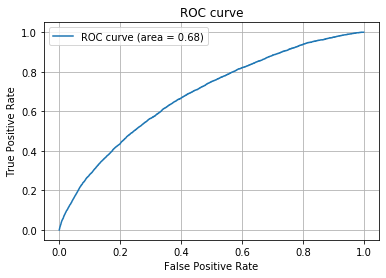

In [72]:
#ROC曲線をプロット

from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y3_test,y_pred_prob)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

### まとめ

問題4で作った各モデルのAUCの値をまとめる。なお、これらのAUC値はトレーニングデータセットから独立したテストデータセットで評価した値。パラメータチューニングは、LGB+Optuna(ST)のみCross Validationではなく、Stepwiseを用いた。

反省：スコアを求めた各段階でdfにまとめ、後にそれらを結合して結果がまとまった表を作れるようにすべきだった。

In [107]:
d1 = {'クラスの不均衡の是正(tree)': [0.62, 0.618], 'LGB+Optuna(CV)': [0.683, 0.684], 'LGB+Optuna(ST)': [0.683, 0.685]}
score_df = pd.DataFrame.from_dict(d1, orient='index').T
score_df.index = ['hold-out', 'CV(ST)']
score_df

,クラスの不均衡の是正(tree),LGB+Optuna(CV),LGB+Optuna(ST)
hold-out,0.620,0.683,0.683
CV(ST),0.618,0.684,0.685


## 【問題5】最終的なモデルの選定
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

#### テストデータに対する推定

OptunaのStepwise TuningでハイパーパラメータをチューニングしたLGBが最も良い指標値を示したのでこれを採用する

In [73]:
test_df = pd.read_csv('application_test.csv')

In [74]:
feature_list = list(df_v2.drop('TARGET', axis=1).columns)
test_df_v2 = test_df.loc[:, feature_list]
test_df_v3 = pd.get_dummies(test_df_v2)
test_df_v3.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100001,0,135000.0,568800.0,0.018850,-19241,-2329,-5170.0,-812,1,...,0,0,0,0,0,0,0,0,0,0
1,100005,0,99000.0,222768.0,0.035792,-18064,-4469,-9118.0,-1623,1,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,0.019101,-20038,-4458,-2175.0,-3503,1,...,0,0,0,0,0,0,1,0,0,0
3,100028,2,315000.0,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,1,...,0,0,0,0,0,0,0,0,0,0
4,100038,1,180000.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
col_name = []
for col in [c for c in X.columns if c not in test_df_v3.columns]:
    col_name.append(X.columns.get_loc(col))
    i = X.columns.get_loc(col)
    test_df_v3.insert(i, col, 0)
test_df_v3.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100001,0,135000.0,568800.0,0.018850,-19241,-2329,-5170.0,-812,1,...,0,0,0,0,0,0,0,0,0,0
1,100005,0,99000.0,222768.0,0.035792,-18064,-4469,-9118.0,-1623,1,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,0.019101,-20038,-4458,-2175.0,-3503,1,...,0,0,0,0,0,0,1,0,0,0
3,100028,2,315000.0,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,1,...,0,0,0,0,0,0,0,0,0,0
4,100038,1,180000.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#推定

probas_ans = gbm.predict(test_df_v3)
ans = test_df_v3.loc[:, 'SK_ID_CURR']
ans = pd.DataFrame(ans)
probas_ans = pd.DataFrame(probas_ans)
ans = pd.concat([ans, probas_ans], axis=1)
ans.columns = ['SK_ID_CURR', 'TARGET']
ans = ans.set_index('SK_ID_CURR')
ans.head()

,TARGET
SK_ID_CURR,
100001,0.047937
100005,0.077966
100013,0.046702
100028,0.053647
100038,0.115959


In [94]:
ans.to_csv('subm3.csv')